In [794]:
import tensorflow as tf
import keras
import numpy as np
import os
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
import seaborn as sns

import scipy.stats as sc_stats

import random

from sklearn.model_selection import train_test_split

In [460]:
# parameters
time_steps = 1
inputs = 5
outputs = 2

In [3]:
# df

In [461]:
subj_num = 38

# file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/example_RKN"
# file_name = file_path + "/subj_num_39.csv"
# file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subj_num_39"
# file_name = file_path + "/experiment_data.csv"

file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_"+str(subj_num)+"/"
file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_"+str(subj_num) + "/experiment_data.csv"
file_dopa_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/dopadata/subject_num_"+str(subj_num) +"/dopa_experiment_data.csv"




# file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_11/"
# file_name = file_path +"PT_generate_choice.csv"

In [5]:
task_df = pd.read_csv(file_name)
task_df.head(10)

TrialNum  SideOfScreen  Safe  BigRisky  SmallRisky  SideChosen  Choice  \
0         0           NaN   NaN       NaN         NaN         NaN     NaN   
1         1           2.0 -30.0       0.0      -126.0         1.0     0.0   
2         2           2.0 -25.0       0.0       -79.0         1.0     0.0   
3         3           2.0  35.0     147.0         0.0         2.0     1.0   
4         4           2.0  25.0      56.0         0.0         1.0     0.0   
5         5           2.0  30.0      84.0         0.0         2.0     1.0   
6         6           2.0  35.0      70.0         0.0         1.0     0.0   
7         7           2.0  15.0      37.0         0.0         1.0     0.0   
8         8           2.0  35.0      87.0         0.0         2.0     1.0   
9         9           2.0 -30.0       0.0       -50.0         2.0     1.0   

   Outcome     RT  Happiness  
0      NaN    NaN   0.600260  
1    -30.0  1.397        NaN  
2    -25.0  1.071        NaN  
3      0.0  0.977        NaN  
4     25.0  1.894   0.407552  
5      0.0  1.056        NaN  
6     35.0  1.134        NaN  
7     15.0  2.127   0.279948  
8      0.0  1.026        NaN  
9      0.0  1.422        NaN

In [544]:
task_df.shape

(301, 10)

In [545]:
dopa_task_df = pd.read_csv(file_dopa_name)
dopa_task_df.head(10)

TrialNum  SideOfScreen  Safe  BigRisky  SmallRisky  SideChosen  Choice  \
0         0           NaN   NaN       NaN         NaN         NaN     NaN   
1         1           2.0  20.0     100.0         0.0         2.0     1.0   
2         2           2.0 -30.0       0.0       -67.0         1.0     0.0   
3         3           2.0  35.0      70.0         0.0         1.0     0.0   
4         4           2.0 -35.0       0.0      -175.0         1.0     0.0   
5         5           2.0 -35.0       0.0       -64.0         1.0     0.0   
6         6           2.0 -15.0       0.0       -47.0         1.0     0.0   
7         7           2.0  30.0      60.0         0.0         2.0     1.0   
8         8           2.0   0.0      80.0       -32.0         2.0     1.0   
9         9           2.0  35.0     147.0         0.0         2.0     1.0   

   Outcome     RT  Happiness  
0      NaN    NaN   0.696615  
1      0.0  0.893        NaN  
2    -30.0  1.637        NaN  
3     35.0  1.181        NaN  
4    -35.0  1.311   0.585938  
5    -35.0  0.962        NaN  
6    -15.0  1.135        NaN  
7      0.0  1.559        NaN  
8    -32.0  1.205   0.455729  
9      0.0  1.071        NaN

In [3]:
def add_releveant_features(task_df):


    task_df['PrevOutcome']=task_df['Outcome'].shift(1)
    task_df.loc[1,'PrevOutcome']= 0

    task_df['PrevChoice']=task_df['Choice'].shift(1)
    task_df.loc[1,'PrevChoice']= 0

    task_df['PrevSafe']=task_df['Safe'].shift(1)
    task_df.loc[1,'PrevSafe']= 0

    task_df['PrevBigRisky']=task_df['BigRisky'].shift(1)
    task_df.loc[1,'PrevBigRisky']= 0

    task_df['PrevSmallRisky']=task_df['SmallRisky'].shift(1)
    task_df.loc[1,'PrevSmallRisky']= 0
    
    return task_df

task_df = add_releveant_features (task_df)
dopa_task_df = add_releveant_features(dopa_task_df)

NameError: name 'task_df' is not defined

In [547]:
task_df.head(10)

TrialNum  SideOfScreen  Safe  BigRisky  SmallRisky  SideChosen  Choice  \
0         0           NaN   NaN       NaN         NaN         NaN     NaN   
1         1           2.0 -30.0       0.0      -126.0         1.0     0.0   
2         2           2.0 -25.0       0.0       -79.0         1.0     0.0   
3         3           2.0  35.0     147.0         0.0         2.0     1.0   
4         4           2.0  25.0      56.0         0.0         1.0     0.0   
5         5           2.0  30.0      84.0         0.0         2.0     1.0   
6         6           2.0  35.0      70.0         0.0         1.0     0.0   
7         7           2.0  15.0      37.0         0.0         1.0     0.0   
8         8           2.0  35.0      87.0         0.0         2.0     1.0   
9         9           2.0 -30.0       0.0       -50.0         2.0     1.0   

   Outcome     RT  Happiness  PrevOutcome  PrevChoice  PrevSafe  PrevBigRisky  \
0      NaN    NaN   0.600260          NaN         NaN       NaN           NaN   
1    -30.0  1.397        NaN          0.0         0.0       0.0           0.0   
2    -25.0  1.071        NaN        -30.0         0.0     -30.0           0.0   
3      0.0  0.977        NaN        -25.0         0.0     -25.0           0.0   
4     25.0  1.894   0.407552          0.0         1.0      35.0         147.0   
5      0.0  1.056        NaN         25.0         0.0      25.0          56.0   
6     35.0  1.134        NaN          0.0         1.0      30.0          84.0   
7     15.0  2.127   0.279948         35.0         0.0      35.0          70.0   
8      0.0  1.026        NaN         15.0         0.0      15.0          37.0   
9      0.0  1.422        NaN          0.0         1.0      35.0          87.0   

   PrevSmallRisky  
0             NaN  
1             0.0  
2          -126.0  
3           -79.0  
4             0.0  
5             0.0  
6             0.0  
7             0.0  
8             0.0  
9             0.0

In [548]:
# Binned_EV_diff_task = pd.cut(task_df.loc[task_df.TrialNum!=0,['Safe']].values.reshape(task_df.loc[task_df.TrialNum!=0,['Safe']].shape[0]) - np.mean(task_df.loc[task_df.TrialNum!=0,['BigRisky','SmallRisky']],1),bins = inputs,labels=False)

# # Binned_EV_diff_task.shape
# Binned_EV_diff_task = Binned_EV_diff_task.values.reshape(task_df.loc[task_df.TrialNum!=0,['Safe']].shape[0],-1)

# Binned_EV_diff_dopa_task = pd.cut(dopa_task_df.loc[dopa_task_df.TrialNum!=0,['Safe']].values.reshape(dopa_task_df.loc[dopa_task_df.TrialNum!=0,['Safe']].shape[0]) - np.mean(dopa_task_df.loc[dopa_task_df.TrialNum!=0,['BigRisky','SmallRisky']],1),bins = inputs,labels=False)

# Binned_EV_diff_dopa_task = Binned_EV_diff_dopa_task.values.reshape(dopa_task_df.loc[dopa_task_df.TrialNum!=0,['Safe']].shape[0],-1)

# # Binned_EV_diff_dopa_task

In [549]:
onehot_encoder=OneHotEncoder(sparse=False)

In [852]:
# train_X = Binned_EV_diff_task
# train_X = onehot_encoder.fit_transform(train_X)
# train_y = task_df.loc[task_df.TrialNum!=0,['Choice']].values.astype(np.int32)


In [853]:
# plt.scatter(Binned_EV_diff_task,train_y)
# plt.xlabel('Binned_EV_diff')
# plt.ylabel('Choice');

In [854]:
# train_X

In [855]:
task_df.shape

(301, 15)

In [856]:
# # train_X = task_df.loc[:2990000,['Safe','BigRisky','SmallRisky']].values
# # train_y = task_df.loc[2990000:,['Safe','BigRisky','SmallRisky']].values
# # 

# print(train_X.shape)
# print(train_y.shape)

In [857]:
# train_X.shape

In [858]:
stop = 200

# include_ind = np.setdiff1d(np.arange(task_df.shape[0]),np.arange(0,task_df.shape[0],301))
# include_ind = np.arange(1,task_df.shape[0])
# X_y_split
## TRAIN
# train_X = task_df.loc[include_ind,['Safe','BigRisky','SmallRisky']].values
# train_y = task_df.loc[include_ind,['Choice']].values.astype(np.int32)

##----------------- UNCOMMENT BELOW
# train_X = task_df.loc[task_df.TrialNum!=0,['Safe','BigRisky','SmallRisky']].values
# train_X = task_df.loc[task_df.TrialNum!=0,['Safe','BigRisky','SmallRisky','PrevOutcome']].values
train_X = task_df.loc[task_df.TrialNum!=0,['Safe','BigRisky','SmallRisky','PrevOutcome','PrevChoice']].values

train_y = task_df.loc[task_df.TrialNum!=0,['Choice']].values.astype(np.int32)


# ## TEST
# test_X = dopa_task_df.loc[dopa_task_df.TrialNum!=0,['Safe','BigRisky','SmallRisky']].values
# test_X = dopa_task_df.loc[dopa_task_df.TrialNum!=0,['Safe','BigRisky','SmallRisky','PrevOutcome']].values
test_X = dopa_task_df.loc[dopa_task_df.TrialNum!=0,['Safe','BigRisky','SmallRisky','PrevOutcome','PrevChoice']].values

test_y = dopa_task_df.loc[dopa_task_df.TrialNum!=0,['Choice']].values.astype(np.int32)

## ---------------------------

# train_X = task_df.loc[task_df.TrialNum!=0,['Safe','BigRisky','SmallRisky','PrevOutcome','PrevChoice','PrevSafe','PrevBigRisky','PrevSmallRisky']].values
# test_X = dopa_task_df.loc[dopa_task_df.TrialNum!=0,['Safe','BigRisky','SmallRisky','PrevOutcome','PrevChoice','PrevSafe','PrevBigRisky','PrevSmallRisky']].values

# train_X = task_df.loc[task_df.TrialNum!=0,['Safe','BigRisky','SmallRisky','PrevOutcome','PrevChoice','PrevSafe','PrevBigRisky','PrevSmallRisky']].values
# test_X = dopa_task_df.loc[dopa_task_df.TrialNum!=0,['Safe','BigRisky','SmallRisky','PrevOutcome','PrevChoice','PrevSafe','PrevBigRisky','PrevSmallRisky']].values

# extra_features = 5;

#### -------------------
# train_X = Binned_EV_diff_task
# train_X = onehot_encoder.fit_transform(train_X)


## GENERATED CHOICES #####

# train_X = task_df.loc[:2990000,['Safe','BigRisky','SmallRisky']].values
# test_X = task_df.loc[2990000:,['Safe','BigRisky','SmallRisky']].values

# train_X = task_df.loc[1:2500,['Safe','BigRisky','SmallRisky']].values
# test_X = task_df.loc[2500:,['Safe','BigRisky','SmallRisky']].values



# train_y = task_df.loc[1:2500,['Choice']].values
# test_y = task_df.loc[2500:,['Choice']].values

# test_X = task_df.loc[-10000:,[['Safe','BigRisky','SmallRisky']]].values
# test_y = task_df.loc[-10000:,[['Choice']]].values.astype(np.int32)


# test_X = Binned_EV_diff_dopa_task
# test_X = onehot_encoder.fit_transform(test_X)


###### when splitting data into train and validation

# train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.35, random_state=1)

train_X, val_X, train_y, val_y = train_X[:stop], train_X[stop:], train_y[:stop], train_y[stop:]

##############


print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

# # center and scale
scaler = MinMaxScaler(feature_range=(0, 1))    
train_X = scaler.fit_transform(train_X)
test_X = scaler.fit_transform(test_X)
val_X = scaler.fit_transform(val_X)

# train_X[0,-extra_features + 1:]= 0;





# train_X = np.array(train_X).reshape(-1,time_steps,inputs)
# test_X = np.array(test_X).reshape(-1,time_steps,inputs)


#  # reshape input to 3D array
# encode_categorical = train_X.reshape(len(train_X), 1)
# encode_categorical_test = test_X.reshape(len(test_X), 1)
# train_X = onehot_encoder.fit_transform(encode_categorical).toarray()
# test_X= onehot_encoder.fit_transform(encode_categorical_test).toarray()





train_X = train_X[:,None,:]
val_X = val_X[:,None,:]
test_X = test_X[:,None,:]


# # one-hot encode the outputs

onehot_encoder = OneHotEncoder()
encode_categorical = train_y.reshape(len(train_y), 1)
encode_categorical_test = test_y.reshape(len(test_y), 1)
encode_categorical_val = val_y.reshape(len(val_y),1)


train_y = onehot_encoder.fit_transform(encode_categorical).toarray()
test_y = onehot_encoder.fit_transform(encode_categorical_test).toarray()
val_y = onehot_encoder.fit_transform(encode_categorical_val).toarray()


# train_y =  train_y.reshape(-1,time_steps,outputs)
# test_y =  test_y.reshape(-1,time_steps,outputs)



# train_y = train_y[None,:,:]
# test_y = test_y[None,:,:]

(200, 5)
(200, 1)
(300, 5)
(300, 1)


/Users/ritwik7/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/ritwik7/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='au

In [859]:
# test_y

In [860]:
# train_X[1:10,:]

In [861]:
PT_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/"
PT_file_name = PT_file_path  + "PT_loss_updated.csv"
PT_metrics = pd.read_csv(PT_file_name)
PT_metrics = PT_metrics[PT_metrics.PT_loss !=0]
# PT_metrics.head(100)
PT_R2= PT_metrics[PT_metrics.Subject_number ==20].PT_pseudoR2.iloc[0]

In [862]:
PT_R2

0.7903537426954169

In [863]:
reset_graph()

learning_rate = 0.001
epochs = 10000
batch_size = int(train_X.shape[0]/2)
# batch_size = 100
length = train_X.shape[0]
display = 100
neurons = 5

num_batches = 100
seq_len = 10

percent_above_PT = 1

train_threshold = PT_R2 + percent_above_PT


save_step = 100


best_loss_val = np.infty
checks_since_last_progress = 0
max_checks_without_progress = 500


# clear graph (if any) before running
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, time_steps, inputs])

y = tf.placeholder(tf.float32, [None, outputs])

# LSTM Cell
cell = tf.contrib.rnn.BasicLSTMCell(num_units=neurons, activation=tf.nn.relu)
cell_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

# pass into Dense layer
stacked_outputs = tf.reshape(cell_outputs, [-1, neurons])
out = tf.layers.dense(inputs=stacked_outputs, units=outputs)

probability = tf.nn.softmax(out)

# squared error loss or cost function for linear regression
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
        labels=y, logits=out))

# optimizer to minimize cost
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
saver = tf.train.Saver()


In [864]:
accuracy = tf.metrics.accuracy(labels =  tf.argmax(y, 1),
                          predictions = tf.argmax(out, 1),
                          name = "accuracy")
precision = tf.metrics.precision(labels=tf.argmax(y, 1),
                                 predictions=tf.argmax(out, 1),
                                 name="precision")
recall = tf.metrics.recall(labels=tf.argmax(y, 1),
                           predictions=tf.argmax(out, 1),
                           name="recall")
f1 = 2 * accuracy[1] * recall[1] / ( precision[1] + recall[1] )

acc_up,acc_val = accuracy
auc = tf.metrics.auc(labels=tf.argmax(y, 1),
                           predictions=tf.argmax(out, 1),
                           name="auc")



In [865]:
def random_subsequence(X,y,seq_len):
    rnd  = random.randint(0,len(X)-seq_len)
    X_seq, y_seq = X[rnd:rnd+seq_len,:,:], y[rnd:rnd+seq_len,:]
    return X_seq, y_seq

X_seq, y_seq = random_subsequence(train_X,train_y,10)
print(y_seq.shape)

(10, 2)


In [866]:
train_threshold

1.7903537426954168

In [867]:
valid_store = []

In [868]:
with tf.Session() as sess:
    # initialize all variables
    tf.global_variables_initializer().run()
    tf.local_variables_initializer().run()

    # Train the model
    for steps in range(epochs):
        mini_batch = zip(range(0, length, batch_size),
                   range(batch_size, length+1, batch_size))

        # train data in mini-batches
        for (start, end) in mini_batch:
#             print(start,end)
            sess.run(training_op, feed_dict = {X: train_X[start:end,:,:],
                                               y: train_y[start:end,:]}) 
            
        ## train data in batches of length subsequence
        
#         for k in range(num_batches):
#             X_seq, y_seq = random_subsequence(train_X,train_y,seq_len)

#             sess.run(training_op, feed_dict = {X:X_seq,y:y_seq}) 
        loss_fn = loss.eval(feed_dict = {X: train_X, y: train_y})
        loss_val = loss.eval(feed_dict={X: val_X, y: val_y})


        # print training performance 
        if (steps+1) % display == 0:
            # evaluate loss function on training set
          
   
            loss_fn = loss.eval(feed_dict = {X: train_X, y: train_y})
            print('Step: {}  \tTraining loss: {}'.format((steps+1), loss_fn))
            
            acc_train = acc_val.eval(feed_dict={X: train_X, y: train_y})
            print('Step: {}  \tTraining accuracy: {}'.format((steps+1), acc_train))
            
            
            acc_test = acc_val.eval(feed_dict={X: test_X, y: test_y})
#             print('Step: {}  \tTest accuracy: {}'.format((steps+1), acc_test))
            
            loss_test = loss.eval(feed_dict={X: test_X, y: test_y})
#             print('Step: {}  \tTest loss: {}'.format((steps+1), loss_test))
            
            accu_val = acc_val.eval(feed_dict={X: val_X, y: val_y})

            loss_val = loss.eval(feed_dict={X: val_X, y: val_y})
            print('Step: {}  \tValid loss: {}'.format((steps+1), loss_val))
            
            valid_store.append(loss_val)
            
            
        

            
        
    
        if (1 + loss_fn/np.log(0.5)) > train_threshold:
                print("Threshold achieved, quit training")
                break
        
        
        if loss_val < best_loss_val:
            
                    best_loss_val = loss_val
                    checks_since_last_progress = 0
        else:
                        checks_since_last_progress += 1
        
        
        # EARLY STOPPING
        if checks_since_last_progress > max_checks_without_progress:
            print("Early stopping!")
            break

        
        if (steps+1) % save_step ==0:
            save_path = saver.save(sess, "./checkpts/RNN_Internet_LSTM_model_5features.ckpt")
        
            
            
            
            
#     evaluate model accuracy
    acc, prec, recall, f1, AUC = sess.run([accuracy, precision, recall, f1,auc],
                                     feed_dict = {X: train_X, y: train_y})
    probchoice = probability.eval(feed_dict = {X: train_X, y: train_y})
    prob_test = probability.eval(feed_dict = {X: test_X, y: test_y})


    print('\nEvaluation  on training set')
    print('Accuracy:', acc[1])
    print('Precision:', prec[1])
    print('Recall:', recall[1])
    print('F1 score:', f1)
    print('AUC:', AUC[1])

    save_path = saver.save(sess, "./checkpts/RNN_LST_model_5features.ckpt")

    

metric_out_df= pd.DataFrame(np.array([acc[1],prec[1],recall[1],f1,AUC[1],loss_fn,accu_val,best_loss_val,acc_test,loss_test,neurons,learning_rate,epochs]).reshape(-1,13),columns =["accuracy","precision","recall","f1_score","auc","loss","accuracy_val","loss_val","accuracy_test","loss_test","neurons","learning_rate","n_epochs"])    

Step: 100  	Training loss: 0.6258194446563721
Step: 100  	Training accuracy: 0.6349999904632568
Step: 100  	Valid loss: 0.6005780100822449
Step: 200  	Training loss: 0.5451629757881165
Step: 200  	Training accuracy: 0.7124999761581421
Step: 200  	Valid loss: 0.5073797702789307
Step: 300  	Training loss: 0.4972045123577118
Step: 300  	Training accuracy: 0.7371428608894348
Step: 300  	Valid loss: 0.45754486322402954
Step: 400  	Training loss: 0.4526114761829376
Step: 400  	Training accuracy: 0.7509999871253967
Step: 400  	Valid loss: 0.41711387038230896
Step: 500  	Training loss: 0.407378226518631
Step: 500  	Training accuracy: 0.763076901435852
Step: 500  	Valid loss: 0.37481415271759033
Step: 600  	Training loss: 0.3713493049144745
Step: 600  	Training accuracy: 0.7734375
Step: 600  	Valid loss: 0.3391384780406952
Step: 700  	Training loss: 0.3435334265232086
Step: 700  	Training accuracy: 0.7836841940879822
Step: 700  	Valid loss: 0.3082994222640991
Step: 800  	Training loss: 0.322661

In [869]:
valid_store

[0.600578,
 0.5073798,
 0.45754486,
 0.41711387,
 0.37481415,
 0.33913848,
 0.30829942,
 0.28832757,
 0.2726465,
 0.26050898,
 0.25076145,
 0.24279243,
 0.2362637,
 0.23066574,
 0.22603148,
 0.22202255,
 0.21856712,
 0.21554713,
 0.21292572,
 0.21064511,
 0.2086224,
 0.20681983,
 0.2052026,
 0.20357613,
 0.20194137,
 0.20058239,
 0.19930106,
 0.19817166,
 0.19715194,
 0.19618799,
 0.19522461,
 0.19438568,
 0.19360912,
 0.19284439,
 0.19207442,
 0.19139789,
 0.19069858,
 0.19001007,
 0.18925515,
 0.18843909,
 0.18761817,
 0.18667372,
 0.18572277,
 0.18484633,
 0.18403433,
 0.18321685,
 0.18221244,
 0.18108496,
 0.18027683,
 0.17962703,
 0.17898628,
 0.17834873,
 0.17771293,
 0.17709702,
 0.17651111,
 0.17595582,
 0.17540468,
 0.17488779,
 0.17441292,
 0.17396966,
 0.17355567,
 0.17315155,
 0.17272617,
 0.17236973,
 0.17201015,
 0.171696,
 0.17138276,
 0.17106089,
 0.17073974,
 0.1704148,
 0.1700188,
 0.1696492,
 0.16925913,
 0.16886085,
 0.16844997,
 0.1680232,
 0.16759735,
 0.16715656,

In [870]:
# valid_store[-2]

In [871]:
# probchoice.shape

In [872]:
metric_out_df.head(10)

accuracy  precision    recall  f1_score       auc      loss  accuracy_val  \
0  0.899767   0.936937  0.945455  0.903839  0.933838  0.164295       0.89965   

   loss_val  accuracy_test  loss_test  neurons  learning_rate  n_epochs  
0  0.159016       0.899599   0.409843      5.0          0.001   10000.0

In [880]:
# metric_out_df.to_csv(file_path+"LSTM_updated_3_features_metrics.csv")
# metric_out_df.to_csv(file_path+"LSTM_updated_currentopts_prev_outcome_3_neurons_metrics.csv")

# metric_out_df.to_csv(file_path+"LSTM_updated_currprev_3_neurons_metrics_0pct.csv")


# metric_out_df.to_csv(file_path+"LSTM_updated_currprev_3_neurons_metrics_0pct.csv")

# metric_out_df.to_csv(file_path+"LSTM_updated_Crossval_currprev_metrics_neurons=8.csv")
# metric_out_df.to_csv(file_path+"LSTM_updated_Crossval_currprev_metrics_neurons=3.csv")
# metric_out_df.to_csv(file_path+"LSTM_updated_Crossval_currprev_metrics_neurons=16.csv")
# metric_out_df.to_csv(file_path+"LSTM_updated_Crossval_currprev_metrics_neurons=32.csv")
metric_out_df.to_csv(file_path+"LSTM_updated_Crossval_currprev_metrics_neurons="+str(neurons)+".csv")







In [881]:
1 + (stop/300)*loss_fn/np.log(0.5)

0.8419814804739971

In [882]:
1+ loss_test/np.log(0.5)

0.40872179752016713

In [883]:
prob_train_df = pd.DataFrame(probchoice.reshape(-1,2),columns = {'action_0','action_1'})
prob_test_df = pd.DataFrame(prob_test.reshape(-1,2),columns = {'action_0','action_1'})

# prob_train_df.to_csv(file_path + "prob_train_3features.csv")
# prob_test_df.to_csv(file_path + "prob_test3features.csv")

# prob_train_df.to_csv(file_path + "prob_train_currentopts_prev_outchoice_0_pct.csv")
# prob_test_df.to_csv(file_path + "prob_test_currentopts_prev_outchoice_o_pct.csv")


# prob_train_df.to_csv(file_path + "prob_train_currentopts_prev_outchoice_neurons=8.csv")
# prob_test_df.to_csv(file_path + "prob_test_currentopts_prev_outchoice_neurons=8.csv")


# prob_train_df.to_csv(file_path + "prob_train_currentopts_prev_outchoice_neurons=16.csv")
# prob_test_df.to_csv(file_path + "prob_test_currentopts_prev_outchoice_neurons=16.csv")

# prob_train_df.to_csv(file_path + "prob_train_currentopts_prev_outchoice_neurons=32.csv")
# prob_test_df.to_csv(file_path + "prob_test_currentopts_prev_outchoice_neurons=32.csv")


prob_train_df.to_csv(file_path + "prob_train_currentopts_prev_outchoice_neurons="+str(neurons)+".csv")
prob_test_df.to_csv(file_path + "prob_test_currentopts_prev_outchoice_neurons="+str(neurons)+".csv")


In [884]:
# prob_test_df.head(10)

In [885]:
# np.corrcoef(prob_train_df.values,prob_test_df.values)

In [886]:
file_path

'/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_38/'

In [771]:
task_df

TrialNum  SideOfScreen  Safe  BigRisky  SmallRisky  SideChosen  Choice  \
0           0           NaN   NaN       NaN         NaN         NaN     NaN   
1           1           2.0 -30.0       0.0      -126.0         2.0     1.0   
2           2           2.0  15.0      75.0         0.0         2.0     1.0   
3           3           2.0 -35.0       0.0       -70.0         2.0     1.0   
4           4           2.0   0.0      20.0       -30.0         2.0     1.0   
5           5           2.0  25.0      56.0         0.0         1.0     0.0   
6           6           2.0   0.0      45.0       -18.0         2.0     1.0   
7           7           2.0  35.0      59.0         0.0         2.0     1.0   
8           8           2.0 -20.0       0.0       -40.0         2.0     1.0   
9           9           2.0  30.0      50.0         0.0         1.0     0.0   
10         10           2.0   0.0      30.0       -25.0         2.0     1.0   
11         11           1.0  15.0      37.0         0.0         2.0     0.0   
12         12           1.0  30.0      95.0         0.0         2.0     0.0   
13         13           1.0   0.0      45.0       -68.0         2.0     0.0   
14         14           1.0   0.0      65.0       -34.0         1.0     1.0   
15         15           1.0  35.0      64.0         0.0         2.0     0.0   
16         16           1.0   0.0      45.0       -23.0         1.0     1.0   
17         17           1.0 -20.0       0.0       -44.0         1.0     1.0   
18         18           1.0   0.0      20.0        -6.0         1.0     1.0   
19         19           1.0  25.0      46.0         0.0         2.0     0.0   
20         20           1.0   0.0      80.0       -80.0         1.0     1.0   
21         21           2.0  30.0      84.0         0.0         2.0     1.0   
22         22           2.0 -30.0       0.0       -67.0         2.0     1.0   
23         23           2.0   0.0      80.0      -120.0         2.0     1.0   
24         24           2.0   0.0      20.0        -6.0         2.0     1.0   
25         25           2.0 -15.0       0.0       -27.0         2.0     1.0   
26         26           2.0   0.0      80.0       -24.0         2.0     1.0   
27         27           2.0  25.0      70.0         0.0         1.0     0.0   
28         28           2.0  25.0      42.0         0.0         1.0     0.0   
29         29           2.0 -15.0       0.0       -37.0         2.0     1.0   
..        ...           ...   ...       ...         ...         ...     ...   
271       271           1.0   0.0      30.0       -25.0         1.0     1.0   
272       272           1.0  30.0     108.0         0.0         1.0     1.0   
273       273           1.0 -35.0       0.0       -98.0         2.0     0.0   
274       274           1.0 -35.0       0.0       -64.0         1.0     1.0   
275       275           1.0  20.0      50.0         0.0         2.0     0.0   
276       276           1.0 -35.0       0.0      -175.0         2.0     0.0   
277       277           1.0 -25.0       0.0       -62.0         1.0     1.0   
278       278           1.0   0.0      80.0      -120.0         2.0     0.0   
279       279           1.0   0.0      30.0       -30.0         1.0     1.0   
280       280           1.0  15.0      63.0         0.0         1.0     1.0   
281       281           2.0 -15.0       0.0       -47.0         2.0     1.0   
282       282           2.0   0.0      30.0       -60.0         1.0     0.0   
283       283           2.0   0.0      45.0       -23.0         2.0     1.0   
284       284           2.0 -25.0       0.0       -46.0         2.0     1.0   
285       285           2.0  35.0      78.0         0.0         2.0     1.0   
286       286           2.0  15.0      27.0         0.0         1.0     0.0   
287       287           2.0  25.0      62.0         0.0         2.0     1.0   
288       288           2.0  25.0     105.0         0.0         2.0     1.0   
289       289           2.0   0.0      45.0       -45.0

In [159]:
file_path

'/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_38/'

In [160]:
prob_train_3df = pd.read_csv(file_path + "prob_train_3features.csv")
prob_test_3df = pd.read_csv(file_path + "prob_test3features.csv")

In [161]:
prob_train_df = pd.read_csv(file_path + "prob_train_currentopts_prev_outchoice.csv")
prob_test_df = pd.read_csv(file_path + "prob_test_currentopts_prev_outchoice.csv")

In [162]:
# prob_train_df = pd.read_csv(file_path + "prob_train.csv")
probchoice_df = pd.read_csv(file_path + "PT_probchoice.csv")

# prob_train_currentopts_prev_outcome

In [163]:
## probability of gambling

In [164]:
# prob_train_df.action_0.values
# probchoice_df.probchoice_train

sc_stats.spearmanr(prob_train_df.action_0.values,
probchoice_df.probchoice_train)

SpearmanrResult(correlation=0.9824525867489154, pvalue=2.2033065556144822e-219)

In [165]:
corr_df = pd.DataFrame([[sc_stats.spearmanr(prob_train_df.action_1.values,
probchoice_df.probchoice_train).correlation,sc_stats.spearmanr(prob_train_df.action_1.values,
probchoice_df.probchoice_train).pvalue]],columns = {'r','p'})

corr_df.to_csv(file_path + "PT_RNN_TRAIN_corr.csv")

In [166]:
# sc_stats.spearmanr(prob_train_df.action_1.values,
# probchoice_df.probchoice_train).pvalue

In [167]:
# plt.figure(figsize=(20,10))
# plt.plot(prob_train_df.action_0)

# plt.plot(task_df.Choice,'.')

In [168]:
# plt.figure(figsize=(20,10))
# plt.plot(prob_test_df.action_0)

# plt.plot(dopa_task_df.Choice,'.')

In [169]:
# np.array([task_df.Choice, 1-task_df.Choice]).T.shape

In [170]:
-(np.dot(task_df.Choice[1:],np.log(prob_train_df.action_0)) + np.dot(1-task_df.Choice[1:],np.log(prob_train_df.action_1)) )/300

0.1602120109038916

In [171]:
-(np.dot(task_df.Choice[1:],np.log(prob_train_df.action_0))) /300

0.08575991815549756

In [172]:
-np.dot(1-task_df.Choice[1:],np.log(prob_train_df.action_1))/300

0.07445209274839405

In [173]:
## Rsquared
mean_loss = -(np.dot(task_df.Choice[1:],np.log(prob_train_df.action_0)) + np.dot(1-task_df.Choice[1:],np.log(prob_train_df.action_1)) )/300
print(1+mean_loss/np.log(0.5))

0.768862926378107


In [174]:
# xx  = task_df.Choice[1:]==0
# np.where(xx== True)

-np.sum(np.log(prob_train_df.action_0.loc[np.where(task_df.Choice[1:]==0)])) + np.sum(np.log(prob_train_df.action_1.loc[np.where(task_df.Choice[1:]==1)]))/300

480.7164177586021

In [175]:
-( np.sum(np.log(prob_train_df.action_1.loc[np.where(task_df.Choice[1:]==0)])) + np.sum(np.log(prob_train_df.action_0.loc[np.where(task_df.Choice[1:]==1)])) )/300

0.1602120109038916

subj_num = 20
file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_" + str(subj_num) + "/LSTM_updated_currentopts_prev_outcome_metrics.csv"
metric_subj = pd.read_csv(file_name)

In [176]:
# metric_subj.loss

In [177]:
-(np.dot(dopa_task_df.Choice[1:],np.log(prob_test_df.action_0)) + np.dot(1-dopa_task_df.Choice[1:],np.log(prob_test_df.action_1)) )/300

0.30756888905017016

In [178]:
-(np.dot(dopa_task_df.Choice[1:],np.log(prob_test_df.action_0)) )/300

0.20284200860862397

In [179]:
- np.dot(1-dopa_task_df.Choice[1:],np.log(prob_test_df.action_1)) /300

0.10472688044154622

## for the RNN outcomes only

In [180]:
-(np.dot(task_df.Choice[1:],np.log(prob_train_3df.action_0)) + np.dot(1-task_df.Choice[1:],np.log(prob_train_3df.action_1)) )/300

7.006967651865987

## Comparison

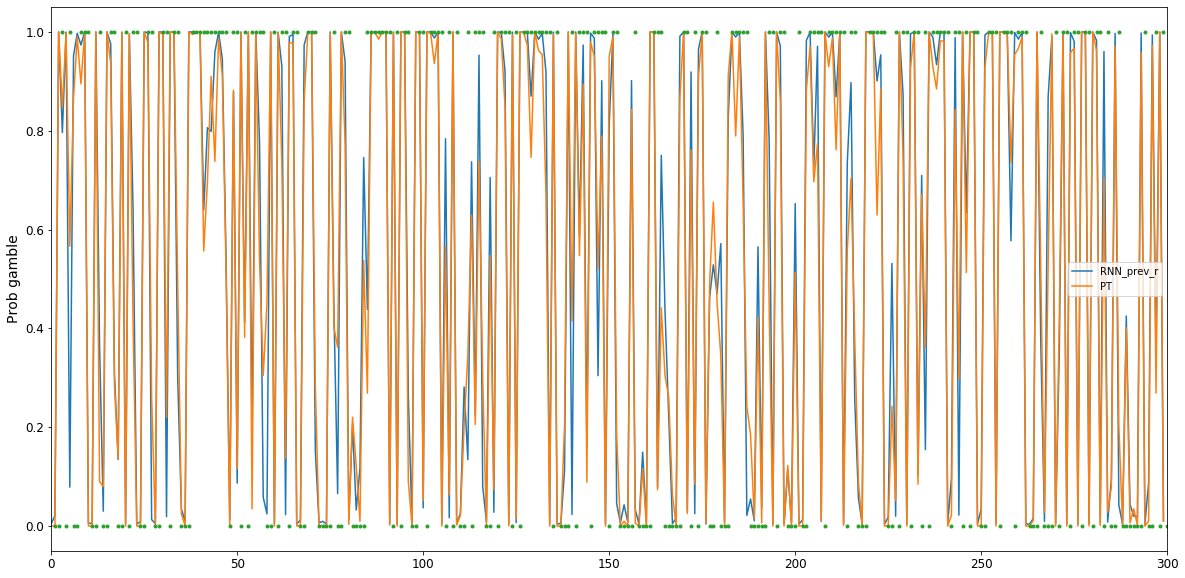

In [182]:
plt.figure(figsize=(20,10))
# plt.plot(prob_train_3df.action_1,label="RNN_opts")
plt.plot(prob_train_df.action_0,label="RNN_prev_r")
plt.plot(probchoice_df.probchoice_train,label="PT")
plt.ylabel("Prob gamble")
plt.xlim([0,300]);

plt.plot(task_df.Choice[1:],'.')
plt.legend(loc=0)

Text(0, 0.5, 'P (Gamble) PT')

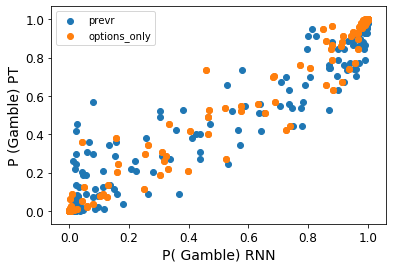

In [183]:
plt.scatter(prob_train_df.action_0,probchoice_df.probchoice_train,label="prevr")
plt.scatter(prob_train_3df.action_1,probchoice_df.probchoice_train,label="options_only")
plt.legend(loc=0)
plt.xlabel("P( Gamble) RNN")
plt.ylabel("P (Gamble) PT")

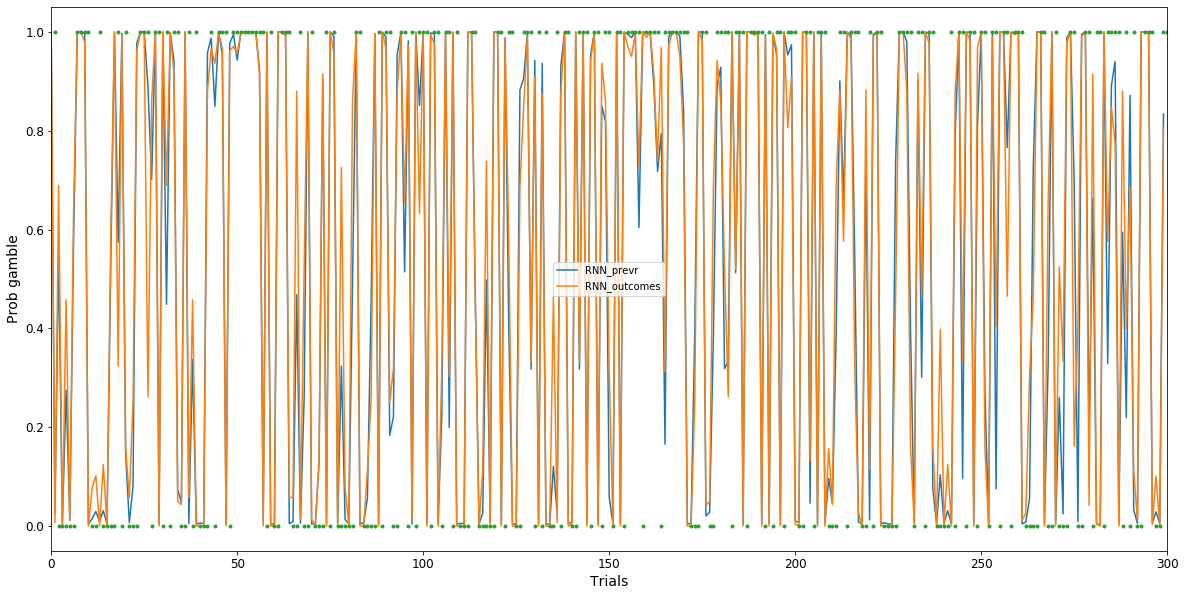

In [185]:
plt.figure(figsize=(20,10))
plt.plot(prob_test_df.action_0,label ="RNN_prevr")
plt.plot(prob_test_3df.action_1,label ="RNN_outcomes")

plt.ylabel("Prob gamble")
plt.xlim([0,300]);
plt.legend(loc=0)
plt.plot(dopa_task_df.Choice[1:],'.')
plt.xlabel("Trials");

## This suggests, going anti-prospect theory will lead to lower loss

In [262]:


-(np.dot(1-task_df.Choice[1:],np.log(prob_train_3df.action_0)) + np.dot(task_df.Choice[1:],np.log(prob_train_3df.action_1)) )/300

0.10528359603912968

In [287]:
PT_metrics[PT_metrics.Subject_number==subj_num].PT_loss/300 ## also verified on matlab


9    0.145316
Name: PT_loss, dtype: float64

In [302]:
## Prospect theory
-(np.dot(task_df.Choice[1:],np.log(probchoice_df.probchoice_train)) + np.dot(1-task_df.Choice[1:],np.log(1-probchoice_df.probchoice_train)) )/300 

0.1453157121656168

In [303]:
## Anti Prospect theory
-(np.dot(1-task_df.Choice[1:],np.log(probchoice_df.probchoice_train)) + np.dot(task_df.Choice[1:],np.log(1-probchoice_df.probchoice_train)) )/300 

11.22423742292637

In [305]:
## RNN no prev

In [307]:
metric_3df = pd.read_csv(file_path + "LSTM_updated_3_features_metrics.csv")
metric_3df.head(10)

Unnamed: 0  accuracy  precision    recall  f1_score       auc      loss  \
0           0  0.901161   0.948529  0.948529  0.901161  0.952923  0.105284   

   accuracy_test  loss_test  neurons  learning_rate  n_epochs  
0         0.9009   0.664291    100.0          0.001   10000.0

In [314]:
## Rsquared
1 + metric_3df.loss/np.log(0.5)

0    0.848108
Name: loss, dtype: float64

In [315]:
## Rsquared test
1 + metric_3df.loss_test/np.log(0.5)

0    0.041631
Name: loss_test, dtype: float64

In [7]:
file_path

'/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_28/'

In [1079]:
# stop=200
stop = 150

In [1163]:
# all_subj_metrics_df = pd.DataFrame(); all_subj_metrics_manual_df = pd.DataFrame()
# for subj_num in range(11,27):
for subj_num in range(28,42):


#     print(subj_num)
#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_" + str(subj_num) + "/LSTM_updated_metrics.csv"
#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_" + str(subj_num) + "/LSTM_updated_3_features_metrics.csv"

#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_" + str(subj_num) + "/LSTM_updated_currentopts_prev_outcome_metrics.csv"
#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_" + str(subj_num) + "/LSTM_updated_currentopts_prev_outcome_3_neurons_metrics.csv"

#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_" + str(subj_num) + "/LSTM_updated_currprev_3_neurons_metrics_0pct.csv"

############# Curr O ########################

#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_" + str(subj_num) + "/LSTM_updated_Crossval_curr_metrics_neurons=8.csv"


########################################################
#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_" + str(subj_num) + "/LSTM_updated_Crossval_currprev_metrics_neurons=3.csv"
#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_" + str(subj_num) + "/LSTM_updated_Crossval_currprev_metrics_neurons=5.csv"


#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_" + str(subj_num) + "/LSTM_updated_Crossval_currprev_v2_metrics_neurons=8.csv"
#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_" + str(subj_num) + "/LSTM_updated_Crossval_currprev_metrics_neurons=10.csv"

#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_" + str(subj_num) + "/LSTM_updated_Crossval_currprev_metrics_neurons=16.csv"
#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_" + str(subj_num) + "/LSTM_updated_Crossval_currprev_metrics_neurons=32.csv"


###################Prev OPTS, PREV R, PREV C, CURRENT OPTS ####################################
#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_" + str(subj_num) + "/LSTM_updated_Crossval_currprev_opts_metrics_neurons=8.csv"

######### RT ###################

#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_" + str(subj_num) + "/LSTM_updated_Crossval_currprev_RT_opts_metrics_neurons=8.csv"


################ Cross val part 2 ###########

#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_" + str(subj_num) + "/LSTM_updated_Crossval_currprev_v2_metrics_neurons=32.csv"

#########

###############
    file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_" + str(subj_num) + "/LSTM_updated_Crossval_currprev_opts_metrics_neurons=10.csv"
##############
#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_" + str(subj_num) + "/LSTM_updated_CrossvalTESTinsess_currprev_opts_metrics_neurons=16.csv"




#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_" + str(subj_num) + "/LSTM_updated_CrossvalTESTinsess1sthalf_currprev_opts_metrics_neurons=8.csv"
#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_" + str(subj_num) + "/LSTM_updated_CrossvalTESTinsess2ndhalf_currprev_opts_metrics_neurons=8.csv"



#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_" + str(subj_num) + "/combined_1sthalf/LSTM_updated_Crossval_currprev_opts_metrics_neurons=8.csv"
#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_" + str(subj_num) + "/combined_2ndhalf/LSTM_updated_Crossval_currprev_opts_metrics_neurons=8.csv"


    file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_" + str(subj_num) + "/50_splits_combined_1sthalf/LSTM_updated_Crossval_currprev_opts_metrics_neurons=8.csv"



    ###generated data ###
    
#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/generated_data/1500_sub29/LSTM_updated_Crossval_currprev_opts_metrics_neurons=8.csv"
#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/generated_data/3000_sub29/LSTM_updated_Crossval_currprev_opts_metrics_neurons=8.csv"


#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/generated_data/PT_fake_data/mu=1/3000/LSTM_updated_Crossval_currprev_opts_metrics_neurons=8.csv"

#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/generated_data/PT_fake_data/mu=20/300/LSTM_updated_Crossval_currprev_opts_metrics_neurons=8.csv"

#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/generated_data/PT_fake_data/mu=1/300/LSTM_updated_Crossval_currprev_opts_metrics_neurons=8.csv"

    file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/generated_data/PT_fake_data/mu=0.5/300/LSTM_updated_Crossval_currprev_opts_metrics_neurons=8.csv"

    
    
    
    
    ##### ORIGINAL #####
#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/generated_data/PT_fake_data/FittingProc/mu=0.5/600/LSTM_updated_Crossval_currprev_opts_metrics_neurons=8.csv"

#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/generated_data/PT_fake_data/FittingProc/mu=0.5/600/LSTM_updated_Crossval_currprev_opts_metricsneurons=8_v2.csv"

#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/ActualDataFitting/Pretraining/v2/LSTM_updated_Crossval_currprev_opts_metricsneurons=8.csv"

    ### ACTUAL #######
    
#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/ActualDataFitting/Pretraining/subject_num_"+str(subj_num)+"/LSTM_updated_Crossval_currprev_opts_metricsneurons=8.csv"

#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/ActualDataFitting/Pretraining/subject_num_"+str(subj_num)+"/v2/LSTM_updated_Crossval_currprev_opts_metricsneurons=8.csv"

#     file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/ActualDataFitting/Pretraining/subject_num_"+str(subj_num)+"/first_half_train/LSTM_updated_Crossval_currprev_opts_metricsneurons=8.csv"
    
    ############
    file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/ActualDataFitting/Pretraining/v2/subject_num_"+str(subj_num)+"/LSTM_updated_Crossval_currprev_opts_metricsneurons=8.csv"
##################

    file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/ActualDataFitting/Pretraining/vcheck/subject_num_"+str(subj_num)+"/LSTM_updated_Crossval_currprev_opts_metricsneurons=8.csv"
    file_path ="/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/ActualDataFitting/Pretraining/vcheck/subject_num_"+str(subj_num)
    
    
    file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/ActualDataFitting/Pretraining/v6chunks/subject_num_"+str(subj_num)+"/LSTM_updated_Crossval_currprev_opts_metricsneurons=8.csv"
    file_path ="/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/ActualDataFitting/Pretraining/v6chunks/subject_num_"+str(subj_num)
    
    
    
    
    
    all_subj_metrics_manual_df = all_subj_metrics_manual_df.append(pd.read_csv(file_path+"/metric_manual.csv"))
    
    
    
    
    
    
#     metric_out_df.to_csv(file_path+"LSTM_updated_CrossvalTESTinsess2ndhalf_currprev_opts_metrics_neurons="+str(neurons)+".csv")

    all_subj_metrics_df = all_subj_metrics_df.append(pd.read_csv(file_name))
    

In [1087]:
# # all_subj_metrics_df["pseudoR2"] = 1+all_subj_metrics_df.loss/(np.log(0.5))

# all_subj_metrics_df["pseudoR2"] = 1+(stop/299)*all_subj_metrics_df.loss/(np.log(0.5))

# all_subj_metrics_df["pseudoR2_test"] = 1+all_subj_metrics_df.loss_test/(np.log(0.5))

# all_subj_metrics_df["pseudoR2_valid"] = 1+((300-stop)/300)*all_subj_metrics_df.loss_val/(np.log(0.5))

In [1164]:
all_subj_metrics_df["pseudoR2"] = 1+all_subj_metrics_df.loss/(np.log(0.5))

all_subj_metrics_df["pseudoR2_test"] = 1+all_subj_metrics_df.loss_test/(np.log(0.5))
                                                                        
all_subj_metrics_df["pseudoR2_valid"] = 1 + all_subj_metrics_df.loss_val/(np.log(0.5))

In [1165]:
all_subj_metrics_df

Unnamed: 0  accuracy  precision    recall  f1_score       auc      loss  \
0           0  0.842349   0.912844  0.929907  0.850148  0.899885  0.206525   
0           0  0.774902   0.758621  0.763889  0.777583  0.800926  0.417773   
0           0  0.715727   0.736041  0.779570  0.736283  0.740360  0.496724   
0           0  0.797270   0.877049  0.902954  0.808873  0.829526  0.323885   
0           0  0.891980   0.975962  0.971292  0.889841  0.969090  0.102025   
0           0  0.893750   0.951923  0.961165  0.898068  0.948115  0.100292   
0           0  0.835366   0.871508  0.871508  0.835366  0.872218  0.323432   
0           0  0.786248   0.865546  0.891775  0.797983  0.821856  0.344796   
0           0  0.904261   0.983696  0.989071  0.906725  0.986061  0.104439   
0           0  0.858011   0.940397  0.922078  0.849572  0.939194  0.188663   
0           0  0.829817   0.787500  0.611650  0.725523  0.772751  0.354390   
0           0  0.883136   0.928105  0.934211  0.886031  0.940663  0.156162   
0           0  0.809673   0.848341  0.877451  0.823330  0.836161  0.350496   
0           0  0.720779   0.776398  0.757576  0.711935  0.786480  0.458496   
0           0  0.842466   0.822785  0.691489  0.769420  0.819429  0.294153   
0           0  0.869860   0.875862  0.869863  0.866871  0.892875  0.241886   
0           0  0.775120   0.711864  0.730435  0.785101  0.795830  0.354818   
0           0  0.899235   0.980583  0.975845  0.897058  0.974851  0.089771   
0           0  0.801763   0.878641  0.841860  0.784623  0.834723  0.328655   
0           0  0.961394   0.961111  1.000000  0.980458  0.500000  0.155872   
0           0  0.849021   0.906122  0.928870  0.859546  0.869394  0.262680   
0           0  0.800454   0.808824  0.774648  0.783178  0.827691  0.359381   
0           0  0.860116   0.923372  0.934109  0.865088  0.869015  0.265512   
0           0  0.888677   0.947674  0.976048  0.901784  0.964708  0.165708   
0           0  0.841064   0.865672  0.840580  0.828695  0.879749  0.260277   
0           0  0.893685   0.935714  0.956204  0.903364  0.957923  0.123447   
0           0  0.883533   0.926471  0.917476  0.879223  0.910037  0.239224   
0           0  0.788124   0.825203  0.894273  0.819783  0.785482  0.381088   
0           0  0.839191   0.725490  0.528571  0.707417  0.740148  0.279857   
0           0  0.760382   0.785714  0.846154  0.788544  0.834842  0.357041   

   accuracy_val  loss_val  accuracy_test  loss_test  neurons  learning_rate  \
0      0.840339  0.282903       0.839936   0.553824      8.0          0.001   
0      0.774094  0.467551       0.774080   0.595228      8.0          0.001   
0      0.715237  0.579105       0.715499   0.641656      8.0          0.001   
0      0.795813  0.415695       0.795468   0.426460      8.0          0.001   
0      0.890031  0.274977       0.890118   0.171579      8.0          0.001   
0      0.892617  0.177814       0.892310   0.669962      8.0          0.001   
0      0.835222  0.315018       0.835199   0.509295      8.0          0.001   
0      0.785367  0.419874       0.785061   0.403479      8.0          0.001   
0      0.903084  0.220431       0.902753   0.414088      8.0          0.001   
0      0.855351  0.385967       0.856085   0.272657      8.0          0.001   
0      0.829633  0.330575       0.829601   0.309636      8.0          0.001   
0      0.881776  0.307283       0.882055   0.226965      8.0          0.001   
0      0.809050  0.414426       0.809096   0.385413      8.0          0.001   
0      0.718494  0.617931       0.718903   0.510273      8.0          0.001   
0      0.841931  0.238883       0.841722   0.311435      8.0          0.001   
0      0.869374  0.284921       0.869317   0.336629      8.0          0.001   
0      0.774397  0.518770       0.774435   0.563277      8.0          0.001   
0      0.897759  0.181003       0.897604   0.439307      8.0          0.001   
0      0.801093  0.353235       0.800817   0.611572      8.0          0.001   
0   

In [1166]:
all_subj_metrics_df8=all_subj_metrics_df
all_subj_metrics_manual_df8 = all_subj_metrics_manual_df

In [1132]:
# subj_num=12
# neurons=8
# onehot_encoder = OneHotEncoder(sparse=False)
# file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/ActualDataFitting/Pretraining/vcheck/subject_num_"+str(subj_num)

# prob_train_df = pd.read_csv(file_path + "/prob_train_currentprevopts_neurons="+str(neurons)+".csv")
# prob_test_df = pd.read_csv(file_path + "/prob_test_currentprevopts_neurons="+str(neurons)+".csv")

# # prob_test_df.shape
# # prob_test_df.head()

# train_data_df = pd.read_csv(file_path+"/train_data.csv")
# test_data_df = pd.read_csv(file_path+"/test_data.csv")


# prob_test =prob_test_df.values[:,1:]
# test_yy = test_data_df.Choice.values


# encode_categorical = test_yy.reshape(len(test_yy), 1)

# test_yy = onehot_encoder.fit_transform(encode_categorical)
# ((np.dot(test_yy[:,0],prob_test[:,0]) + np.dot(test_yy[:,1],prob_test[:,1])))/150

# acc_test = (np.dot(test_yy[:,0],prob_test[:,0]) + np.dot(test_yy[:,1],prob_test[:,1]))/150
# pseudoR2_test  = 1 + (-((np.dot(test_yy[:,0],np.log(prob_test[:,0])) + np.dot(test_yy[:,1],np.log(prob_test[:,1]))))/150)/np.log(0.5)

# print(acc_test)
# print(pseudoR2_test)

In [1168]:
LSTM_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/ActualDataFitting/Pretraining/vcheck"
# LSTM_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/ActualDataFitting/Pretraining/first_half_train"
LSTM_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/ActualDataFitting/Pretraining/v6chunks"

os.mkdir(LSTM_file_path)




FileExistsError: [Errno 17] File exists: '/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/ActualDataFitting/Pretraining/v6chunks'

In [741]:
### Original Actual ###

LSTM_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/generated_data/PT_fake_data/FittingProc/mu=0.5/600"


In [687]:
## generated data 
# LSTM_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/generated_data/PT_fake_data/mu=0.5/300"




In [386]:
# LSTM_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/combined_1sthalf"
# LSTM_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/combined_2ndhalf"

LSTM_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/50_splits_combined_1sthalf"


os.mkdir(LSTM_file_path)

In [281]:
# LSTM_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/"
# all_subj_metrics_df.to_csv(LSTM_file_path+"LSTM_3_features_loss.csv")
# all_subj_metrics_df.to_csv(LSTM_file_path+"LSTM_updated_currentopts_prev_outcome_metrics.csv")

In [282]:
# all_subj_metrics_df_orig = pd.read_csv(LSTM_file_path+"LSTM_3_features_loss.csv" )
# all_subj_metrics_df = pd.read_csv(LSTM_file_path +"LSTM_updated_currentopts_prev_outcome_3_neurons_metrics.csv")

In [802]:
# ## Saving for MODEL SELECTION

# # all_subj_metrics_df8.to_csv(LSTM_file_path+"/curr_opts_all_subj_metrics_df8.csv")
# # all_subj_metrics_df32.to_csv(LSTM_file_path+"/curr_prev_CR_all_subj_metrics_df32.csv") ## current options, prev actions, prev outcome, 
#
# all_subj_metrics_df10.to_csv(LSTM_file_path+"/curr_prev_opts_all_subj_metrics_df10.csv") ## current options, prev actions, prev outcome, prev opts

all_subj_metrics_df8.to_csv(LSTM_file_path+"/curr_prev_RT_opts_all_subj_metrics_df8.csv") ## current options, prev actions, prev outcome, prev opts, prev RT

In [1169]:
## Saving for MODEL SELECTION

# all_subj_metrics_df8.to_csv(LSTM_file_path+"/curr_prev_opts_all_subj_metrics_df8_testsess.csv") ## current options, prev actions, prev outcome, prev opts

all_subj_metrics_df8.to_csv(LSTM_file_path+"/curr_prev_opts_all_subj_metrics_df8_testsess.csv") ## current options, prev actions, prev outcome, prev opts
# all_subj_metrics_df16.to_csv(LSTM_file_path+"/curr_prev_opts_all_subj_metrics_df16_testsess.csv") ## current options, prev actions, prev outcome, prev opts



In [334]:
# LSTM_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/combined_1sthalf"
# all_subj_metrics8_1 = pd.read_csv(LSTM_file_path+"/curr_prev_opts_all_subj_metrics_df8_testsess.csv")

# LSTM_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/combined_2ndhalf"
# all_subj_metrics8_2 = pd.read_csv(LSTM_file_path+"/curr_prev_opts_all_subj_metrics_df8_testsess.csv")


In [434]:
# 0.5*(all_subj_metrics8_1.loss +all_subj_metrics8_2.loss)

In [435]:
# 0.5*(all_subj_metrics8_1.loss_test +all_subj_metrics8_2.loss_test)

In [436]:
# 0.5*(all_subj_metrics8_1.loss_val +all_subj_metrics8_2.loss_val)

In [1170]:
all_subj_metrics_manual_df8.to_csv(LSTM_file_path+"/curr_prev_opts_all_subj_metrics_manual_df8_testsess.csv") ## current options, prev actions, prev outcome, prev opts


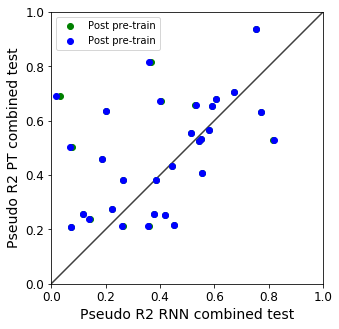

In [1171]:
fig,ax= plt.subplots(figsize=(5,5))
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Pseudo R2 RNN combined test',Fontsize=14);
ax.set_ylabel('Pseudo R2 PT combined test' ,Fontsize=14);

ax.set_xlim([0,1])
ax.set_ylim([0,1]);


plt.scatter(all_subj_metrics_df8.pseudoR2_test,PT_metrics.PT_pseudoR2_test,label ="Post pre-train", color="green")
plt.scatter(all_subj_metrics_manual_df8.pseudo_R2_test,PT_metrics.PT_pseudoR2_test,label ="Post pre-train", color="blue")



plt.legend(loc=0);
# plt.savefig(LSTM_file_path+"/R2_test_RNN_PT.pdf")

In [1095]:
sc_stats.wilcoxon(all_subj_metrics_df8.pseudoR2_test,PT_metrics.PT_pseudoR2_test)

WilcoxonResult(statistic=136.0, pvalue=0.04716174720825457)

In [1096]:
PT_metrics.loc[(PT_metrics.PT_pseudoR2_test.values - all_subj_metrics_df8.pseudoR2_test.values)>0].Subject_number.values

array([11, 12, 13, 15, 16, 17, 19, 20, 21, 23, 24, 25, 26, 28, 29, 32, 33,
       36, 37, 38, 41])

In [972]:
PT_metrics.loc[PT_metrics.Subject_number==29]

Subject_number   PT_loss  PT_pseudoR2  PT_loss_test  PT_pseudoR2_test
18              29  25.73737     0.876229     19.583431          0.811647

In [960]:
all_subj_metrics_df8.pseudoR2_test

0    0.626195
0    0.407116
0    0.206838
0    0.446228
0    0.872054
0    0.460778
0    0.264637
0    0.358363
0    0.489653
0   -0.135917
0    0.571095
0    0.779810
0    0.347620
0    0.052657
0    0.510028
0    0.506007
0    0.533847
0    0.554739
0    0.424417
0    0.822152
0    0.623370
0    0.490550
0    0.708683
0    0.687561
0    0.588455
0    0.572494
0    0.480711
0    0.252199
0    0.621750
0    0.272253
Name: pseudoR2_test, dtype: float64

In [27]:
os.mkdir(file_path)


In [973]:
all_subj_metrics_df8.accuracy_test

0    0.857787
0    0.792721
0    0.757778
0    0.840758
0    0.932877
0    0.919517
0    0.838247
0    0.837155
0    0.964666
0    0.886955
0    0.841994
0    0.907989
0    0.826037
0    0.745557
0    0.838738
0    0.867727
0    0.794687
0    0.905553
0    0.812398
0    0.963736
0    0.868402
0    0.826035
0    0.894112
0    0.907751
0    0.866524
0    0.913191
0    0.867732
0    0.751132
0    0.845498
0    0.770937
Name: accuracy_test, dtype: float64

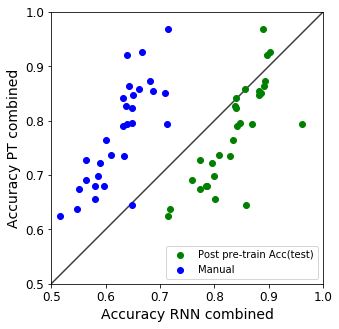

In [1173]:
fig,ax= plt.subplots(figsize=(5,5))
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Accuracy RNN combined',Fontsize=14);
ax.set_ylabel('Accuracy PT combined' ,Fontsize=14);

ax.set_xlim([0.5,1])
ax.set_ylim([0.5,1]);


# plt.scatter(all_subj_metrics_df8.accuracy,PT_metrics.PT_accuracy,label ="Post pre-train Acc(train)", color="red")

plt.scatter(all_subj_metrics_df8.accuracy_test,PT_metrics.PT_accuracy_test,label ="Post pre-train Acc(test)", color="green")

# plt.scatter(all_subj_metrics_df8.loc[all_subj_metrics_df8.accuracy_test.values>PT_metrics.PT_accuracy_test.values+0.05].accuracy_test,PT_metrics.loc[all_subj_metrics_df8.accuracy_test.values>PT_metrics.PT_accuracy_test.values+0.05].PT_accuracy_test,label =">5%", color="grey")

plt.scatter(all_subj_metrics_manual_df8.accuracy_test,PT_metrics.PT_accuracy_test,label ="Manual", color="blue")


# plt.scatter(all_subj_metrics_manual_df8.loc[all_subj_metrics_manual_df8.accuracy_test.values>PT_metrics.PT_accuracy_test.values+0.05].accuracy_test,PT_metrics.loc[all_subj_metrics_manual_df8.accuracy_test.values>PT_metrics.PT_accuracy_test.values+0.05].PT_accuracy_test,label =">5%", color="grey")


plt.legend(loc=0);
# plt.savefig(LSTM_file_path+"/Accuracy_test_RNN_PT.pdf")

In [ ]:
sc_stats.wilcoxon(all_subj_metrics_df8.accuracy_test,PT_metrics.PT_accuracy_test)

In [1156]:
np.array([all_subj_metrics_df8.pseudoR2_test, PT_metrics.PT_pseudoR2_test]).T

array([[0.62252835, 0.63489937],
       [0.14750307, 0.23930043],
       [0.12753683, 0.21073946],
       [0.40294086, 0.38047328],
       [0.76021435, 0.93672309],
       [0.68390932, 0.69103665],
       [0.32705975, 0.38202162],
       [0.28819429, 0.25217635],
       [0.24507785, 0.67226416],
       [0.68018179, 0.68127963],
       [0.30246722, 0.40864679],
       [0.7599093 , 0.70710079],
       [0.38968297, 0.4345317 ],
       [0.1940647 , 0.21294105],
       [0.46168932, 0.5323986 ],
       [0.52796102, 0.55513899],
       [0.35977523, 0.45814547],
       [0.66066518, 0.81753456],
       [0.43034831, 0.25806228],
       [0.84142231, 0.53002529],
       [0.48561421, 0.56501539],
       [0.1998619 , 0.21427791],
       [0.5289768 , 0.21731634],
       [0.64406215, 0.63274199],
       [0.53782212, 0.65336593],
       [0.43479428, 0.50257361],
       [0.42449114, 0.5262543 ],
       [0.28315606, 0.25741915],
       [0.70038595, 0.65876393],
       [0.22206133, 0.27375642]])

In [1128]:
np.array([all_subj_metrics_df8.accuracy_test, PT_metrics.PT_accuracy_test]).T

array([[0.87721586, 0.84176292],
       [0.75798112, 0.67485366],
       [0.70111865, 0.62513105],
       [0.82036883, 0.72204086],
       [0.92188311, 0.96839872],
       [0.86931121, 0.86458937],
       [0.81964487, 0.76474356],
       [0.80234635, 0.68040425],
       [0.89355361, 0.92625795],
       [0.88289255, 0.85776443],
       [0.81593132, 0.73520935],
       [0.89212048, 0.8550287 ],
       [0.78988916, 0.73761804],
       [0.74108243, 0.63689306],
       [0.83136958, 0.7898136 ],
       [0.86051571, 0.79407089],
       [0.78715312, 0.7274759 ],
       [0.91898972, 0.92113601],
       [0.79967767, 0.65643578],
       [0.96129769, 0.79479778],
       [0.86063075, 0.79578454],
       [0.78468758, 0.69864235],
       [0.8470434 , 0.64523398],
       [0.90376621, 0.85136183],
       [0.84115767, 0.82264253],
       [0.88486063, 0.8737645 ],
       [0.86317486, 0.84678414],
       [0.77023351, 0.67953334],
       [0.85273898, 0.82693204],
       [0.78397214, 0.69004477]])

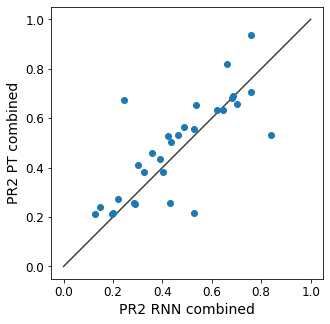

In [1116]:
# fig,ax= plt.subplots(figsize=(5,5))
# lims = [
#     np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
#     np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
# ]
# ax.plot([0,1],[0,1],color='black',alpha=0.75, zorder=0)
# ax.set_aspect('equal')
# ax.set_xlabel('PR2 RNN combined',Fontsize=14);
# ax.set_ylabel('PR2 PT combined' ,Fontsize=14);

# # ax.set_xlim([0.5,1])
# # ax.set_ylim([0.5,1]);
# ax.scatter(all_subj_metrics_df8.pseudoR2_test, PT_metrics.PT_pseudoR2_test)


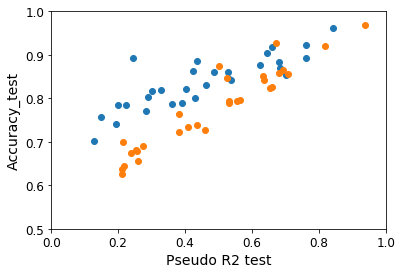

In [1099]:
plt.scatter(all_subj_metrics_df8.pseudoR2_test,all_subj_metrics_df8.accuracy_test,label="RNN")
plt.scatter(PT_metrics.PT_pseudoR2_test,PT_metrics.PT_accuracy_test,label="PT")
plt.xlim([0,1]);
plt.ylim([0.5, 1]);
plt.xlabel('Pseudo R2 test');
plt.ylabel('Accuracy_test');

In [1005]:
np.sum(all_subj_metrics_df8.accuracy_test.values>PT_metrics.PT_accuracy_test.values+0.05)

20

In [1129]:
## Recalculating loss and accuracy
subj_num=12
neurons=8
onehot_encoder = OneHotEncoder(sparse=False)
file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/ActualDataFitting/Pretraining/vcheck/subject_num_"+str(subj_num)

prob_test_df = pd.read_csv(file_path + "/prob_test_currentprevopts_neurons="+str(neurons)+".csv")

# prob_test_df.shape
# prob_test_df.head()

train_data_df = pd.read_csv(file_path+"/train_data.csv")
test_data_df = pd.read_csv(file_path+"/test_data.csv")


prob_test_df = pd.read_csv(file_path + "/prob_test_currentprevopts_neurons="+str(neurons)+".csv")
prob_test =prob_test_df.values[:,1:]
test_yy = test_data_df.Choice.values


encode_categorical = test_yy.reshape(len(test_yy), 1)

test_yy = onehot_encoder.fit_transform(encode_categorical)
((np.dot(test_yy[:,0],prob_test[:,0]) + np.dot(test_yy[:,1],prob_test[:,1])))/150

acc_test = (np.dot(test_yy[:,0],prob_test[:,0]) + np.dot(test_yy[:,1],prob_test[:,1]))/150
pseudoR2_test  = 1 + (-((np.dot(test_yy[:,0],np.log(prob_test[:,0])) + np.dot(test_yy[:,1],np.log(prob_test[:,1]))))/150)/np.log(0.5)

print(acc_test)
print(pseudoR2_test)

0.6742517756266667
0.1403598019088882


/Users/ritwik7/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


41

In [1126]:
all_subj_metrics_df8.pseudoR2_test

0    0.622528
0    0.147503
0    0.127537
0    0.402941
0    0.760214
0    0.683909
0    0.327060
0    0.288194
0    0.245078
0    0.680182
0    0.302467
0    0.759909
0    0.389683
0    0.194065
0    0.461689
0    0.527961
0    0.359775
0    0.660665
0    0.430348
0    0.841422
0    0.485614
0    0.199862
0    0.528977
0    0.644062
0    0.537822
0    0.434794
0    0.424491
0    0.283156
0    0.700386
0    0.222061
Name: pseudoR2_test, dtype: float64

In [437]:
# fig,ax= plt.subplots(figsize=(5,5))
# # ax.scatter(0.5*(all_subj_metrics8_1.loss_val +all_subj_metrics8_2).loss_val,-PT_metrics.PT_loss_test/75)
# lims = [
#     np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
#     np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
# ]
# ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
# ax.set_aspect('equal')
# ax.set_xlabel('Average Loss RNN comined test',Fontsize=14);
# ax.set_ylabel('Average Loss PT combined test' ,Fontsize=14);

# ax.set_xlim([0,1])
# ax.set_ylim([0,1]);


# # 
# # plt.scatter(0.5*(all_subj_metrics8_1.loss_val +all_subj_metrics8_2.loss_val),0.5*(PT_metrics_1.PT_loss_test + PT_metrics_2.PT_loss_test)/150,label ="valid")
# # plt.scatter(0.5*(all_subj_metrics8_1.loss_test +all_subj_metrics8_2.loss_test),0.5*(PT_metrics_1.PT_loss_test + PT_metrics_2.PT_loss_test)/150,label ="test")

# plt.scatter(all_subj_metrics8_1.loss_test,PT_metrics_1.PT_loss_test/150,label ="1st half train")
# plt.scatter(all_subj_metrics8_2.loss_test,PT_metrics_2.PT_loss_test/150,label ="2nd half train")



# plt.legend(loc=0);

In [389]:
# sc_stats.wilcoxon(0.5*(all_subj_metrics8_1.loss_test +all_subj_metrics8_2.loss_test),0.5*(PT_metrics_1.PT_loss_test + PT_metrics_2.PT_loss_test)/150)

In [438]:
# fig,ax= plt.subplots(figsize=(5,5))
# # ax.scatter(0.5*(all_subj_metrics8_1.loss_val +all_subj_metrics8_2).loss_val,-PT_metrics.PT_loss_test/75)
# lims = [
#     np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
#     np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
# ]
# ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
# ax.set_aspect('equal')
# ax.set_xlabel('Average Loss RNN combined test',Fontsize=14);
# ax.set_ylabel('Average Loss PT combined test' ,Fontsize=14);

# ax.set_xlim([0,1])
# ax.set_ylim([0,1]);


# # 
# # plt.scatter(0.5*(all_subj_metrics8_1.loss_val +all_subj_metrics8_2.loss_val),0.5*(PT_metrics_1.PT_loss_test + PT_metrics_2.PT_loss_test)/150,label ="valid")
# # plt.scatter(0.5*(all_subj_metrics8_1.loss_test +all_subj_metrics8_2.loss_test),0.5*(PT_metrics_1.PT_loss_test + PT_metrics_2.PT_loss_test)/150,label ="test")

# # plt.scatter(all_subj_metrics_df8.loss_val,PT_metrics.PT_loss_test/150,label ="VALID_train_in_splits_of50")
# plt.scatter(all_subj_metrics_df8.loss_test,PT_metrics.PT_loss_test/150,label ="TEST_train_in_splits_of50")



# plt.legend(loc=0);

In [439]:
# np.array([PT_metrics_1.PT_loss_test, PT_metrics_2.PT_loss_test]).T

In [690]:
## generated data 
# stop=750
stop = 150

print(all_subj_metrics_df.loss_test)
print(PT_metrics.PT_loss_test/(stop/2))

0    0.470232
Name: loss_test, dtype: float64
0    0.419108
Name: PT_loss_test, dtype: float64


In [744]:
print(all_subj_metrics_df.pseudoR2_test,PT_metrics.PT_pseudoR2_test)

0    0.547383
Name: pseudoR2_test, dtype: float64 0    0.531752
Name: PT_pseudoR2_test, dtype: float64


(0.25, 0.75)

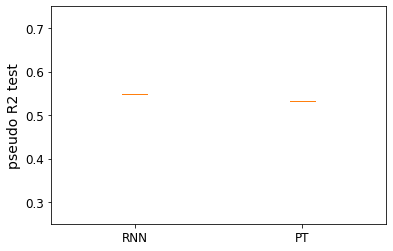

In [743]:
# plt.boxplot(all_subj_metrics_df.pseudoR2_test)

# df = pd.DataFrame([all_subj_metrics_df.pseudoR2_test.values,PT_metrics.PT_pseudoR2_test.values,columns={"RNN","PT"})

# df.head()

plt.boxplot(np.array([all_subj_metrics_df.pseudoR2_test.values,PT_metrics.PT_pseudoR2_test.values]).T, labels=["RNN","PT"] )
plt.ylabel('pseudo R2 test')
plt.ylim([0.25,0.75])
    
    
    
# #     np.array([valid_df["3neurons"],valid_df["5neurons"],valid_df["8neurons"],valid_df["10neurons"],valid_df["16neurons"],valid_df["32neurons"]]).T,labels=["3","5","8","10","16","32"]);
# plt.xlabel("N_neurons");
# plt.ylabel('Validation Loss (nats)');
# plt.suptitle("RNN Current Options, Previous Reward, Choice, Options");
# # plt.savefig(LSTM_file_path+"/CurrPrev_oc_Loss_Valid.pdf")
# plt.savefig(LSTM_file_path+"/CurrPrevOpts_Loss_Valid.pdf")

In [716]:
all_subj_metrics_df.pseudoR2_test.values

array([0.55390448])

In [705]:
# LSTM_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/generated_data/PT_fake_data/mu=5/300"
# all_subj_metrics_df = pd.read_csv(LSTM_file_path+"/curr_prev_opts_all_subj_metrics_df8_testsess.csv")
# all_subj_metrics_df.head()

In [560]:
from itertools import product


In [691]:
RNN_test_loss = []; RNN_test_Rsq =[]; PT_test_loss = []; PT_test_Rsq=[];
for i, val in enumerate(list(product([0.5,1,5,20],[300,1500]))):
    print(i,val)
    LSTM_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/generated_data/PT_fake_data/mu=" + str(val[0]) + "/"+ str(val[1])
    all_subj_metrics_df = pd.read_csv(LSTM_file_path+"/curr_prev_opts_all_subj_metrics_df8_testsess.csv")
    RNN_test_loss.append(all_subj_metrics_df.loss_test.to_list())
    RNN_test_Rsq.append(all_subj_metrics_df.pseudoR2_test.to_list())
    
    
    PT_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/generated_data/PT_fake_data/mu=" + str(val[0]) 
    PT_file_name = PT_file_path + "/PT_loss_updated_" + str(val[1]) + ".csv"
    PT_metrics = pd.read_csv(PT_file_name)
    
#     stop = val[1]
    PT_test_loss.append(PT_metrics.PT_loss_test.to_list())
    PT_test_Rsq.append(PT_metrics.PT_pseudoR2_test.to_list())
    
    

0 (0.5, 300)
1 (0.5, 1500)
2 (1, 300)
3 (1, 1500)
4 (5, 300)
5 (5, 1500)
6 (20, 300)
7 (20, 1500)


In [692]:
RNN_test_loss, PT_test_loss

([[0.4702319800853729],
  [0.3727376759052277],
  [0.3025799989700317],
  [0.208916649222374],
  [0.20556242763996124],
  [0.04469996690750122],
  [0.214837446808815],
  [0.015488405711948872]],
 [[31.433065845890997],
  [118.865521504843],
  [16.1893244118818],
  [69.3113950508514],
  [0.7571718774953871],
  [5.97350258042458],
  [0.000272613110010406],
  [0.0016130179646884]])

In [693]:
RNN_test_Rsq,PT_test_Rsq

([[0.3215986542634347],
  [0.4622532034190503],
  [0.5634693360137476],
  [0.6985969862077419],
  [0.7034361050507315],
  [0.9355115794146472],
  [0.6900550808916761],
  [0.9776549538880952]],
 [[0.39535562378928996],
  [0.542702137579421],
  [0.6885832260751401],
  [0.733346117554776],
  [0.9854350918298241],
  [0.9770188198679571],
  [0.999994756032241],
  [0.999993794418617]])

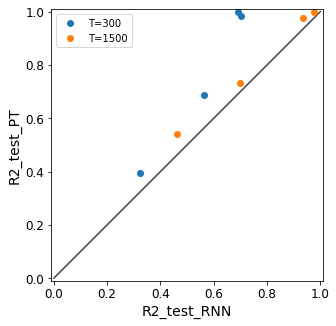

In [697]:
fig,ax= plt.subplots(figsize=(5,5))
# ax.scatter(0.5*(all_subj_metrics8_1.loss_val +all_subj_metrics8_2).loss_val,-PT_metrics.PT_loss_test/75)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('R2_test_RNN',Fontsize=14);
ax.set_ylabel('R2_test_PT' ,Fontsize=14);

ax.set_xlim([-0.01,1.01])
ax.set_ylim([-0.01,1.01]);


plt.scatter(RNN_test_Rsq[0:len(RNN_test_Rsq):2],PT_test_Rsq[0:len(RNN_test_Rsq):2],label ="T=300")
plt.scatter(RNN_test_Rsq[1:len(RNN_test_Rsq):2],PT_test_Rsq[1:len(RNN_test_Rsq):2],label ="T=1500")

# plt.scatter(RNN_test_Rsq[1:9:3],PT_test_Rsq[1:9:3],label ="T=1500")
# plt.scatter(RNN_test_Rsq[2:9:3],PT_test_Rsq[2:9:3],label ="T=3000")



plt.legend(loc=0);

In [694]:
RNN_test_Rsq

[[0.3215986542634347],
 [0.4622532034190503],
 [0.5634693360137476],
 [0.6985969862077419],
 [0.7034361050507315],
 [0.9355115794146472],
 [0.6900550808916761],
 [0.9776549538880952]]

In [654]:
RNN_test_Rsq[0:9:3]

[[0.5634693360137476], [0.7034361050507315], [0.6900550808916761]]

In [659]:
RNN_test_Rsq[2:9:3]

[[0.003237054706704434], [0.016833487135965552], [0.016833487135965552]]

In [411]:
### UNcomment below for prev actiona and otucomes


In [412]:
# all_subj_metrics_df10.to_csv(LSTM_file_path+"/all_subj_metrics_df10.csv")

In [369]:
# all_subj_metrics_df3 = pd.read_csv(LSTM_file_path+"/all_subj_metrics_df3.csv")
# all_subj_metrics_df5 = pd.read_csv(LSTM_file_path+"/all_subj_metrics_df5.csv")
# all_subj_metrics_df8 = pd.read_csv(LSTM_file_path+"/all_subj_metrics_df8.csv")
# all_subj_metrics_df16 = pd.read_csv(LSTM_file_path+"/all_subj_metrics_df16.csv")
# all_subj_metrics_df32 = pd.read_csv(LSTM_file_path+"/all_subj_metrics_df32.csv")


In [370]:
# ## v2 ##
# all_subj_metrics_df3 = pd.read_csv(LSTM_file_path+"/curr_prev_CR_all_subj_metrics_df3.csv")
# all_subj_metrics_df5 = pd.read_csv(LSTM_file_path+"/curr_prev_CR_all_subj_metrics_df5.csv")
# all_subj_metrics_df8 = pd.read_csv(LSTM_file_path+"/curr_prev_CR_all_subj_metrics_df8.csv")
# all_subj_metrics_df16 = pd.read_csv(LSTM_file_path+"/curr_prev_CR_all_subj_metrics_df16.csv")
# all_subj_metrics_df32 = pd.read_csv(LSTM_file_path+"/curr_prev_CR_all_subj_metrics_df32.csv")


In [132]:
## curr and prev outcomes
all_subj_metrics_df3 = pd.read_csv(LSTM_file_path+"/curr_prev_opts_all_subj_metrics_df3.csv")
all_subj_metrics_df5 = pd.read_csv(LSTM_file_path+"/curr_prev_opts_all_subj_metrics_df5.csv")
all_subj_metrics_df8 = pd.read_csv(LSTM_file_path+"/curr_prev_opts_all_subj_metrics_df8.csv")
all_subj_metrics_df10 = pd.read_csv(LSTM_file_path+"/curr_prev_opts_all_subj_metrics_df10.csv")
all_subj_metrics_df16 = pd.read_csv(LSTM_file_path+"/curr_prev_opts_all_subj_metrics_df16.csv")
all_subj_metrics_df32 = pd.read_csv(LSTM_file_path+"/curr_prev_opts_all_subj_metrics_df32.csv")


### Model Selection

In [131]:
curr_all_subj_metrics_df = pd.read_csv(LSTM_file_path + "/curr_opts_all_subj_metrics_df8.csv")
# curr_prevRC_all_subj_metrics_df = pd.read_csv(LSTM_file_path + "/all_subj_metrics_df8.csv")
curr_prevRC_all_subj_metrics_df = pd.read_csv(LSTM_file_path + "/curr_prev_CR_all_subj_metrics_df8.csv")

curr_prev_RCO_all_subj_metrics_df = pd.read_csv(LSTM_file_path + "/curr_prev_opts_all_subj_metrics_df8.csv")
curr_prev_RCO_RT_all_subj_metrics_df = pd.read_csv(LSTM_file_path + "/curr_prev_RT_opts_all_subj_metrics_df8.csv")


In [148]:
200*curr_prev_RCO_all_subj_metrics_df.loss

0      46.449426
1     110.533667
2     108.342111
3      47.167519
4       5.554689
5      40.159407
6      63.004148
7      59.960288
8      19.854067
9      17.733814
10     53.519762
11     24.177746
12     56.382155
13     79.913664
14     72.518611
15     41.612843
16     74.498045
17     20.950633
18     77.768344
19     39.825034
20     43.323231
21     71.862608
22     63.716078
23     26.765731
24     46.808183
25     46.122277
26     37.034836
27     64.099669
28     59.421569
29     56.229943
Name: loss, dtype: float64

In [146]:
PT_metrics.PT_loss

0     30.581271
1     84.483105
2     85.669129
3     44.054968
4      0.000079
5     37.841539
6     50.993724
7     64.710577
8      3.891118
9     23.652336
10    64.465244
11    24.949837
12    53.227636
13    81.986908
14    37.192073
15    47.374329
17    52.312906
18    11.009181
19    86.802488
20    67.755621
21    40.019997
22    82.539639
23    66.067593
24    22.368417
25    49.916440
26    28.361879
27    36.965383
28    65.482834
29    43.869669
30    54.479147
Name: PT_loss, dtype: float64

## Prospect Theory

In [1076]:
## ACTUAL SUBJECT DATA
# PT_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/ActualDataFitting/Pretraining/v2/"
PT_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/ActualDataFitting/Pretraining/v6chunks/"

# PT_file_name = PT_file_path + "PT_loss_updated_combined_1sthalf.csv"
PT_file_name = PT_file_path + "PT_loss_updated_50_split_combined_1sthalf.csv"

PT_metrics = pd.read_csv(PT_file_name)
PT_metrics = PT_metrics[PT_metrics.PT_loss !=0]
PT_metrics

Subject_number     PT_loss  PT_pseudoR2  PT_accuracy  PT_loss_test  \
0               11   80.758053     0.611636     0.837009     37.960270   
1               12  139.685133     0.328257     0.691030     79.091514   
2               13  168.434564     0.190001     0.621306     82.061058   
3               14  126.183002     0.393188     0.728144     64.413480   
4               15   24.311868     0.883085     0.955229      6.579031   
5               16   69.151482     0.667452     0.869749     32.123561   
6               17  116.406393     0.440204     0.745614     64.252496   
7               18  144.962732     0.302877     0.679937     77.752778   
8               19   35.596804     0.828816     0.941802     34.075376   
9               20   74.917703     0.639722     0.850811     33.138019   
10              21  126.121845     0.393482     0.725283     61.484221   
11              22   77.621619     0.626719     0.841347     30.453339   
12              23  123.568875     0.405759     0.731263     58.792914   
13              24  159.182263     0.234495     0.644184     81.832153   
14              25   99.238828     0.522762     0.781459     48.617488   
15              26   98.647699     0.525605     0.792778     46.253123   
17              28  134.437937     0.353490     0.702846     56.337741   
18              29   35.620789     0.828700     0.931435     18.971311   
19              30  148.794161     0.284451     0.669281     77.140806   
20              31  113.870134     0.452400     0.770594     48.864246   
21              32  108.224128     0.479552     0.766025     45.226253   
22              33  127.806077     0.385383     0.723173     81.693158   
23              34  137.566628     0.338444     0.696112     81.377245   
24              35   63.856853     0.692913     0.882340     38.184578   
25              36   84.444216     0.593909     0.825746     36.040264   
26              37   59.714990     0.712832     0.874938     51.718455   
27              38   83.166939     0.600052     0.830351     49.256325   
28              39  136.345758     0.344316     0.701624     77.207674   
29              40   91.412352     0.560400     0.793591     35.479023   
30              41  128.172398     0.383621     0.714358     75.509054   

    PT_pseudoR2_test  PT_accuracy_test  
0           0.634899          0.841763  
1           0.239300          0.674854  
2           0.210739          0.625131  
3           0.380473          0.722041  
4           0.936723          0.968399  
5           0.691037          0.864589  
6           0.382022          0.764744  
7           0.252176          0.680404  
8           0.672264          0.926258  
9           0.681280          0.857764  
10          0.408647          0.735209  
11          0.707101          0.855029  
12          0.434532          0.737618  
13          0.212941          0.636893  
14          0.532399          0.789814  
15          0.555139          0.794071  
17          0.458145          0.727476  
18          0.817535          0.921136  
19          0.258062          0.656436  
20          0.530025          0.794798  
21          0.565015          0.795785  
22          0.214278          0.698642  
23          0.217316          0.645234  
24          0.632742          0.851362  
25          0.653366          0.822643  
26          0.502574          0.873764  
27          0.526254          0.846784  
28          0.257419          0.679533  
29          0.658764          0.826932  
30          0.273756          0.690045

In [767]:
## original actual

PT_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/generated_data/PT_fake_data/FittingProc/mu=0.5/"
PT_file_name = PT_file_path + "PT_loss_updated_600.csv"
PT_metrics = pd.read_csv(PT_file_name)
PT_metrics = PT_metrics[PT_metrics.PT_loss !=0]
PT_metrics.head(10)



Subject_number    PT_loss  PT_pseudoR2  PT_loss_test  PT_pseudoR2_test
0              27  87.003943     0.581599     48.684718          0.531752

In [689]:
## genereate data

PT_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/generated_data/PT_fake_data/mu=0.5/"
# PT_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/generated_data/PT_fake_data/mu=1/"
# PT_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/generated_data/PT_fake_data/mu=5/"
# PT_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/generated_data/PT_fake_data/mu=20/"





# PT_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/generated_data/"
# PT_file_name = PT_file_path + "PT_loss_updated_1500.csv"
PT_file_name = PT_file_path + "PT_loss_updated_3000.csv"
PT_file_name = PT_file_path + "PT_loss_updated_1500.csv"

PT_file_name = PT_file_path + "PT_loss_updated_300.csv"


PT_metrics = pd.read_csv(PT_file_name)
PT_metrics = PT_metrics[PT_metrics.PT_loss !=0]


PT_metrics.head(10)





Subject_number   PT_loss  PT_pseudoR2  PT_loss_test  PT_pseudoR2_test
0              27  48.09296     0.537444     31.433066          0.395356

In [763]:
## Split by 50 CombinedDataset

PT_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/"
PT_file_name = PT_file_path + "PT_loss_updated_50_split_combined_1sthalf.csv"
PT_metrics = pd.read_csv(PT_file_name)
PT_metrics = PT_metrics[PT_metrics.PT_loss !=0]





In [371]:
### Combined dataset

PT_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/"
PT_file_name = PT_file_path + "PT_loss_updated_combined_1sthalf.csv"
PT_metrics = pd.read_csv(PT_file_name)
PT_metrics_1 = PT_metrics[PT_metrics.PT_loss !=0]

PT_file_name = PT_file_path + "PT_loss_updated_combined_2ndhalf.csv"
PT_metrics = pd.read_csv(PT_file_name)
PT_metrics_2 = PT_metrics[PT_metrics.PT_loss !=0]


# PT_metrics.head(100)

In [108]:
PT_file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/"
# PT_file_name = PT_file_path  + "PT_loss_updated.csv"
PT_file_name = PT_file_path  + "PT_loss_updated_TESTSinSESS.csv"

In [109]:
PT_metrics = pd.read_csv(PT_file_name)

In [110]:
PT_metrics = PT_metrics[PT_metrics.PT_loss !=0]
PT_metrics.head(100)

Subject_number    PT_loss  PT_pseudoR2  PT_loss_test  PT_pseudoR2_test
0               11  30.581271     0.705870    -27.700600          0.467153
1               12  84.483105     0.187444    -38.811575          0.253423
2               13  85.669129     0.176037    -49.077004          0.055958
3               14  44.054968     0.576281    -34.456282          0.337201
4               15   0.000079     0.999999    -20.972966          0.596565
5               16  37.841539     0.636041    -17.712510          0.659283
6               17  50.993724     0.509544    -26.367238          0.492802
7               18  64.710577     0.377616    -45.056648          0.133293
8               19   3.891118     0.962575     -0.324164          0.993764
9               20  23.652336     0.772513    -10.688404          0.794399
10              21  64.465244     0.379975    -24.497522          0.528767
11              22  24.949837     0.760033    -27.652999          0.468069
12              23  53.227636     0.488058    -20.876840          0.598414
13              24  81.986908     0.211453    -32.407485          0.376612
14              25  37.192073     0.642288    -41.668574          0.198466
15              26  47.374329     0.544355    -31.731378          0.389617
17              28  52.312906     0.496856    -45.100720          0.132446
18              29  11.009181     0.894114    -12.060804          0.767999
19              30  86.802488     0.165137    -37.456750          0.279484
20              31  67.755621     0.348329    -25.776628          0.504162
21              32  40.019997     0.615089    -44.796672          0.138294
22              33  82.539639     0.206136    -37.628553          0.276180
23              34  66.067593     0.364564    -38.767037          0.254280
24              35  22.368417     0.784861    -41.735289          0.197183
25              36  49.916440     0.519905    -19.034894          0.633846
26              37  28.361879     0.727216    -17.736660          0.658819
27              38  36.965383     0.644468    -15.591893          0.700075
28              39  65.482834     0.370188    -32.168991          0.381199
29              40  43.869669     0.578063    -16.413560          0.684270
30              41  54.479147     0.476021    -28.705275          0.447827

In [111]:
PT_metrics = PT_metrics[PT_metrics.PT_loss !=0]
PT_metrics.head(100)

Subject_number    PT_loss  PT_pseudoR2  PT_loss_test  PT_pseudoR2_test
0               11  30.581271     0.705870    -27.700600          0.467153
1               12  84.483105     0.187444    -38.811575          0.253423
2               13  85.669129     0.176037    -49.077004          0.055958
3               14  44.054968     0.576281    -34.456282          0.337201
4               15   0.000079     0.999999    -20.972966          0.596565
5               16  37.841539     0.636041    -17.712510          0.659283
6               17  50.993724     0.509544    -26.367238          0.492802
7               18  64.710577     0.377616    -45.056648          0.133293
8               19   3.891118     0.962575     -0.324164          0.993764
9               20  23.652336     0.772513    -10.688404          0.794399
10              21  64.465244     0.379975    -24.497522          0.528767
11              22  24.949837     0.760033    -27.652999          0.468069
12              23  53.227636     0.488058    -20.876840          0.598414
13              24  81.986908     0.211453    -32.407485          0.376612
14              25  37.192073     0.642288    -41.668574          0.198466
15              26  47.374329     0.544355    -31.731378          0.389617
17              28  52.312906     0.496856    -45.100720          0.132446
18              29  11.009181     0.894114    -12.060804          0.767999
19              30  86.802488     0.165137    -37.456750          0.279484
20              31  67.755621     0.348329    -25.776628          0.504162
21              32  40.019997     0.615089    -44.796672          0.138294
22              33  82.539639     0.206136    -37.628553          0.276180
23              34  66.067593     0.364564    -38.767037          0.254280
24              35  22.368417     0.784861    -41.735289          0.197183
25              36  49.916440     0.519905    -19.034894          0.633846
26              37  28.361879     0.727216    -17.736660          0.658819
27              38  36.965383     0.644468    -15.591893          0.700075
28              39  65.482834     0.370188    -32.168991          0.381199
29              40  43.869669     0.578063    -16.413560          0.684270
30              41  54.479147     0.476021    -28.705275          0.447827

## Plotting

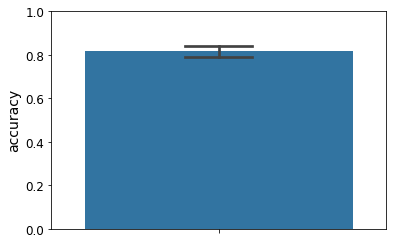

In [112]:

# sns.set(style="ticks")
ax = sns.barplot(y="accuracy", data=all_subj_metrics_df, capsize=.2)
# sns.catplot(y="accuracy",data=all_subj_metrics_df)sns.catplot(y="accuracy",data=all_subj_metrics_df,kind="box")


plt.ylim([0 ,1]);

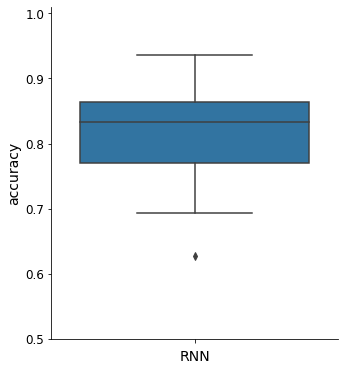

In [113]:
# sns.catplot(y="accuracy",data=all_subj_metrics_df)
sns.catplot(y="accuracy",data=all_subj_metrics_df,kind="box")
# sns.catplot(y="accuracy",data=all_subj_metrics_df,kind="violin")

plt.ylim([0.5,1.01])
plt.xlabel('RNN');

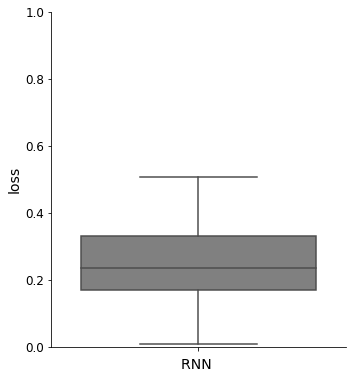

In [114]:
sns.catplot(y="loss",data=all_subj_metrics_df,kind="box",color="grey")
# plt.title("n="+str(all_subj_metrics_df.shape[0]))
plt.ylim([0,1])
plt.xlabel('RNN ');

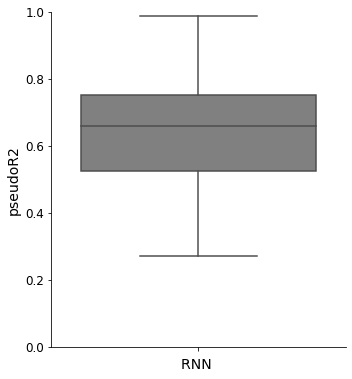

In [115]:
sns.catplot(y="pseudoR2",data=all_subj_metrics_df,kind="box",color="grey")
# plt.title("n="+str(all_subj_metrics_df.shape[0]))
# plt.ylim([0.5,0.75])
plt.ylim([0,1])
plt.xlabel('RNN ');

### train vs test

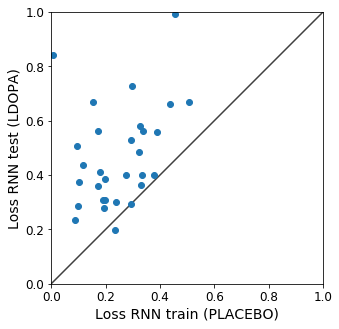

In [116]:
fig,ax= plt.subplots(figsize=(5,5))
ax.scatter(all_subj_metrics_df.loss,all_subj_metrics_df.loss_test)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Loss RNN train (PLACEBO)',Fontsize=14);
ax.set_ylabel('Loss RNN test (LDOPA)' ,Fontsize=14);

ax.set_xlim([0,1])
ax.set_ylim([0,1]);


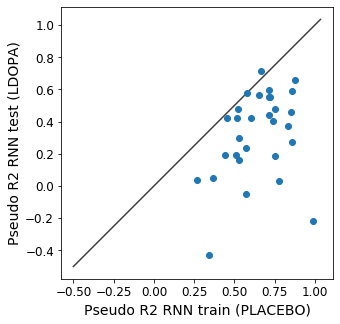

In [117]:
fig,ax= plt.subplots(figsize=(5,5))
ax.scatter(all_subj_metrics_df.pseudoR2,all_subj_metrics_df.pseudoR2_test)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Pseudo R2 RNN train (PLACEBO)',Fontsize=14);
ax.set_ylabel('Pseudo R2 RNN test (LDOPA)',Fontsize=14);

# ax.set_xlim([100,300])
# ax.set_ylim([100,300]);


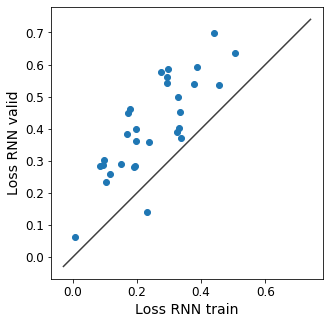

In [118]:
fig,ax= plt.subplots(figsize=(5,5))
ax.scatter(all_subj_metrics_df.loss,all_subj_metrics_df.loss_val)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Loss RNN train',Fontsize=14);
ax.set_ylabel('Loss RNN valid',Fontsize=14);

# ax.set_xlim([100,300])
# ax.set_ylim([100,300]);
# plt.savefig(LSTM_file_path+"/RNN_val_32neurons.pdf")

## compare between RNN for cross validation

In [232]:
all_subj_metrics_df8_curr_opts= pd.read_csv(LSTM_file_path+"/curr_opts_all_subj_metrics_df8.csv")
all_subj_metrics_df8 = pd.read_csv(LSTM_file_path+"/all_subj_metrics_df8.csv")


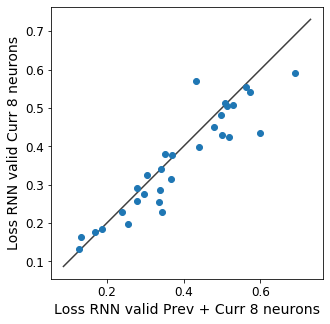

In [233]:
fig,ax= plt.subplots(figsize=(5,5))
ax.scatter(all_subj_metrics_df8.loss_val,all_subj_metrics_df8_curr_opts.loss_val)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Loss RNN valid Prev + Curr 8 neurons',Fontsize=14);
ax.set_ylabel('Loss RNN valid Curr 8 neurons',Fontsize=14);

# ax.set_xlim([100,300])
# ax.set_ylim([100,300]);
# plt.savefig(LSTM_file_path+"/RNN_val_8v10neurons.pdf")
plt.savefig(LSTM_file_path+"/RNN_valprevvcurr_8neurons.pdf")

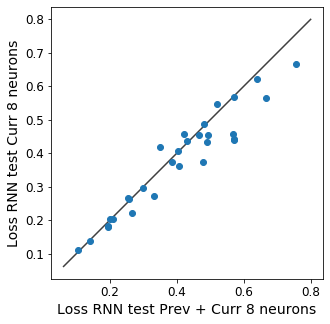

In [234]:
fig,ax= plt.subplots(figsize=(5,5))
ax.scatter(all_subj_metrics_df8.loss_test,all_subj_metrics_df8_curr_opts.loss_test)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Loss RNN test Prev + Curr 8 neurons',Fontsize=14);
ax.set_ylabel('Loss RNN test Curr 8 neurons',Fontsize=14);

# ax.set_xlim([100,300])
# ax.set_ylim([100,300]);
# plt.savefig(LSTM_file_path+"/RNN_val_8v10neurons.pdf")
plt.savefig(LSTM_file_path+"/RNN_testprevvcurr_8neurons.pdf")

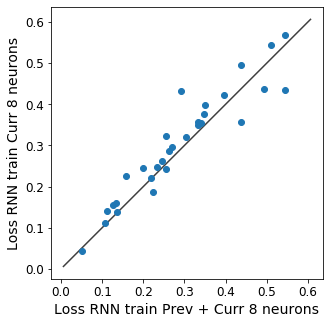

In [235]:
fig,ax= plt.subplots(figsize=(5,5))
ax.scatter(all_subj_metrics_df8.loss,all_subj_metrics_df8_curr_opts.loss)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Loss RNN train Prev + Curr 8 neurons',Fontsize=14);
ax.set_ylabel('Loss RNN train Curr 8 neurons',Fontsize=14);

# ax.set_xlim([100,300])
# ax.set_ylim([100,300]);
# plt.savefig(LSTM_file_path+"/RNN_val_8v10neurons.pdf")
plt.savefig(LSTM_file_path+"/RNN_train_prevvcurr_8neurons.pdf")

In [87]:
# all_subj_metrics_df32.loss_val.shape

In [479]:
valid_df = {'3neurons':all_subj_metrics_df3.loss_val.to_list(), '5neurons':all_subj_metrics_df5.loss_val.to_list(), '8neurons':all_subj_metrics_df8.loss_val.to_list(),'10neurons':all_subj_metrics_df10.loss_val.to_list(), '16neurons':all_subj_metrics_df16.loss_val.to_list(), '32neurons':all_subj_metrics_df32.loss_val.to_list()}
valid_df = pd.DataFrame(valid_df)

In [480]:
valid_df

3neurons  5neurons  8neurons  10neurons  16neurons  32neurons
0   0.401550  0.400598  0.380038   0.382529   0.378907   0.383162
1   0.641544  0.604734  0.614520   0.611981   0.623548   0.604448
2   0.545630  0.543893  0.521421   0.514800   0.532456   0.528095
3   0.486874  0.629377  0.479803   0.485435   0.469479   0.464235
4   0.143097  0.132781  0.130342   0.139600   0.138308   0.143385
5   0.282060  0.286773  0.274033   0.290464   0.286263   0.287339
6   0.557972  0.563142  0.569871   0.586894   0.553449   0.559425
7   0.579785  0.376394  0.331581   0.386530   0.436865   0.369319
8   0.203860  0.198148  0.214672   0.213375   0.206138   0.207952
9   0.166703  0.179023  0.163272   0.177380   0.176782   0.179925
10  0.327874  0.291303  0.292541   0.318665   0.324280   0.278968
11  0.229707  0.222408  0.220583   0.213237   0.230512   0.237074
12  0.571537  0.604160  0.444256   0.473488   0.529667   0.433158
13  0.567081  0.565035  0.571956   0.554940   0.563564   0.564876
14  0.353930  0.404109  0.377335   0.389422   0.394550   0.396281
15  0.371636  0.364353  0.370188   0.331775   0.326106   0.358810
16  0.504787  0.466506  0.518418   0.499794   0.518423   0.502767
17  0.268674  0.250530  0.241152   0.279910   0.240467   0.241865
18  0.719333  0.531497  0.553266   0.566547   0.548345   0.560303
19  0.184552  0.181988  0.180167   0.186649   0.183316   0.188807
20  0.385052  0.387185  0.426883   0.389674   0.369225   0.352274
21  0.554574  0.513766  0.485063   0.479584   0.444702   0.508034
22  0.477394  0.504577  0.501720   0.499410   0.511949   0.478181
23  0.357091  0.349916  0.358607   0.357905   0.353756   0.357621
24  0.342149  0.342841  0.327876   0.329693   0.361642   0.361390
25  0.390505  0.436478  0.383884   0.376716   0.375812   0.388126
26  0.233597  0.235708  0.200324   0.209652   0.218853   0.198103
27  0.506950  0.513174  0.512782   0.497899   0.504202   0.520427
28  0.418205  0.422084  0.423187   0.381055   0.430066   0.427367
29  0.506309  0.541052  0.535223   0.559949   0.537396   0.543610

In [481]:
# valid_df.head(100)

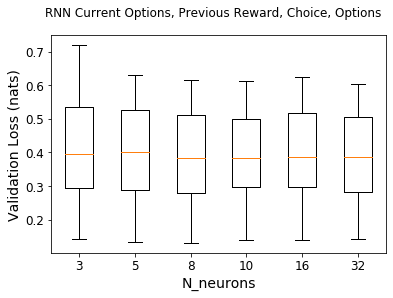

In [504]:
plt.boxplot(np.array([valid_df["3neurons"],valid_df["5neurons"],valid_df["8neurons"],valid_df["10neurons"],valid_df["16neurons"],valid_df["32neurons"]]).T,labels=["3","5","8","10","16","32"]);
plt.xlabel("N_neurons");
plt.ylabel('Validation Loss (nats)');
plt.suptitle("RNN Current Options, Previous Reward, Choice, Options");
# plt.savefig(LSTM_file_path+"/CurrPrev_oc_Loss_Valid.pdf")
plt.savefig(LSTM_file_path+"/CurrPrevOpts_Loss_Valid.pdf")

In [505]:
valid_df.describe()

3neurons   5neurons   8neurons  10neurons  16neurons  32neurons
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000
mean    0.409334   0.401451   0.386832   0.389498   0.392301   0.387511
std     0.152203   0.145344   0.138896   0.135234   0.136435   0.134592
min     0.143097   0.132781   0.130342   0.139600   0.138308   0.143385
25%     0.293513   0.287906   0.278660   0.297514   0.295767   0.281061
50%     0.396028   0.402353   0.381961   0.384529   0.386729   0.385644
75%     0.535960   0.527064   0.510016   0.499032   0.516804   0.506717
max     0.719333   0.629377   0.614520   0.611981   0.623548   0.604448

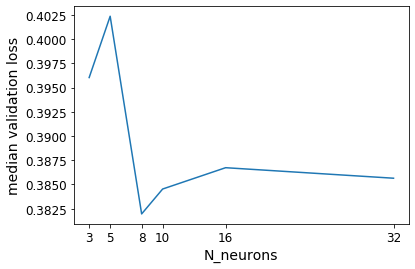

In [506]:
plt.plot([3,5,8,10,16,32],np.array([np.median(valid_df["3neurons"]),np.median(valid_df["5neurons"]),np.median(valid_df["8neurons"]),np.median(valid_df["10neurons"]),np.median(valid_df["16neurons"]),np.median(valid_df["32neurons"] )]).T)
# plt.plot([3,5,8,10,16,32],np.array([np.mean(valid_df["3neurons"]),np.mean(valid_df["5neurons"]),np.mean(valid_df["8neurons"]),np.mean(valid_df["10neurons"]),np.mean(valid_df["16neurons"]),np.mean(valid_df["32neurons"] )]).T)

plt.xticks([3,5,8,10,16,32])
plt.ylabel('median validation loss');
plt.xlabel("N_neurons")
plt.savefig(LSTM_file_path+"/Median_CurrPrevOpts_Loss_Valid.pdf")

In [507]:
test_df = {'3neurons':all_subj_metrics_df3.loss_test.to_list(), '5neurons':all_subj_metrics_df5.loss_test.to_list(),'8neurons':all_subj_metrics_df8.loss_test.to_list(),'10neurons':all_subj_metrics_df10.loss_test.to_list(), '16neurons':all_subj_metrics_df16.loss_test.to_list(), '32neurons':all_subj_metrics_df32.loss_test.to_list()}
test_df = pd.DataFrame(test_df)

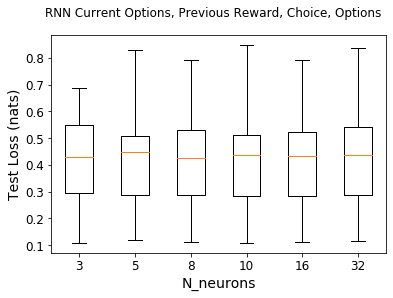

In [508]:
plt.boxplot(np.array([test_df["3neurons"],test_df["5neurons"],test_df["8neurons"],test_df["10neurons"],test_df["16neurons"],test_df["32neurons"]]).T,labels=["3","5","8","10","16","32"]);
plt.xlabel("N_neurons");
plt.ylabel('Test Loss (nats)');
plt.suptitle("RNN Current Options, Previous Reward, Choice, Options");
# plt.savefig(LSTM_file_path+"/CurrPrev_oc_Loss_Test.pdf")
plt.savefig(LSTM_file_path+"/CurrPrevOpts_Loss_Test.pdf")

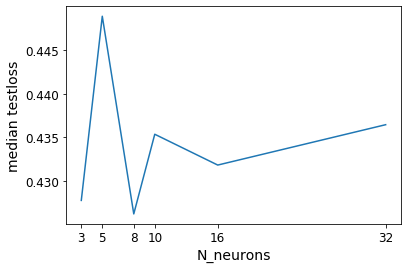

In [509]:
plt.plot([3,5,8,10,16,32],np.array([np.median(test_df["3neurons"]),np.median(test_df["5neurons"]),np.median(test_df["8neurons"]),np.median(test_df["10neurons"]),np.median(test_df["16neurons"]),np.median(test_df["32neurons"] )]).T)
plt.xticks([3,5,8,10,16,32])
plt.ylabel('median testloss');
plt.xlabel("N_neurons")
# plt.savefig(LSTM_file_path+"/Median_CurrPrev_oc_Loss_test.pdf")
plt.savefig(LSTM_file_path+"/Median_CurrPrevOpts_Loss_Test.pdf")

In [510]:
test_df.describe()

3neurons   5neurons   8neurons  10neurons  16neurons  32neurons
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000
mean    0.421884   0.426586   0.420484   0.418094   0.419228   0.428951
std     0.165500   0.178475   0.170513   0.172911   0.171620   0.177786
min     0.108946   0.117945   0.112858   0.107966   0.112906   0.115661
25%     0.292945   0.288518   0.288525   0.283483   0.285184   0.288783
50%     0.427800   0.448850   0.426257   0.435363   0.431841   0.436454
75%     0.550539   0.506285   0.530852   0.511170   0.521534   0.542030
max     0.687827   0.829000   0.791067   0.847123   0.791677   0.836256

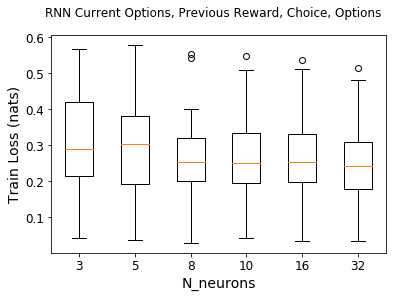

In [511]:
train_df = {'3neurons':all_subj_metrics_df3.loss.to_list(), '5neurons':all_subj_metrics_df5.loss.to_list(),'8neurons':all_subj_metrics_df8.loss.to_list(),'10neurons':all_subj_metrics_df10.loss.to_list(),  '16neurons':all_subj_metrics_df16.loss.to_list(), '32neurons':all_subj_metrics_df32.loss.to_list()}
train_df = pd.DataFrame(train_df)

plt.boxplot(np.array([train_df["3neurons"],train_df["5neurons"],train_df["8neurons"],train_df["10neurons"],train_df["16neurons"],train_df["32neurons"]]).T,labels=["3","5","8","10","16","32"]);
plt.xlabel("N_neurons");
plt.ylabel('Train Loss (nats)');
plt.suptitle("RNN Current Options, Previous Reward, Choice, Options");
# plt.savefig(LSTM_file_path+"/CurrPrev_oc_Loss_Traint.pdf")
plt.savefig(LSTM_file_path+"/CurrPrevOpts_Loss_Train.pdf")

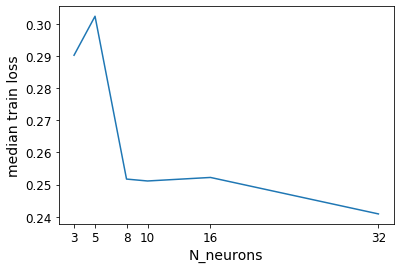

In [512]:
plt.plot([3,5,8,10,16,32],np.array([np.median(train_df["3neurons"]),np.median(train_df["5neurons"]),np.median(train_df["8neurons"]),np.median(train_df["10neurons"]),np.median(train_df["16neurons"]),np.median(train_df["32neurons"] )]).T)
plt.xticks([3,5,8,10,16,32])
plt.ylabel('median train loss');
plt.xlabel("N_neurons")
# plt.savefig(LSTM_file_path+"/Median_CurrPrev_oc_Loss_train.pdf")
plt.savefig(LSTM_file_path+"/Median_CurrPrevOpts_Loss_Train.pdf")

In [513]:
train_df.describe()

3neurons   5neurons   8neurons  10neurons  16neurons  32neurons
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000
mean    0.302139   0.287366   0.262552   0.266354   0.261358   0.244286
std     0.145721   0.136037   0.122725   0.120315   0.120474   0.114992
min     0.041607   0.035344   0.027773   0.041662   0.032263   0.032094
25%     0.213824   0.192369   0.199543   0.194424   0.197387   0.178633
50%     0.290293   0.302443   0.251718   0.251123   0.252224   0.240863
75%     0.420047   0.379727   0.320019   0.333955   0.330632   0.307206
max     0.568350   0.577438   0.552668   0.548286   0.536483   0.513188

In [514]:
# fig,ax= plt.subplots(figsize=(5,5))
# ax.scatter(all_subj_metrics_df.pseudoR2,all_subj_metrics_df.pseudoR2)
# lims = [
#     np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
#     np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
# ]
# ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
# ax.set_aspect('equal')
# ax.set_xlabel('Pseudo R2 RNN Current Options train (PLACEBO)',Fontsize=14);
# ax.set_ylabel('Pseudo R2 RNN Current Options + prev r train (PLACEBO)',Fontsize=14);

# # ax.set_xlim([100,300])
# # ax.set_ylim([100,300]);


In [31]:
# fig,ax= plt.subplots(figsize=(5,5))
# ax.scatter(all_subj_metrics_df_orig.pseudoR2_test,all_subj_metrics_df_1.pseudoR2_test)
# lims = [
#     np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
#     np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
# ]
# ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
# ax.set_aspect('equal')
# ax.set_xlabel('Pseudo R2 RNN Current Options test (LDOPA)',Fontsize=14);
# ax.set_ylabel('Pseudo R2 RNN Current Options + prev t test (LDOPA)',Fontsize=14);

# # ax.set_xlim([100,300])
# # ax.set_ylim([100,300]);


## PT

In [119]:
PT_metrics

Subject_number    PT_loss  PT_pseudoR2  PT_loss_test  PT_pseudoR2_test
0               11  30.581271     0.705870    -27.700600          0.467153
1               12  84.483105     0.187444    -38.811575          0.253423
2               13  85.669129     0.176037    -49.077004          0.055958
3               14  44.054968     0.576281    -34.456282          0.337201
4               15   0.000079     0.999999    -20.972966          0.596565
5               16  37.841539     0.636041    -17.712510          0.659283
6               17  50.993724     0.509544    -26.367238          0.492802
7               18  64.710577     0.377616    -45.056648          0.133293
8               19   3.891118     0.962575     -0.324164          0.993764
9               20  23.652336     0.772513    -10.688404          0.794399
10              21  64.465244     0.379975    -24.497522          0.528767
11              22  24.949837     0.760033    -27.652999          0.468069
12              23  53.227636     0.488058    -20.876840          0.598414
13              24  81.986908     0.211453    -32.407485          0.376612
14              25  37.192073     0.642288    -41.668574          0.198466
15              26  47.374329     0.544355    -31.731378          0.389617
17              28  52.312906     0.496856    -45.100720          0.132446
18              29  11.009181     0.894114    -12.060804          0.767999
19              30  86.802488     0.165137    -37.456750          0.279484
20              31  67.755621     0.348329    -25.776628          0.504162
21              32  40.019997     0.615089    -44.796672          0.138294
22              33  82.539639     0.206136    -37.628553          0.276180
23              34  66.067593     0.364564    -38.767037          0.254280
24              35  22.368417     0.784861    -41.735289          0.197183
25              36  49.916440     0.519905    -19.034894          0.633846
26              37  28.361879     0.727216    -17.736660          0.658819
27              38  36.965383     0.644468    -15.591893          0.700075
28              39  65.482834     0.370188    -32.168991          0.381199
29              40  43.869669     0.578063    -16.413560          0.684270
30              41  54.479147     0.476021    -28.705275          0.447827

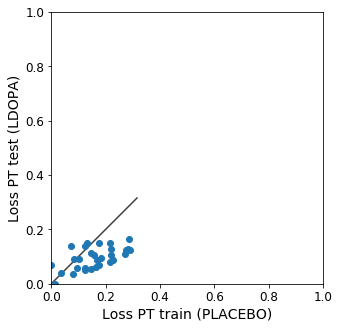

In [120]:
fig,ax= plt.subplots(figsize=(5,5))
ax.scatter(PT_metrics.PT_loss/300,-PT_metrics.PT_loss_test/300)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Loss PT train (PLACEBO)',Fontsize=14);
ax.set_ylabel('Loss PT test (LDOPA)' ,Fontsize=14);

ax.set_xlim([0,1])
ax.set_ylim([0,1]);


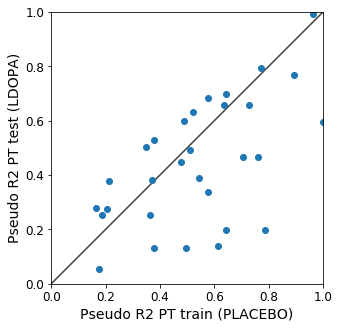

In [121]:
fig,ax= plt.subplots(figsize=(5,5))
ax.scatter(PT_metrics.PT_pseudoR2,PT_metrics.PT_pseudoR2_test)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Pseudo R2 PT train (PLACEBO)',Fontsize=14);
ax.set_ylabel('Pseudo R2 PT test (LDOPA)' ,Fontsize=14);

ax.set_xlim([0,1])
ax.set_ylim([0,1]);


In [122]:
all_subj_metrics_df.pseudoR2.shape

(30,)

In [37]:
# PT_metrics.loc[0:24]

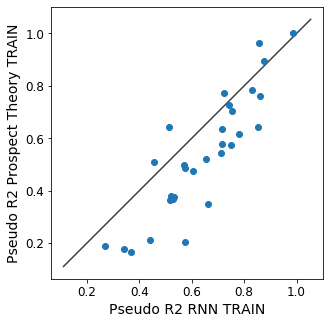

In [123]:
fig,ax= plt.subplots(figsize=(5,5))
# ax.scatter(all_subj_metrics_df.pseudoR2,PT_metrics.loc[PT_metrics.Subject_number<27].PT_pseudoR2)
ax.scatter(all_subj_metrics_df.pseudoR2,PT_metrics.PT_pseudoR2)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Pseudo R2 RNN TRAIN',Fontsize=14);
ax.set_ylabel('Pseudo R2 Prospect Theory TRAIN',Fontsize=14);


# ax.scatter(PT_metrics.loc[0:24].PT_pseudoR2_test,PT_metrics.loc[0:24].PT_pseudoR2)


In [124]:
sc_stats.wilcoxon(all_subj_metrics_df.pseudoR2,PT_metrics.PT_pseudoR2)

WilcoxonResult(statistic=45.0, pvalue=0.0001149921754357011)

In [125]:
np.array([all_subj_metrics_df.pseudoR2_test,PT_metrics.PT_pseudoR2_test]).T

array([[ 0.48010419,  0.46715308],
       [ 0.03560522,  0.25342311],
       [-0.43077234,  0.055958  ],
       [ 0.18792707,  0.33720124],
       [-0.21537078,  0.59656541],
       [ 0.59752616,  0.65928333],
       [ 0.4244006 ,  0.49280155],
       [ 0.29898883,  0.1332933 ],
       [ 0.58897802,  0.99376441],
       [ 0.55295036,  0.79439856],
       [ 0.47715477,  0.52876728],
       [ 0.27104698,  0.46806874],
       [ 0.57789326,  0.59841449],
       [ 0.19201845,  0.37661176],
       [ 0.19108201,  0.19846607],
       [ 0.55577591,  0.38961732],
       [-0.05209811,  0.13244552],
       [ 0.66116625,  0.76799917],
       [ 0.048253  ,  0.27948444],
       [ 0.71456151,  0.50416248],
       [ 0.03298008,  0.13829418],
       [ 0.23749892,  0.27617964],
       [ 0.42136171,  0.25427983],
       [ 0.37206855,  0.19718274],
       [ 0.56443971,  0.63384603],
       [ 0.40648701,  0.65881879],
       [ 0.45899413,  0.70007537],
       [ 0.16428866,  0.38119941],
       [ 0.44146807,

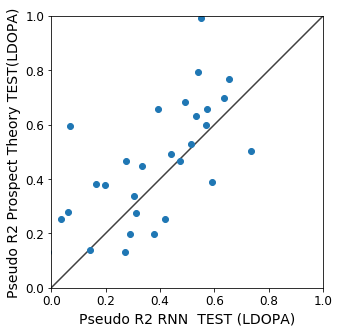

In [98]:
fig,ax= plt.subplots(figsize=(5,5))
# ax.scatter(all_subj_metrics_df.pseudoR2_test,PT_metrics.loc[PT_metrics.Subject_number<27].PT_pseudoR2_test)
ax.scatter(all_subj_metrics_df.pseudoR2_test,PT_metrics.PT_pseudoR2_test)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims,lims,color='black',alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlabel('Pseudo R2 RNN  TEST (LDOPA)',Fontsize=14);
ax.set_ylabel('Pseudo R2 Prospect Theory TEST(LDOPA)',Fontsize=14);

ax.set_xlim([0,1])
ax.set_ylim([0,1]);

# plt.savefig("/Users/ritwik7/Desktop/RNN_PT_test.pdf")

In [99]:
sc_stats.wilcoxon(all_subj_metrics_df.pseudoR2_test,PT_metrics.PT_pseudoR2_test)

WilcoxonResult(statistic=114.0, pvalue=0.014795424247745142)

In [45]:
all_subj_metrics_df.pseudoR2_test.mean() ## for RNN

0.4151266306515354

In [46]:
PT_metrics.PT_pseudoR2_test.mean() ## for PT

0.41960265136390257

In [47]:
# plt.plot(all_subj_metrics_df.pseudoR2_test.values-PT_metrics.PT_pseudoR2_test,'s')

In [81]:
PT_metrics.loc[all_subj_metrics_df.pseudoR2_test.values-PT_metrics.PT_pseudoR2_test>0.6,:]

Subject_number   PT_loss  PT_pseudoR2  PT_loss_test  PT_pseudoR2_test
4              15  8.021925     0.961423   -191.226803          0.080393

# Compare Models

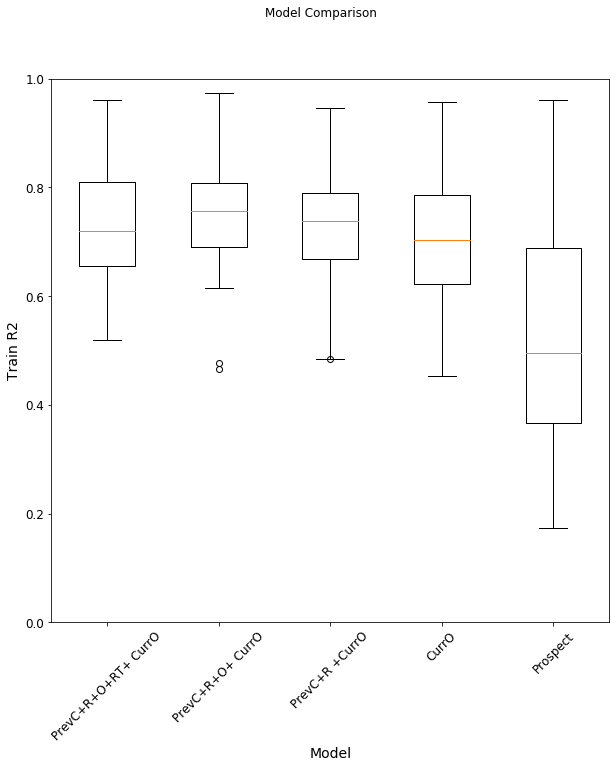

In [20]:

train_R2_all_models_df = {'PrevCRORT':curr_prev_RCO_RT_all_subj_metrics_df.pseudoR2.to_list(),'PrevCRO':curr_prev_RCO_all_subj_metrics_df.pseudoR2.to_list(),'PrevCR':curr_prevRC_all_subj_metrics_df.pseudoR2.to_list(),'Curr':curr_all_subj_metrics_df.pseudoR2.to_list(),"PT":PT_metrics.PT_pseudoR2.to_list()}
train_R2_all_models_df = pd.DataFrame(train_R2_all_models_df)
plt.figure(figsize=(10,10))
plt.boxplot(np.array([train_R2_all_models_df.PrevCRORT,train_R2_all_models_df.PrevCRO,train_R2_all_models_df.PrevCR,train_R2_all_models_df.Curr,train_R2_all_models_df.PT]).T,labels=["PrevC+R+O+RT+ CurrO","PrevC+R+O+ CurrO","PrevC+R +CurrO","CurrO","Prospect"]);
plt.xlabel("Model");
plt.ylabel('Train R2');
plt.suptitle("Model Comparison");
plt.xticks(rotation=45)
plt.ylim([0,1])

# plt.savefig(LSTM_file_path+"/ModelComparison_train.pdf")
plt.savefig(LSTM_file_path+"/ModelComparisonUpdated_train.pdf")

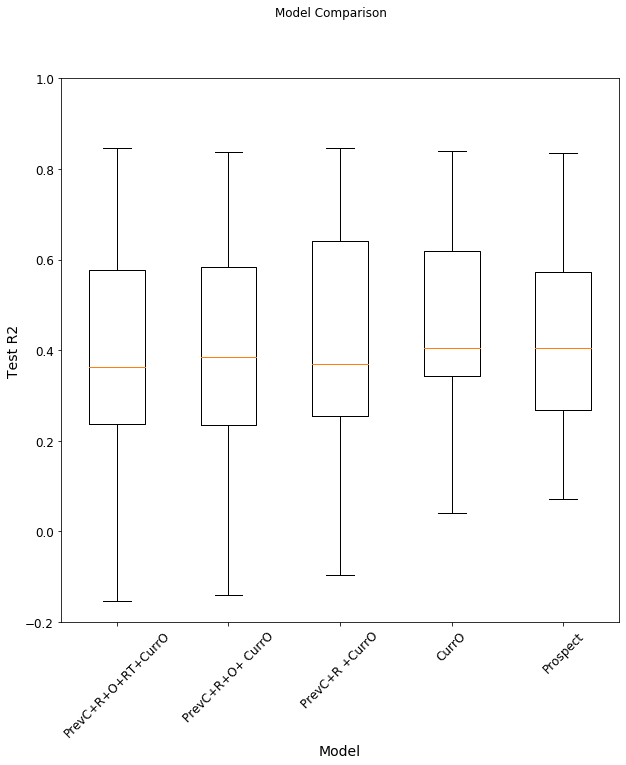

In [24]:

test_R2_all_models_df = {'PrevCRORT':curr_prev_RCO_RT_all_subj_metrics_df.pseudoR2_test.to_list(),'PrevCRO':curr_prev_RCO_all_subj_metrics_df.pseudoR2_test.to_list(),'PrevCR':curr_prevRC_all_subj_metrics_df.pseudoR2_test.to_list(),'Curr':curr_all_subj_metrics_df.pseudoR2_test.to_list(),"PT":PT_metrics.PT_pseudoR2_test.to_list()}
test_R2_all_models_df = pd.DataFrame(test_R2_all_models_df)
ax = plt.figure(figsize=(10,10))
plt.boxplot(np.array([test_R2_all_models_df.PrevCRORT,test_R2_all_models_df.PrevCRO,test_R2_all_models_df.PrevCR,test_R2_all_models_df.Curr,test_R2_all_models_df.PT]).T,labels=["PrevC+R+O+RT+CurrO","PrevC+R+O+ CurrO","PrevC+R +CurrO","CurrO","Prospect"]);
plt.xlabel("Model");
plt.ylabel('Test R2');
plt.suptitle("Model Comparison");
plt.xticks(rotation=45)
plt.ylim([-0.2,1])
# plt.savefig(LSTM_file_path+"/ModelComparison_test.pdf")
plt.savefig(LSTM_file_path+"/ModelComparisonUpdated_test.pdf")

In [396]:
test_R2_all_models_df.describe()

PrevCRORT    PrevCRO     PrevCR       Curr         PT
count  30.000000  30.000000  30.000000  30.000000  30.000000
mean    0.375499   0.393369   0.424749   0.457311   0.419603
std     0.246826   0.245998   0.245457   0.212926   0.198288
min    -0.153964  -0.141268  -0.064340   0.041328   0.070673
25%     0.238197   0.234142   0.248706   0.342506   0.268522
50%     0.361930   0.385041   0.399464   0.405981   0.404377
75%     0.577891   0.583747   0.643434   0.620191   0.573485
max     0.845668   0.837181   0.838157   0.840908   0.834326

## Exploring the gap between RNN_best and PT

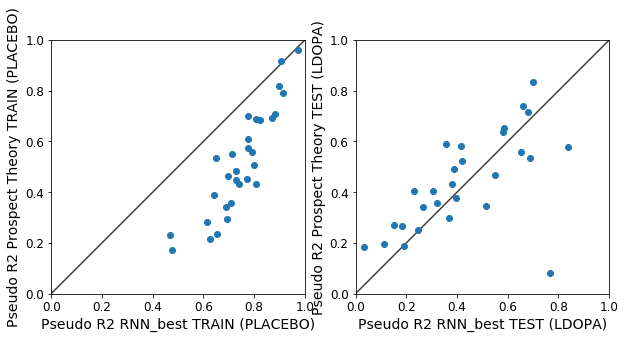

In [533]:
fig,ax= plt.subplots(nrows=1, ncols=2,figsize=(10,10))
# ax.scatter(all_subj_metrics_df.pseudoR2_test,PT_metrics.loc[PT_metrics.Subject_number<27].PT_pseudoR2_test)
ax[0].scatter(train_R2_all_models_df.PrevCRO,train_R2_all_models_df.PT)
ax[1].scatter(test_R2_all_models_df.PrevCRO,test_R2_all_models_df.PT)

lims = [0,1]

for k in range(2):
    
    ax[k].plot(lims,lims,color='black',alpha=0.75, zorder=0)
    ax[k].set_aspect('equal')
    
    ax[k].set_xlim([0,1])
    ax[k].set_ylim([0,1]);

ax[0].set_xlabel('Pseudo R2 RNN_best TRAIN (PLACEBO)',Fontsize=14); ax[0].set_ylabel('Pseudo R2 Prospect Theory TRAIN (PLACEBO)',Fontsize=14);
ax[1].set_xlabel('Pseudo R2 RNN_best TEST (LDOPA)',Fontsize=14); ax[1].set_ylabel('Pseudo R2 Prospect Theory TEST (LDOPA)',Fontsize=14);

plt.savefig(LSTM_file_path+"/RNNbest_vs_PT.pdf")

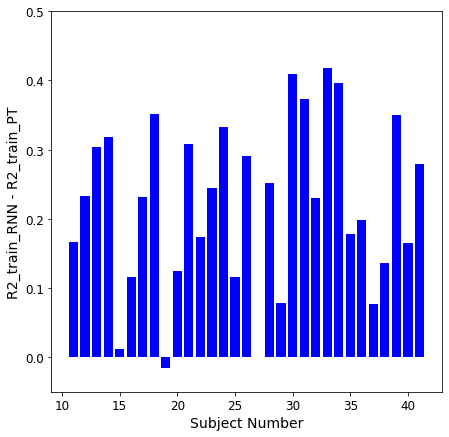

In [647]:
plt.figure(figsize=(7,7))
plt.bar(PT_metrics.Subject_number,train_R2_all_models_df.PrevCRO - train_R2_all_models_df.PT,color= "blue")
plt.ylim([-0.05,0.5])
plt.xlabel('Subject Number')
plt.ylabel('R2_train_RNN - R2_train_PT');
plt.savefig(LSTM_file_path+"/RNNbest_vs_PT_subj_by_subj.pdf")

In [18]:
# train_R2_all_models_df1 = train_R2_all_models_df
# train_R2_all_models_df1.Subject_number  = [

In [25]:
def subj_nums():


    a = np.array([x for x in range(11,42) ])
#     print(a)
    a = a[a!=27]
# print(a)
    return a

In [26]:
# train_R2_all_models_df.PrevCRO - train_R2_all_models_df.PT > np.median(train_R2_all_models_df.PrevCRO - train_R2_all_models_df.PT)

In [27]:
train_R2_all_models_df.loc[:,"Subject_number"] = subj_nums()

test_R2_all_models_df.loc[:,"Subject_number"] = subj_nums()
train_R2_all_models_df

PrevCRORT   PrevCRO    PrevCR      Curr        PT  Subject_number
0    0.789779  0.775878  0.756683  0.747275  0.609702              11
1    0.531999  0.466668  0.510749  0.476120  0.233091              12
2    0.518817  0.477242  0.485199  0.453434  0.173158              13
3    0.677642  0.772414  0.737968  0.715562  0.453906              14
4    0.959937  0.973198  0.946921  0.957639  0.961423              15
5    0.774240  0.806228  0.776865  0.765193  0.689960              16
6    0.702154  0.696001  0.688499  0.657451  0.465029              17
7    0.624574  0.710688  0.620790  0.594052  0.358870              18
8    0.894805  0.904203  0.894547  0.893578  0.919209              19
9    0.914286  0.914433  0.900443  0.866482  0.790354              20
10   0.715772  0.741764  0.668662  0.657947  0.433732              21
11   0.906169  0.883341  0.885787  0.864572  0.710201              22
12   0.722214  0.727952  0.720352  0.584086  0.483009              23
13   0.625677  0.614411  0.580474  0.522509  0.282225              24
14   0.638459  0.650093  0.681205  0.639046  0.534583              25
15   0.751827  0.799215  0.737361  0.689719  0.507991              26
16   0.648372  0.640542  0.653594  0.655981  0.388386              28
17   0.883851  0.898912  0.886037  0.850624  0.820486              29
18   0.536703  0.624763  0.587751  0.578928  0.215654              30
19   0.795544  0.807842  0.787280  0.787223  0.434183              31
20   0.790378  0.790963  0.782411  0.819390  0.560256              32
21   0.616280  0.653258  0.483594  0.582521  0.235655              33
22   0.700468  0.692566  0.676710  0.663865  0.295540              34
23   0.869369  0.870854  0.869262  0.847120  0.692572              35
24   0.712769  0.774147  0.773942  0.725509  0.576188              36
25   0.844147  0.777457  0.790894  0.766771  0.701026              37
26   0.813846  0.821304  0.847738  0.783170  0.684550              38
27   0.699790  0.690715  0.667685  0.615932  0.340757              39
28   0.730972  0.713287  0.762566  0.761394  0.548802              40
29   0.715813  0.728687  0.697038  0.691852  0.449191              41

In [28]:
LSTM_file_path

'/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/'

In [29]:
train_R2_all_models_df.to_csv(LSTM_file_path+"RNNvsPT_R2_train.csv")
test_R2_all_models_df.to_csv(LSTM_file_path+"RNNvsPT_R2_test.csv")

In [899]:
def plot_pgamble():
    plt.figure(figsize=(20,10))
    # plt.plot(np.array([prob_train_df.action_0,prob_val_df.action_0]).T,label="RNN_prev_RCO_CurrO_train")

    plt.plot(np.arange(1,201),prob_train_df.action_0,label="RNN_prev_RCO_CurrO_train",color='red') ## RNNs with previous trial's stats, start from 1
    plt.plot(np.arange(201,300),prob_val_df.action_0,label="RNN_prev_RCO_CurrO_train_val",color='orange')

    plt.plot(probchoice_df.probchoice_train,label="PT",color = 'blue')
    plt.ylabel("P[gamble]")
    plt.xlim([0,300]);

    plt.plot(task_df.Choice[1:],'.',color="black")
    plt.title('Subject number: '+str(subj_num))
    plt.legend(loc=5);
    
    
    
def plot_log_odd():
    plt.figure(figsize=(20,10))
    # plt.plot(np.array([prob_train_df.action_0,prob_val_df.action_0]).T,label="RNN_prev_RCO_CurrO_train")

    plt.plot(np.arange(1,201),np.log(prob_train_df.action_0) - np.log(probchoice_df.probchoice_train[1:200]) ,label="log[P(G|RNN)/P[G|PT]]",color='red') ## RNNs with previous trial's stats, start from 1
#     plt.plot(np.arange(201,300),np.log(prob_val_df.action_0) - np.log(probchoice_df.probchoice_train[200:299]),color='orange') 
             
#              label="RNN_prev_RCO_CurrO_train_val",color='orange')

#     plt.plot(probchoice_df.probchoice_train,label="PT",color = 'blue')
#     plt.ylabel("P[gamble]")
    plt.xlim([0,300]);

#     plt.plot(task_df.Choice[1:],'.',color="black")
#     plt.title('Subject number: '+str(subj_num))
    plt.legend(loc=1);
    

In [900]:
# def 
#     prob_all_train_action0 = pd.DataFrame(prob_train_df.action_0.append(prob_val_df.action_0))
# #     plt.plot(np.arange(0,299),prob_all_train_action0)
# #     prob_all_train_action0.head(10)
#     prob_all_train_action0.to_csv(file_path+"prob_all_train_action0_"+str(subj_num) +"neurons="+str(neurons)+".csv")


In [909]:
x = train_R2_all_models_df.loc[train_R2_all_models_df.PrevCRO - train_R2_all_models_df.PT > np.median(train_R2_all_models_df.PrevCRO - train_R2_all_models_df.PT)].Subject_number

In [910]:
# x=[]

Subject14
Subject17
Subject23
Subject24
Subject28
Subject30
Subject31
Subject33
Subject34
Subject39
Subject41


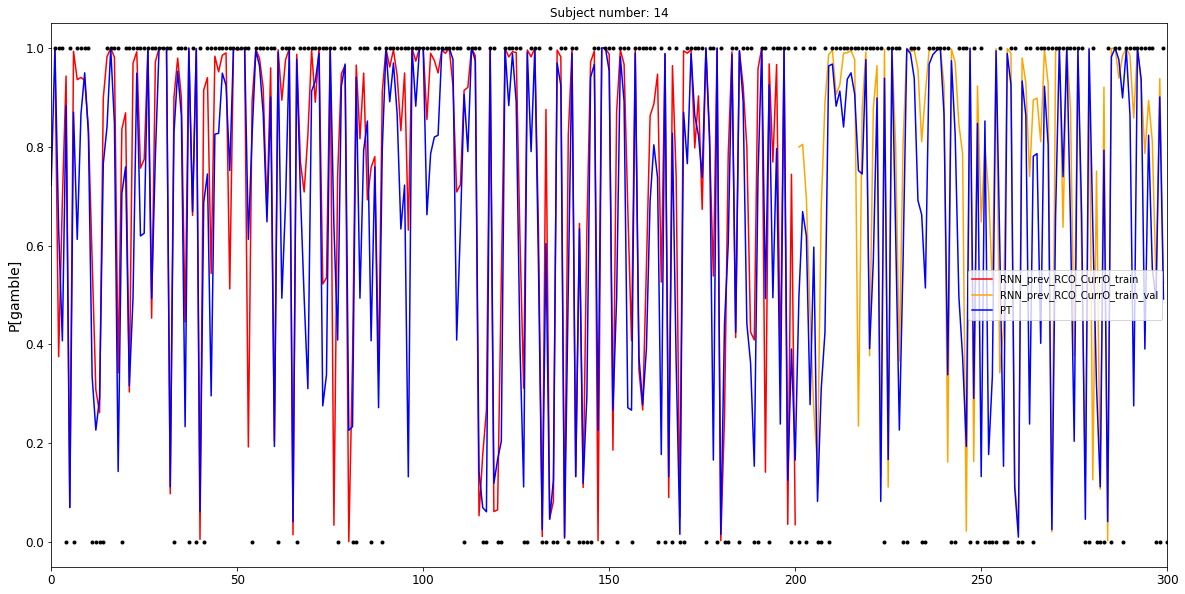

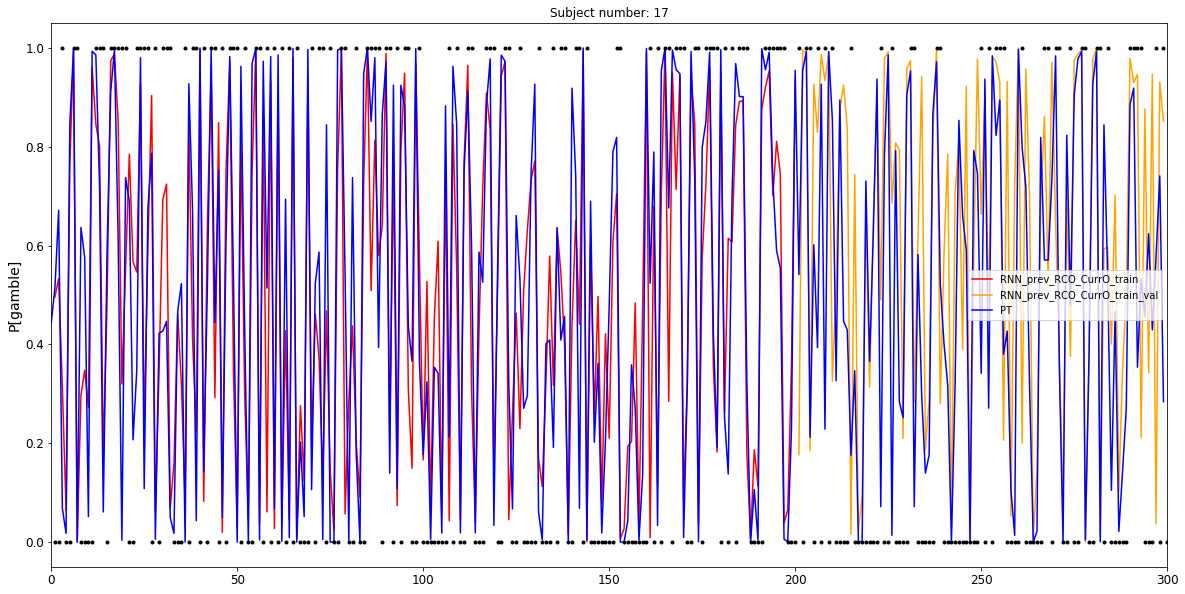

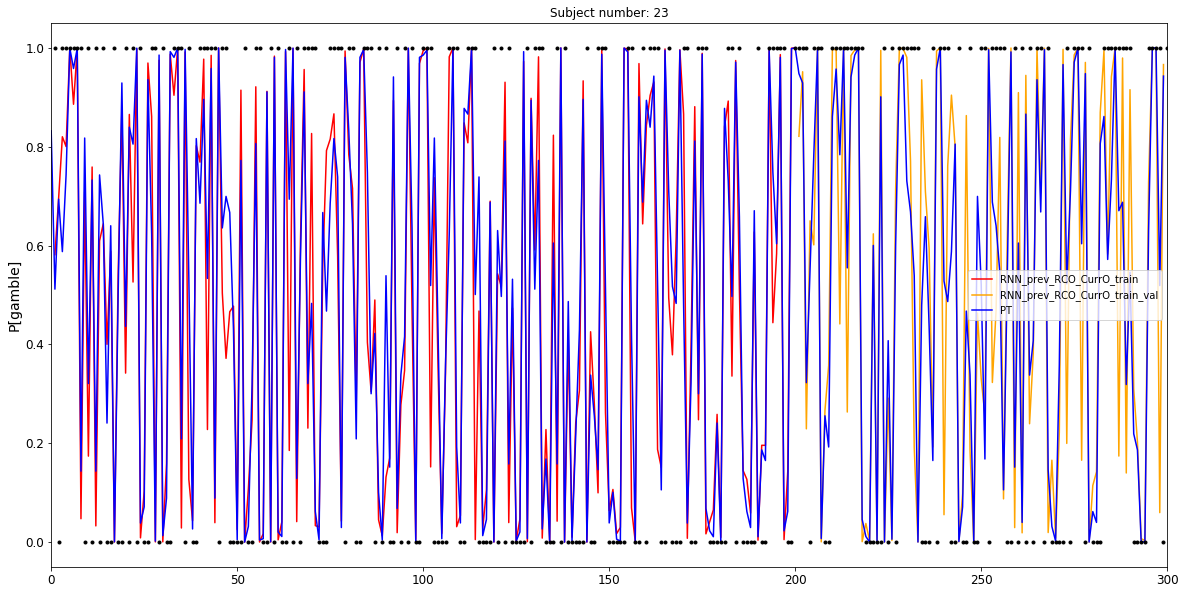

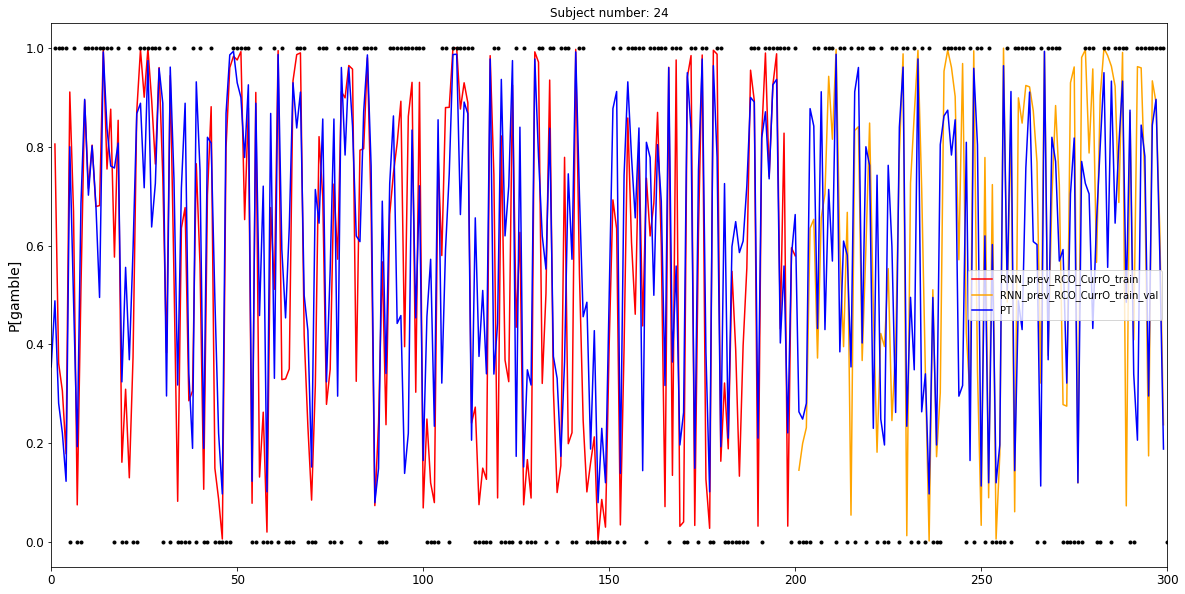

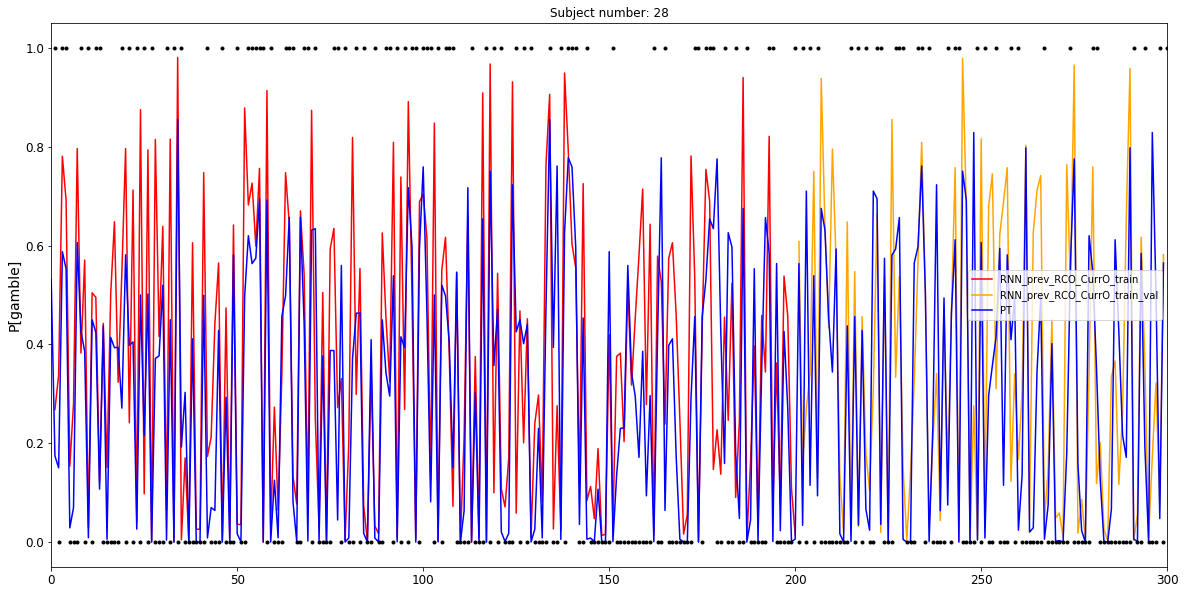

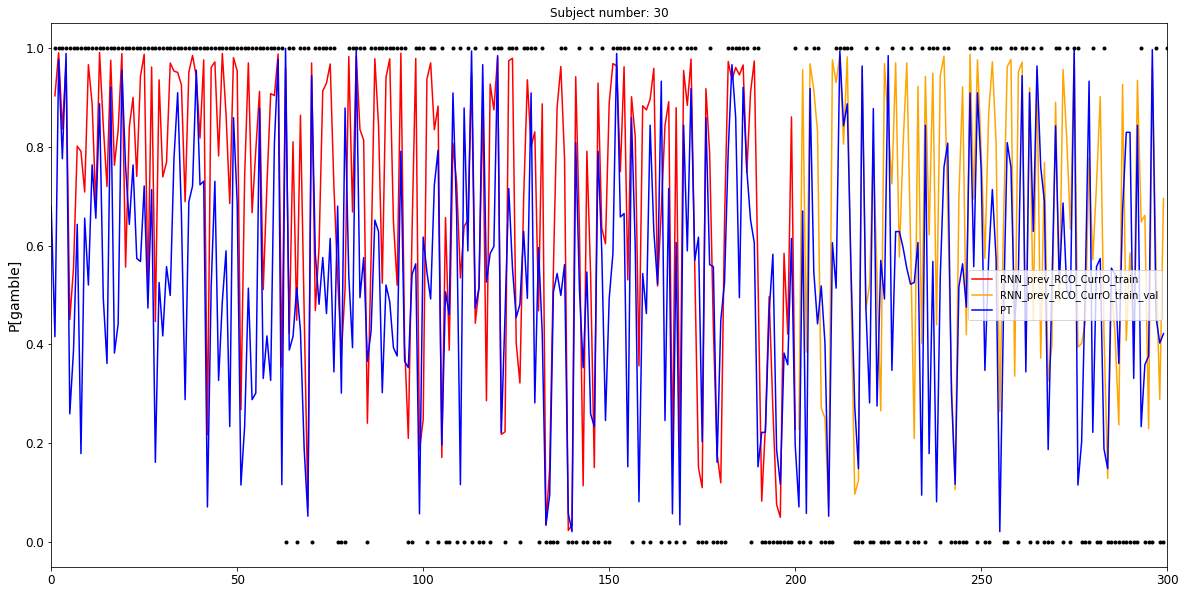

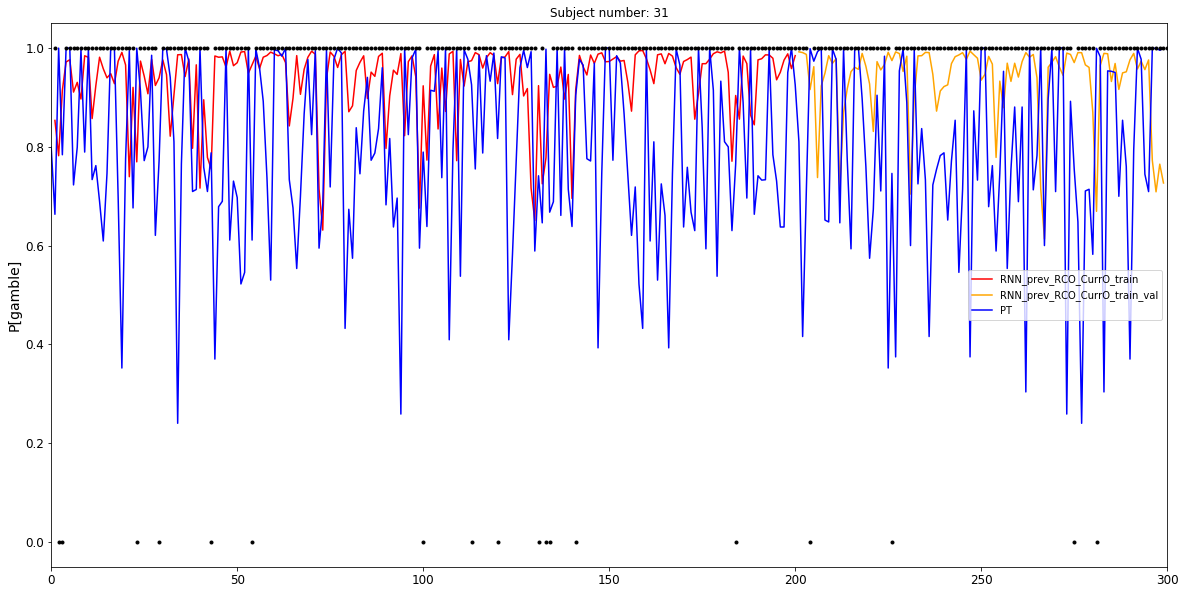

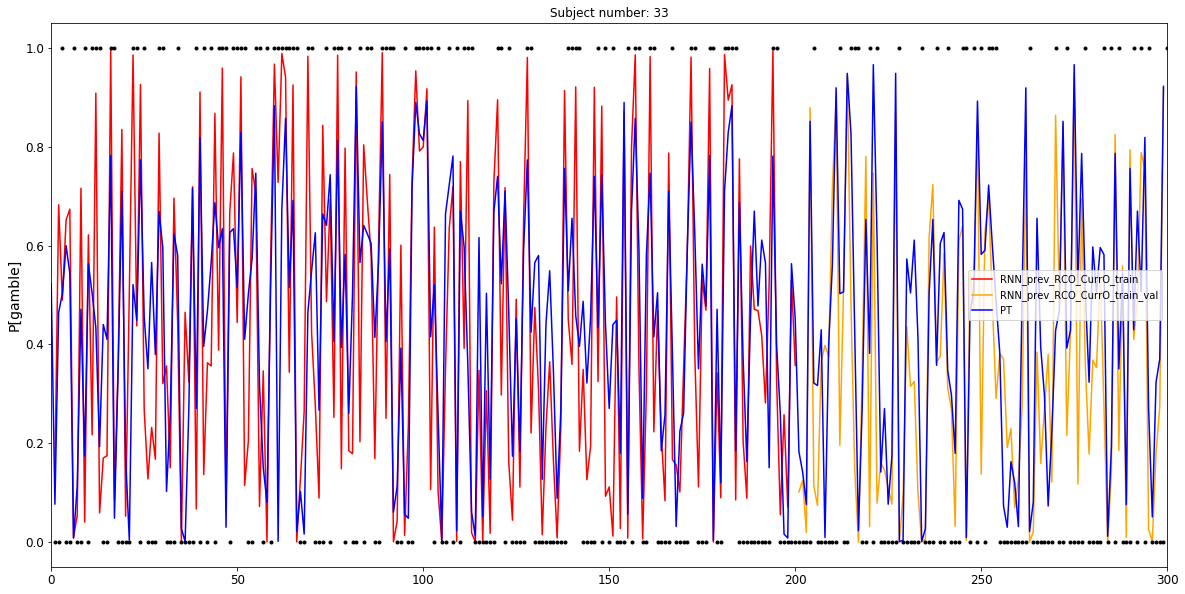

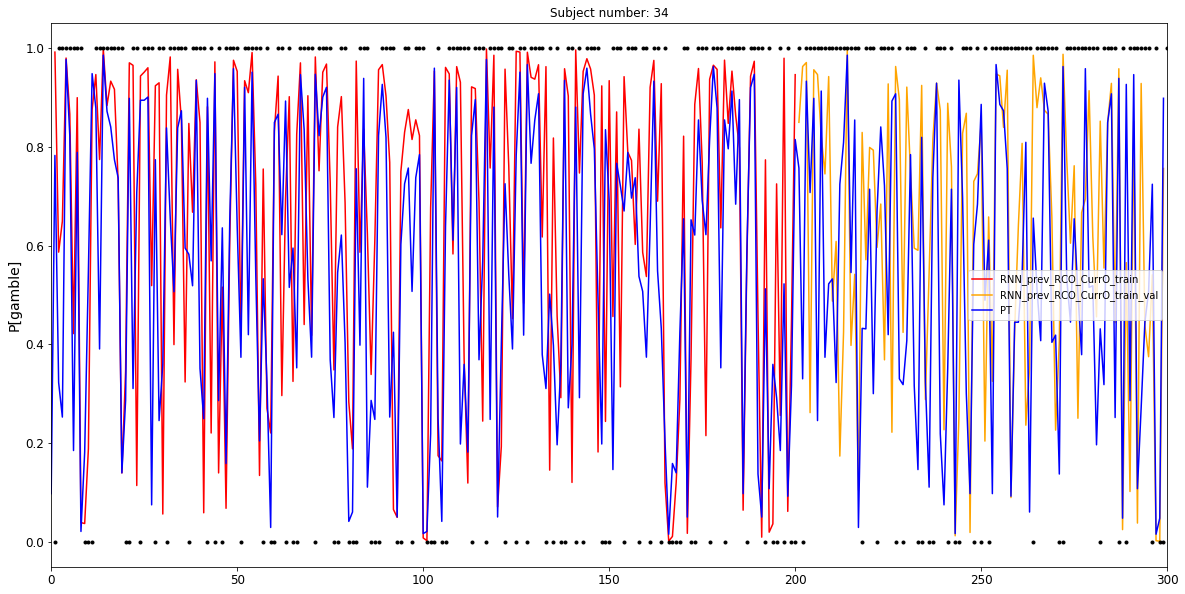

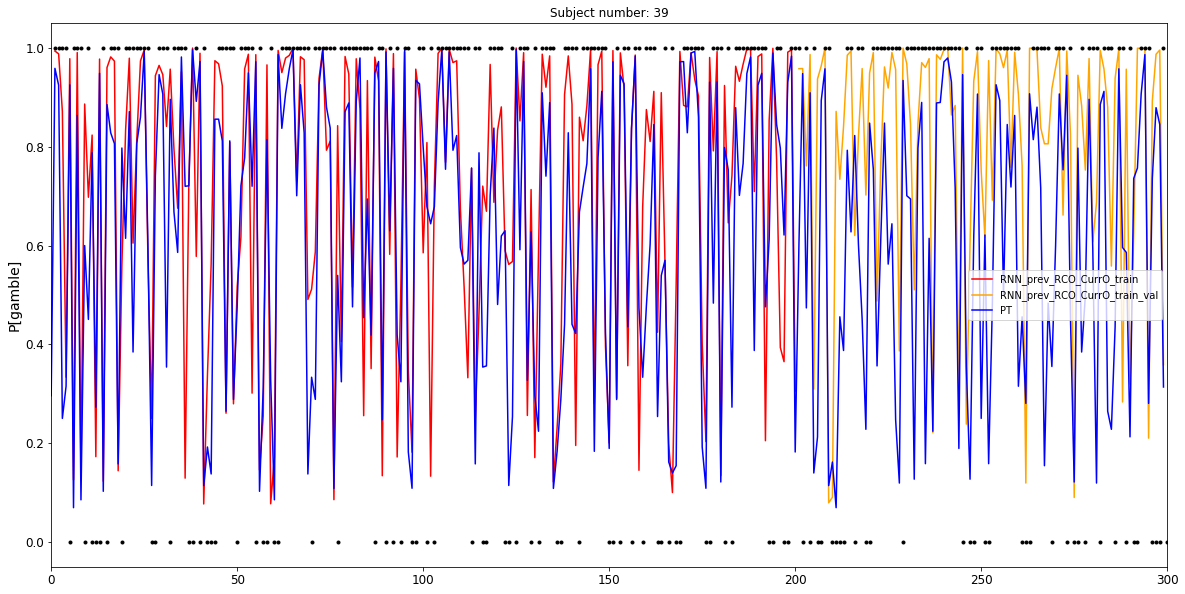

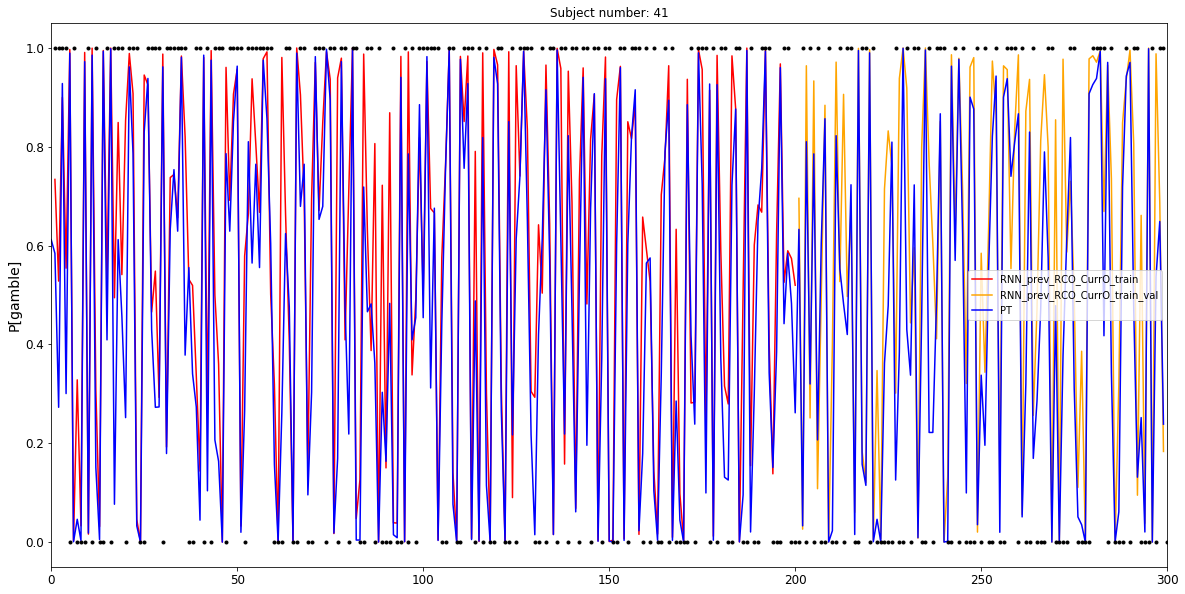

In [911]:
subj_inc=[];

neurons=8
# for subj_num in subj_nums():
for subj_num in PT_metrics.loc[PT_metrics.PT_loss>np.median(PT_metrics.PT_loss)].Subject_number  :#range(28,42):
    if subj_num not in x:
        print("Subject"+ str(subj_num))
        subj_inc.append(subj_num)
        
        file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_"+str(subj_num)+"/"
        file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_"+str(subj_num) + "/experiment_data.csv"
        file_dopa_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/dopadata/subject_num_"+str(subj_num) +"/dopa_experiment_data.csv"

        task_df = pd.read_csv(file_name)
        dopa_task_df = pd.read_csv(file_dopa_name)

        task_df = add_releveant_features (task_df)
        dopa_task_df = add_releveant_features(dopa_task_df)


        prob_train_df = pd.read_csv(file_path + "prob_train_currentprevopts_neurons="+str(neurons)+".csv")
        prob_test_df = pd.read_csv(file_path + "prob_test_currentprevopts_neurons="+str(neurons)+".csv")
        prob_val_df = pd.read_csv(file_path + "prob_val_currentprevopts_neurons="+str(neurons)+".csv")

        probchoice_df = pd.read_csv(file_path + "PT_probchoice.csv")

#         fetch_task_data(subj_num,neurons)


        prob_all_train_action0 = pd.DataFrame(prob_train_df.action_0.append(prob_val_df.action_0)).reset_index(drop=True)
        prob_all_train_action0.to_csv(file_path+"prob_all_train_action0_"+str(subj_num) +"neurons="+str(neurons)+".csv")

        

        plot_pgamble()
#         os.mkdir(file_path+"figs/")
#         plt.savefig(file_path+"figs/Pgamble.pdf")
#     plot_log_odd()


In [894]:
train_R2_all_models_df.Subject_number

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41])

In [895]:
subj_inc

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41]

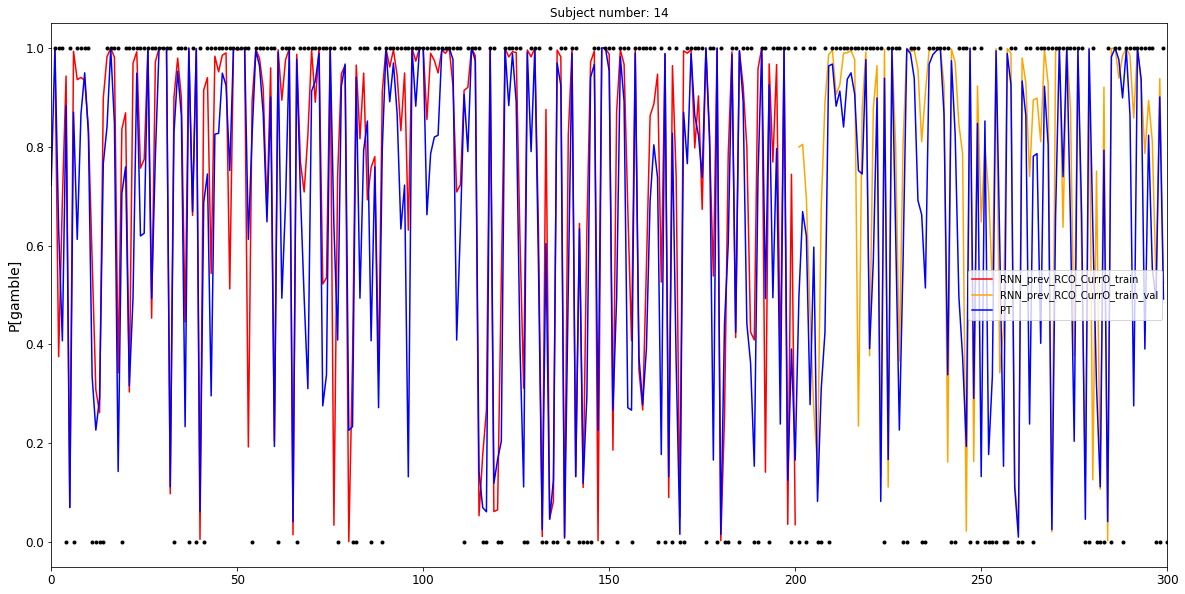

In [896]:
for subj_num in range(14,15):
        file_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_"+str(subj_num)+"/"
        file_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_"+str(subj_num) + "/experiment_data.csv"
        file_dopa_name = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/dopadata/subject_num_"+str(subj_num) +"/dopa_experiment_data.csv"

        task_df = pd.read_csv(file_name)
        dopa_task_df = pd.read_csv(file_dopa_name)

        task_df = add_releveant_features (task_df)
        dopa_task_df = add_releveant_features(dopa_task_df)


        prob_train_df = pd.read_csv(file_path + "prob_train_currentprevopts_neurons="+str(neurons)+".csv")
        prob_test_df = pd.read_csv(file_path + "prob_test_currentprevopts_neurons="+str(neurons)+".csv")
        prob_val_df = pd.read_csv(file_path + "prob_val_currentprevopts_neurons="+str(neurons)+".csv")

        probchoice_df = pd.read_csv(file_path + "PT_probchoice.csv")

        plot_pgamble()
# #        
        


In [897]:
file_path

'/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/by_RN/placdata/subject_num_14/'

In [767]:
prob_train_df.action_0.shape

(200,)

In [768]:
np.log(prob_val_df.action_0).shape

(99,)

In [769]:
np.log(probchoice_df.probchoice_train[200:299]).shape

(99,)

In [4]:
Summ_path = "/Users/ritwik7/Dropbox (Personal)/Postdoc_UCL/DATA/rlab_incomplete_rewardSWB_code/exportsFromRB"

In [5]:
summary_subjects_df = pd.read_csv(Summ_path+"/statSubjects.csv")

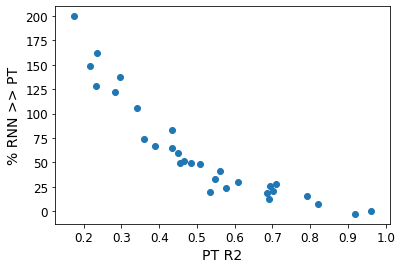

In [6]:
plt.scatter(summary_subjects_df.PT,100*summary_subjects_df.diffR2/summary_subjects_df.PT)
plt.xlabel("PT R2"); plt.ylabel('% RNN >> PT');

In [16]:
## subject by subject

In [7]:
subj_num=30
subj_data = pd.read_csv(Summ_path+"/subjData/subject_" + str(subj_num)+".csv")

In [8]:
subj_data.columns

Index(['TrialNum', 'SideOfScreen', 'Safe', 'BigRisky', 'SmallRisky',
       'SideChosen', 'Choice', 'Outcome', 'RT', 'Happiness', 'probPT',
       'choicePT', 'probRNN', 'choiceRNN', 'probDiff', 'RNNBest', 'PTBest',
       'zhappiness', 'happBF', 'zHappBF', 'happPrev', 'ZhappPrev',
       'happPrevBF', 'ZhappPrevBF', 'outcomeWeight_5', 'outcomeWeight_20',
       'outcomeWeight_50'],
      dtype='object')

Subject14
Subject24
Subject28
Subject30
Subject33


/Users/ritwik7/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
/Users/ritwik7/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/ritwik7/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory

Subject34


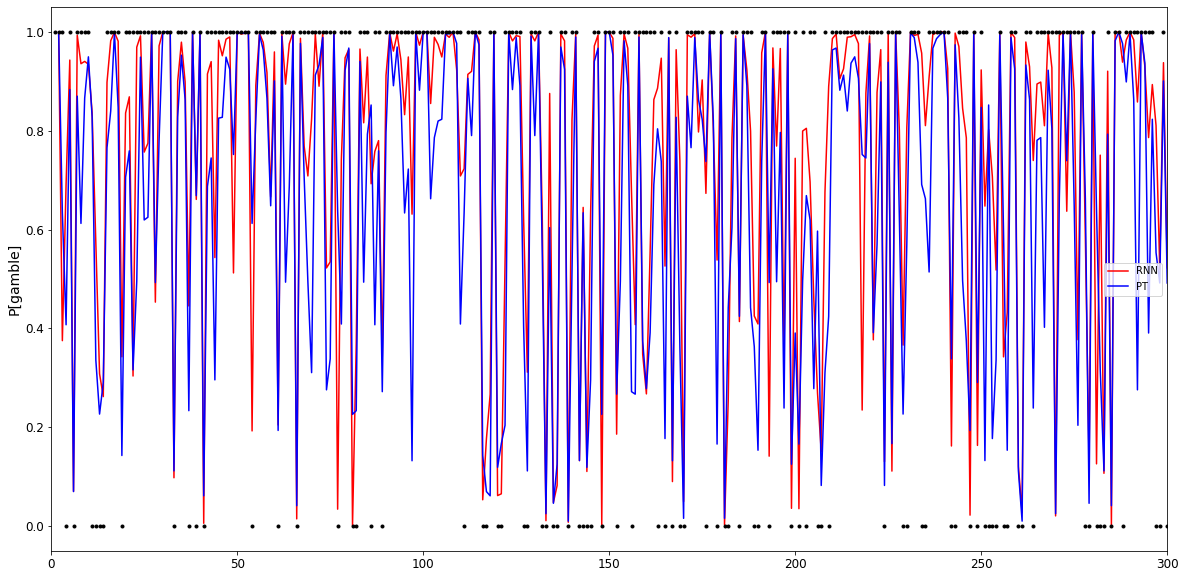

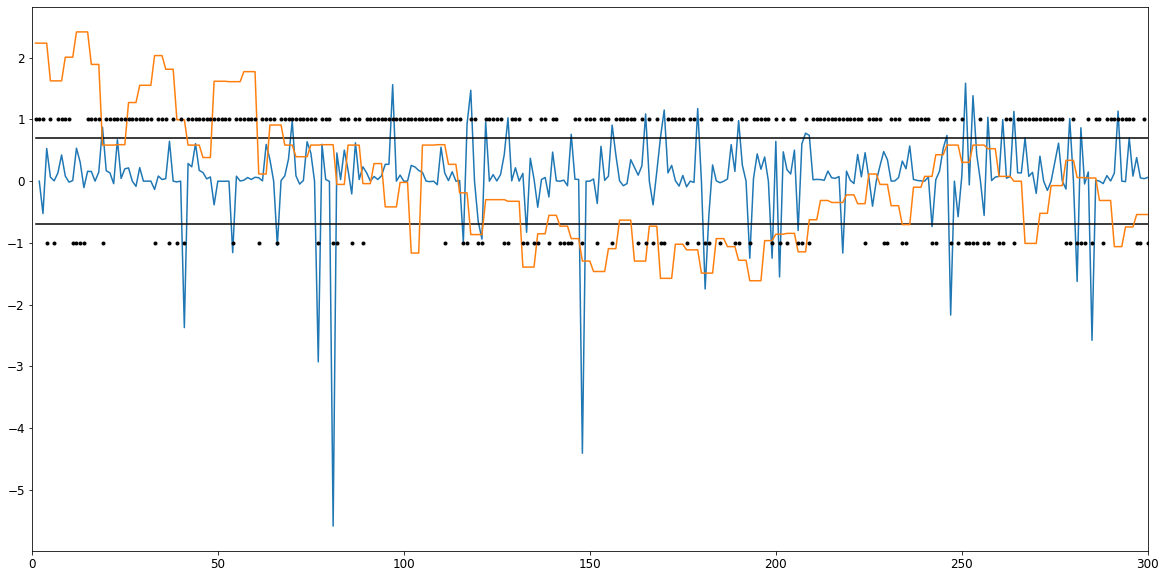

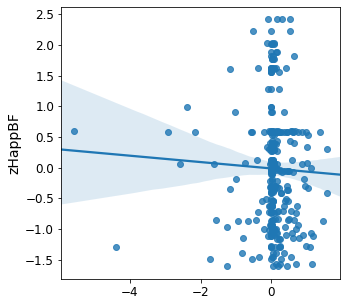

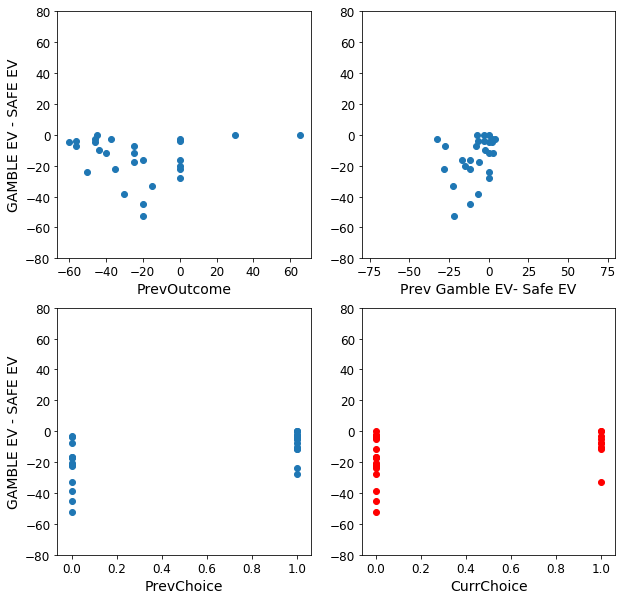

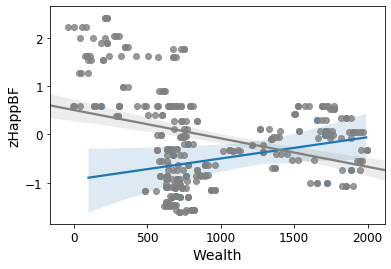

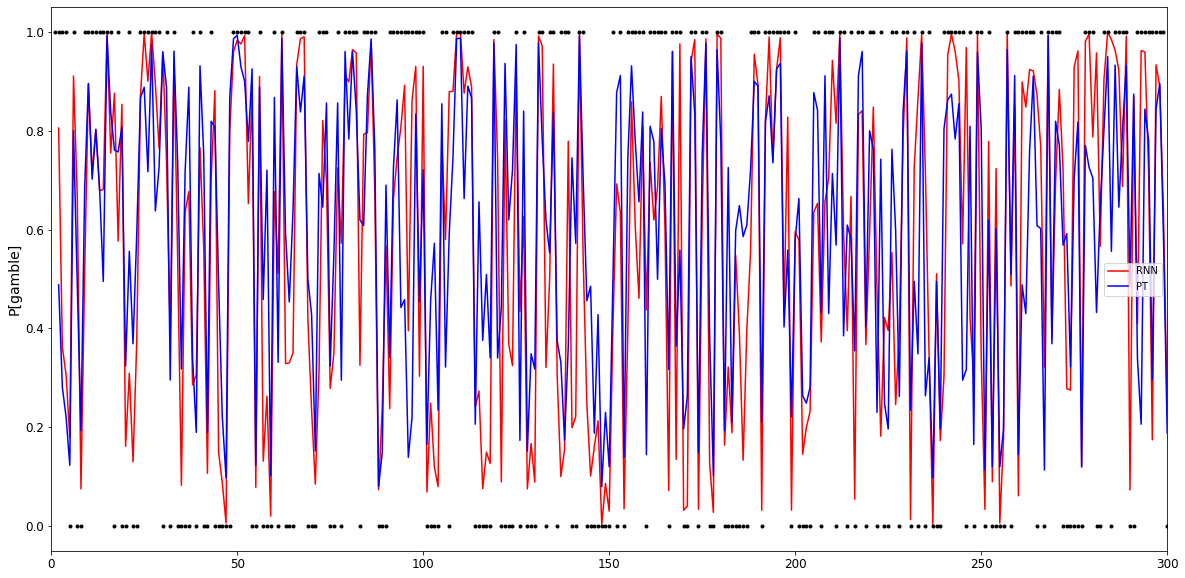

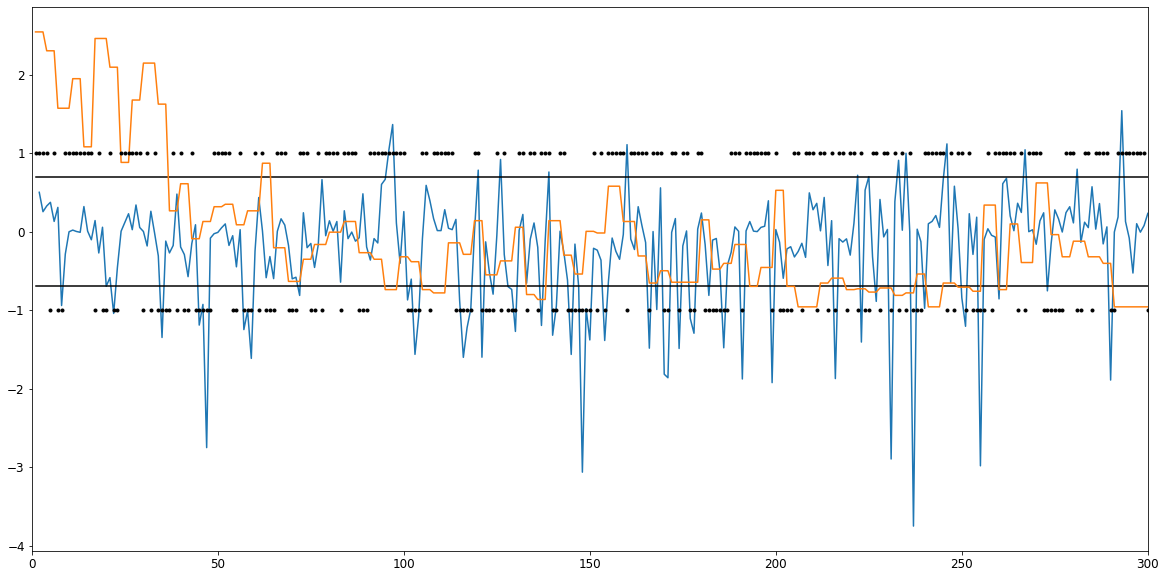

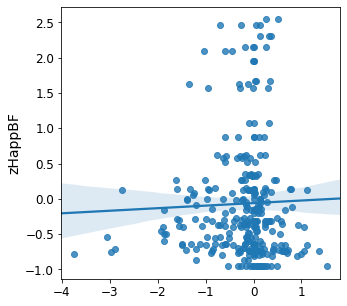

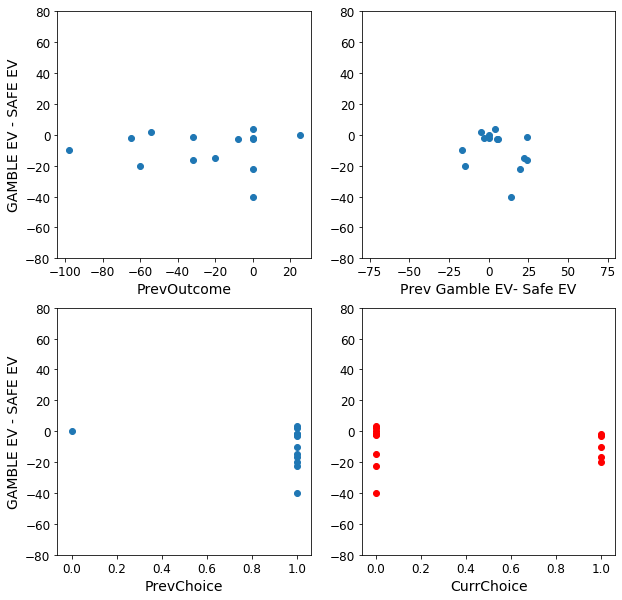

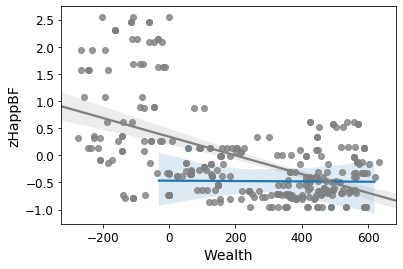

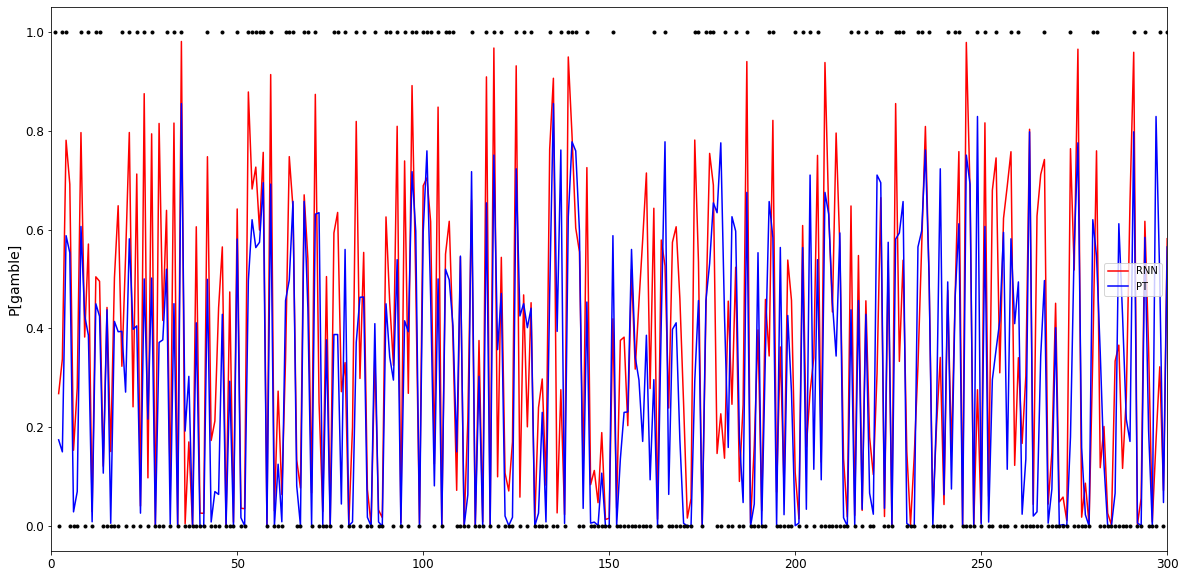

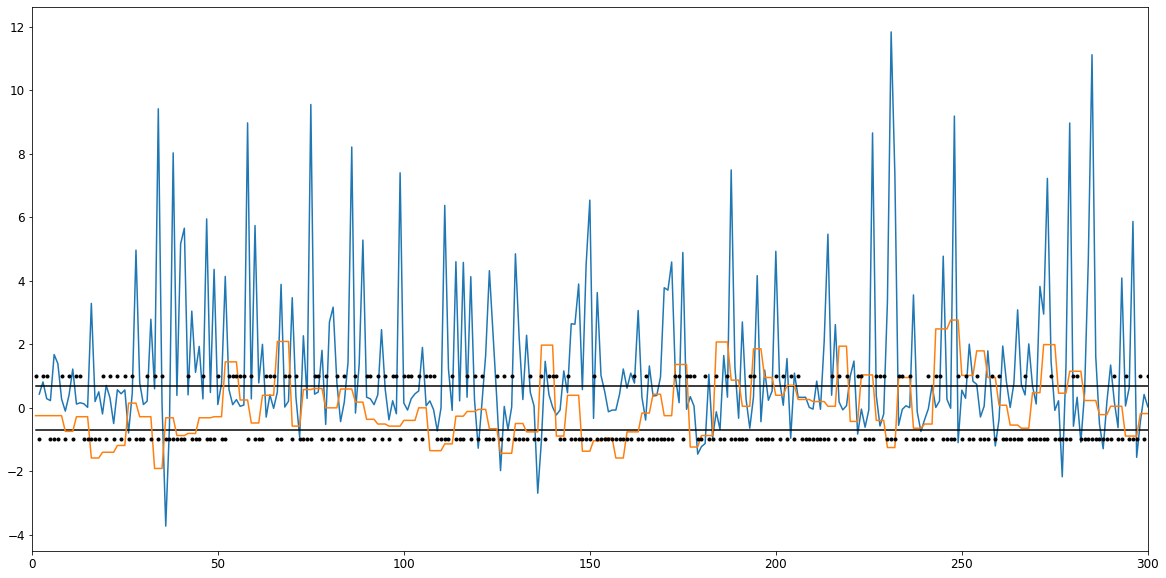

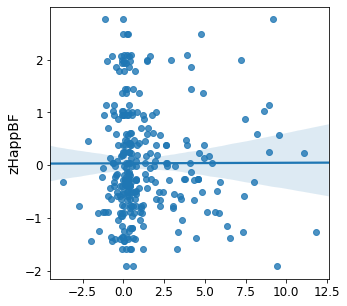

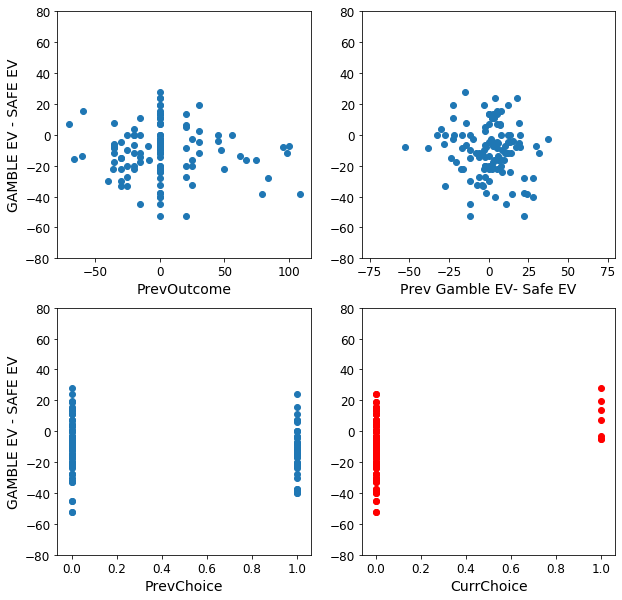

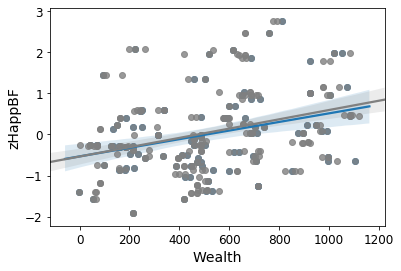

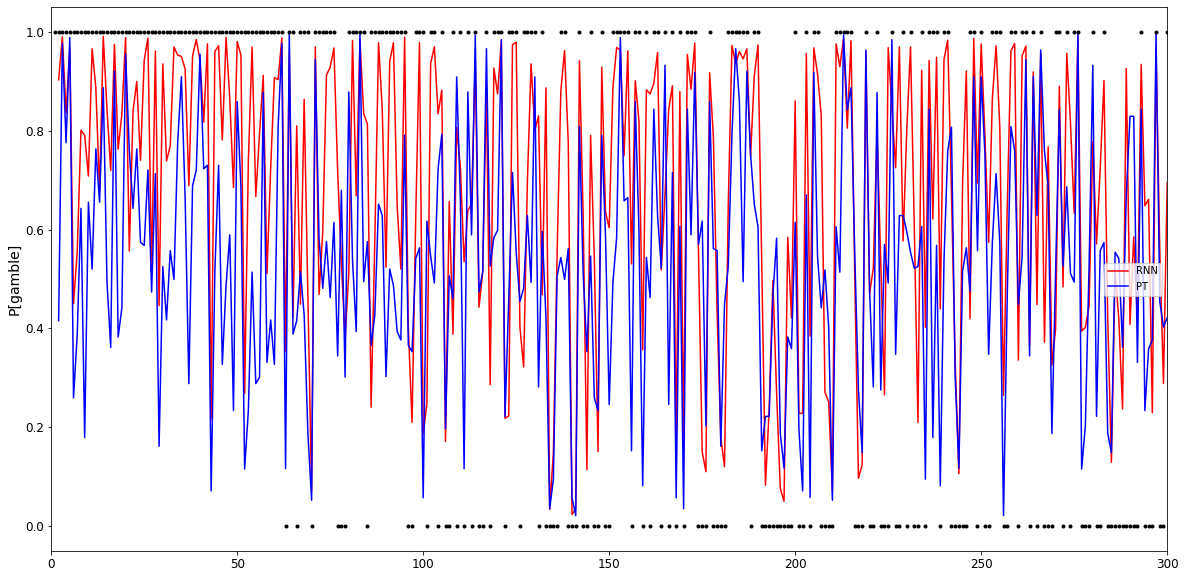

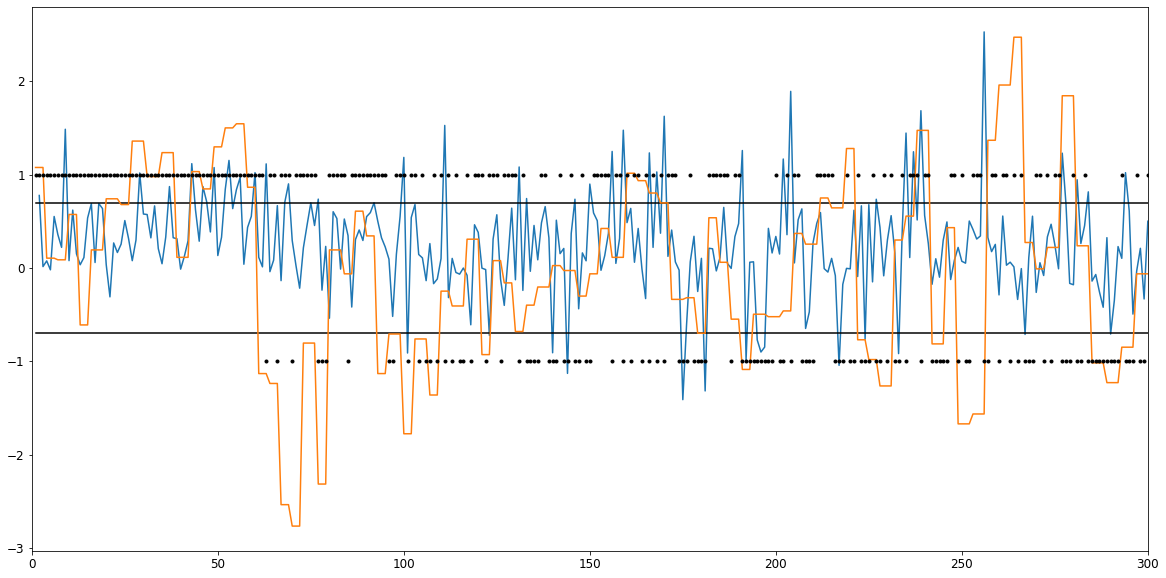

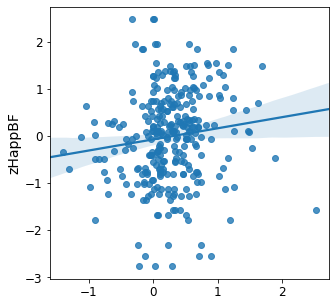

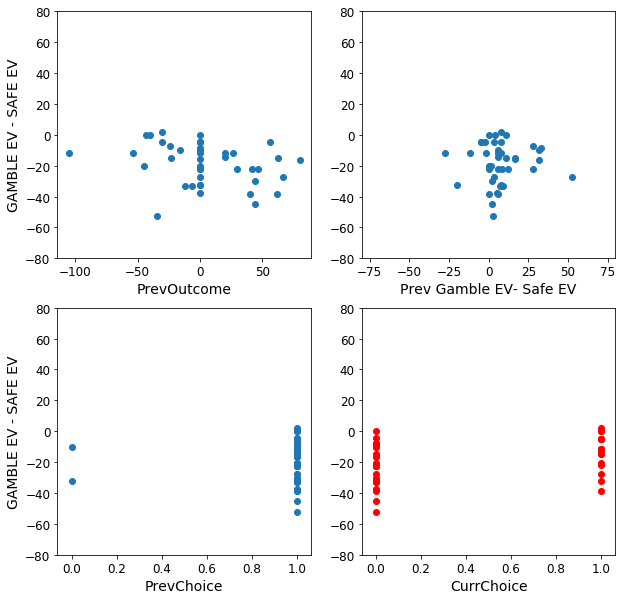

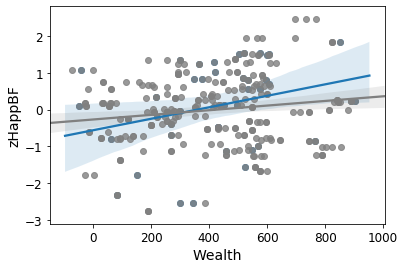

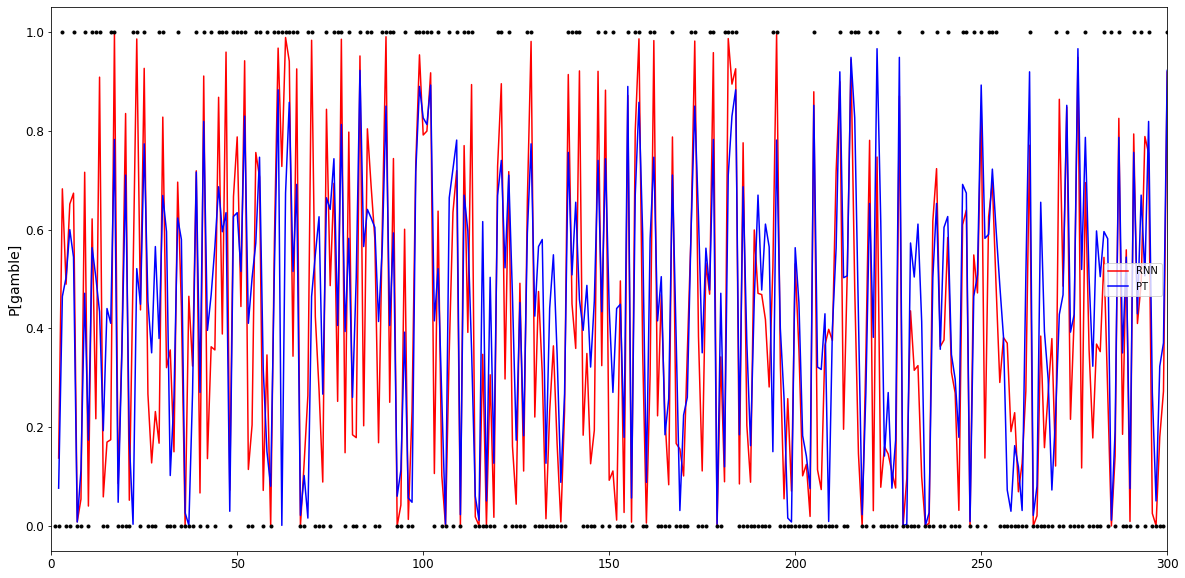

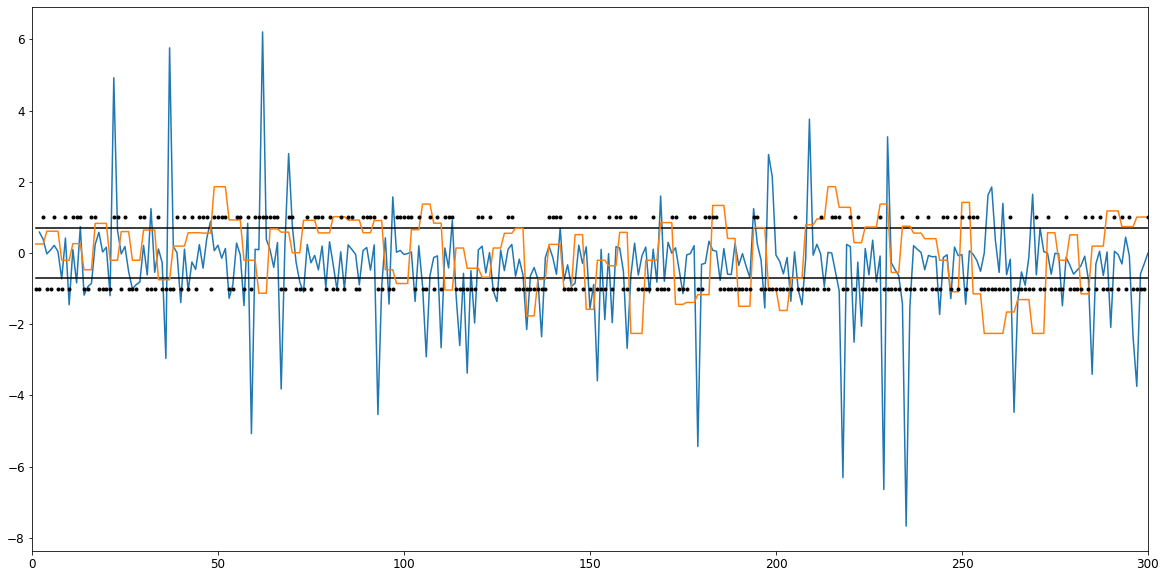

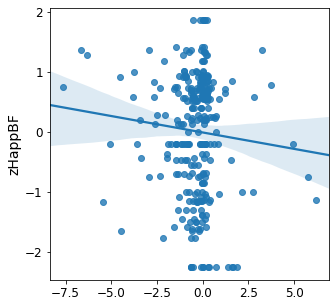

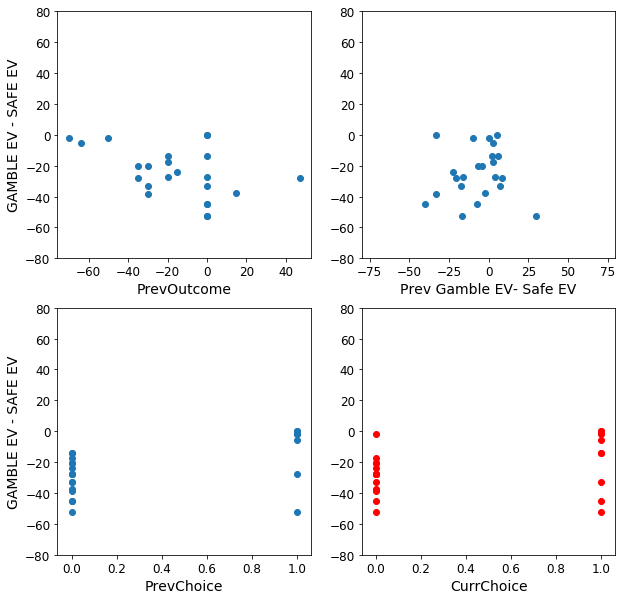

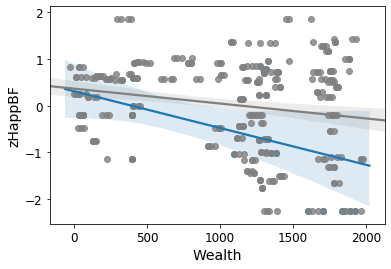

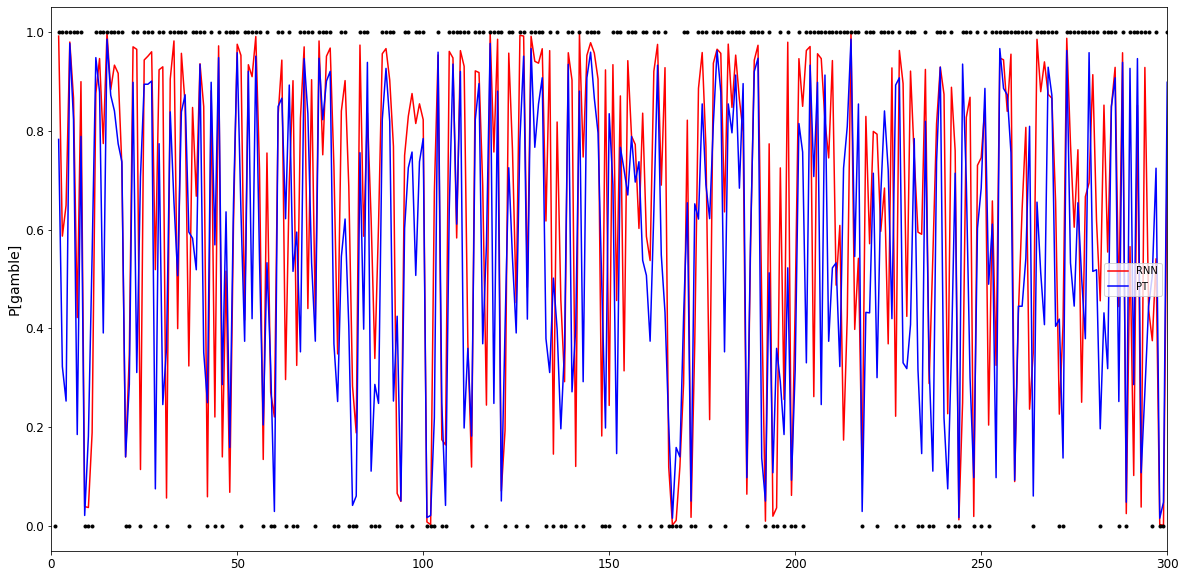

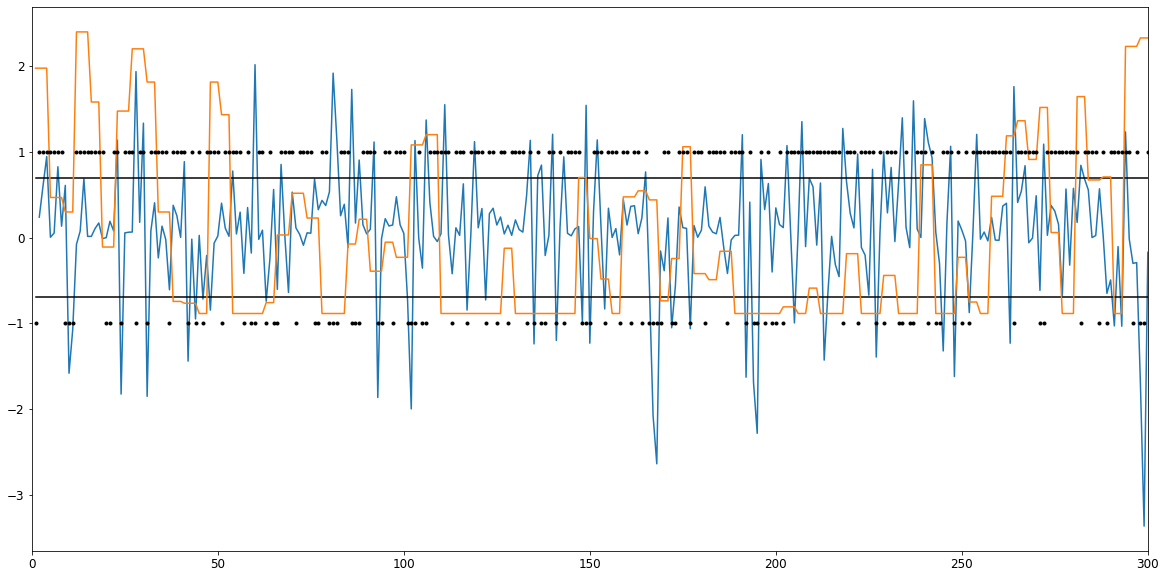

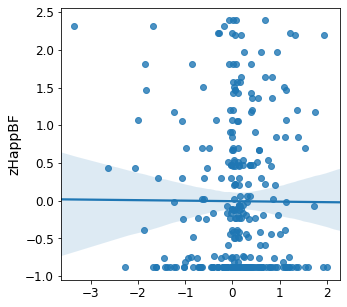

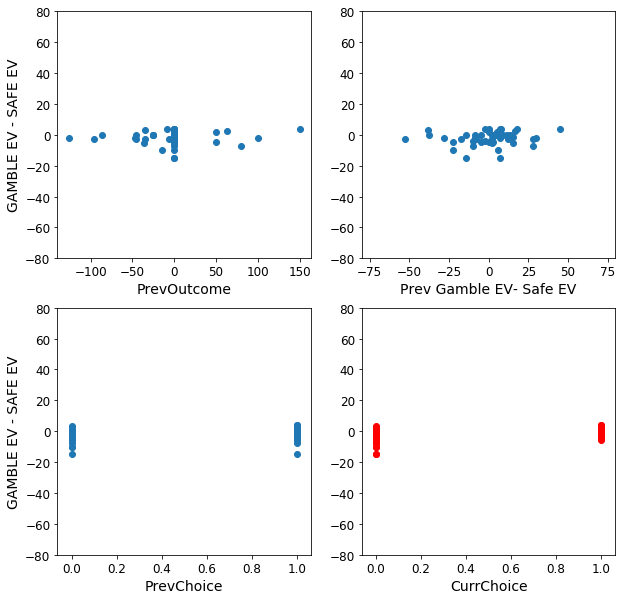

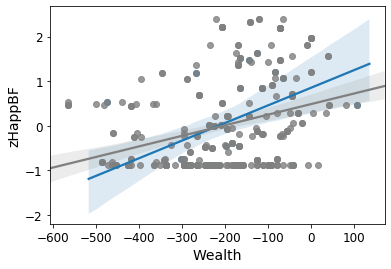

In [46]:
## subj_inc=[];
better_by = 2

for subj_num in [14,24,28,30,33,34]:
    
# for subj_num in subj_nums():
# for subj_num in PT_metrics.loc[PT_metrics.PT_loss>np.median(PT_metrics.PT_loss)].Subject_number  :#range(28,42):
#     if subj_num not in x:
    print("Subject"+ str(subj_num))
#         subj_inc.append(subj_num)  
    subj_data = pd.read_csv(Summ_path+"/subjData/subject_" + str(subj_num)+".csv")
    subj_data = add_releveant_features(subj_data)
    
    
    
    plt.figure(figsize=(20,10))

    plt.plot(subj_data[1:].probRNN,color="red",label="RNN")
    plt.plot(subj_data[1:].probPT,color="blue",label="PT")
    plt.plot(subj_data[1:].Choice,'.',color="black")
    plt.ylabel("P[gamble]")
    plt.xlim([0,300]);
    plt.legend(loc=5);
    
    plt.figure(figsize=(20,10))
#     plt.plot(subj_data[1:].probDiff,color="cyan",label="RNN-PT")
    plt.plot(np.log(subj_data[1:].probRNN) - np.log(subj_data[1:].probPT) )
    plt.plot([1, 300], [np.log(better_by), np.log(better_by)], 'k-')    
    plt.plot([1, 300], [-np.log(better_by), -np.log(better_by)], 'k-')   

    plt.plot(subj_data[1:].zHappBF)



    plt.xlim([0,300]);

    plt.plot(2*subj_data[1:].Choice -1,'.',color="black")
    
    plt.figure(figsize=(5,5))
    sns.regplot(np.log(subj_data[2:].probRNN) - np.log(subj_data[2:].probPT),subj_data[2:].zHappBF)
#     print(sc_stats.spearmanr(np.log(subj_data[2:].probRNN) - np.log(subj_data[2:].probPT),subj_data[2:].zHappBF))
    
    
    
    
    
    
    
#     plt.figure(figsize=(20,10))
    xx = subj_data.loc[np.log(subj_data.probRNN) - np.log(subj_data.probPT) > np.log(better_by)]
#     plt.hist(0.5*(xx.BigRisky + xx.SmallRisky) - xx.Safe);
    
    fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
    ax[0,0].scatter(xx.PrevOutcome,0.5*(xx.BigRisky + xx.SmallRisky) - xx.Safe);
    ax[0,0].set_xlabel('PrevOutcome'); ax[0,0].set_ylabel('GAMBLE EV - SAFE EV'); ax[0,0].set_ylim([-80,80])
    
    
    ax[0,1].scatter(0.5*(xx.PrevBigRisky + xx.PrevSmallRisky) - xx.PrevSafe, 0.5*(xx.BigRisky + xx.SmallRisky) - xx.Safe);
    ax[0,1].set_xlabel('Prev Gamble EV- Safe EV'); ax[0,1].set_ylim([-80,80]); #ax[1].set_ylabel('GAMBLE EV - SAFE EV'); 
    ax[0,1].set_xlim([-80,80])
    
    
    ax[1,0].scatter(xx.PrevChoice,0.5*(xx.BigRisky + xx.SmallRisky) - xx.Safe);
    ax[1,0].set_xlabel('PrevChoice');  ax[1,0].set_ylim([-80,80]); #ax[1].set_ylabel('GAMBLE EV - SAFE EV');
    ax[1,0].set_ylabel('GAMBLE EV - SAFE EV');

    
    ax[1,1].scatter(xx.Choice,0.5*(xx.BigRisky + xx.SmallRisky) - xx.Safe,color="red");
    ax[1,1].set_xlabel('CurrChoice');  ax[1,1].set_ylim([-80,80])


    plt.figure()
#     plt.hist(xx.zHappBF)
    sns.regplot(subj_data.PrevOutcome.cumsum()[xx.index],xx.zHappBF); 
    sns.regplot(subj_data.PrevOutcome.cumsum(),subj_data.zHappBF,color="grey"); 
    plt.xlabel("Wealth")


    

    
        
        


In [ ]:
# sns.jointplot(xx.PrevOutcome, 0.5*(xx.BigRisky + xx.SmallRisky) - xx.Safe, color="#4CB391")

In [73]:
# print(subj_data[1:].probRNN,subj_data[1:].probPT)

In [85]:
# np.log(2)

In [115]:
# subj_data.loc[subj_data.Choice==1].probRNN + 